In [24]:
# Libraries
import re
import datetime
import os
import joblib
# For data manipulation
import numpy as np
import pandas as pd
import xgboost as xgb
import statsmodels.api as sm
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

## Table of Contents
- [Section 1 - Exploratory Data Analysis using Major City and Largely Urban CoCs](#section-1)
  - [1.1 Loading the CSV File into a DataFrame](#section-1_1)
  - [1.2 Filtering for Major City and Largely Urban CoCs](#section-1_2)
  - [1.3 General overview of the filtered dataset](#section-1_3)
  - [1.4 Do I have any missing data?](#section-1_4)
  - [1.5 Taking a look at the categorical variables](#section-1_5)
  - [1.6 Taking a look at the numerical variables](#section-1_6)
  - [1.7 Looking for correlations](#section-1_7)
  - [1.8 Pairplot Analysis](#section-1_8)
- [Section 2 - Models to predict annual homelessness rates using total_homeless_per_10k](#section-2)
  - [2.1 Loading dataset and selecting the relevant demographic and socioeconomic features for the model](#section-2_1)
  - [2.2 Handling missing values](#section-2_2)
  - [2.3 Saving the task 2 dataframe to a file](#section-2_3)
  - [2.4 Randomly splitting the dataset and analysis](#section-2_4)
  - [2.5 Temporal splitting of the dataset and analysis](#section-2_5)
- [Section 3 - Models to predict annual homelessness rates using the percentage change in total_homeless_per_10k](#section-3)
  - [3.1 Loading the full dataset into a dataframe](#section-3_1)
  - [3.2 Filtering for Major City and Largely Urban CoCs task3 model](#section-3_2)
  - [3.3 Sorting by CoC and year](#section-3_3)
  - [3.4 Calculating the percentage change in total_homeless_per_10k](#section-3_4)
  - [3.5 Dropping missing values from the first year](#section-3_5)
  - [3.6 Heatmap to highlight only correlations with pct_change_total_homeless_per_10k](#section-3_6)
  - [3.7 Saving correlations with pct_change_total_homeless_per_10k to CSV](#section-3_7)
  - [3.8 Using the demographic and socioeconomic features for the task3 model](#section-3_8)
  - [3.9 Handling missing values for task3 model](#section-3_9)
  - [3.10 Saving the task3 dataframe to a file](#section-3_10)
  - [3.11 Regression tests](#section-3_11)
  - [3.12 Classification tests](#section-3_12)
- [Section 4 - Lagged Feature Engineering](#section-4)
  - [4.1 Loading the full dataset into a dataframe](#section-4_1)
  - [4.2 Filtering for Major City and Largely Urban CoCs task3 model](#section-4_2)
  - [4.3 Sorting by CoC and year](#section-4_3)
  - [4.4 Calculating the percentage change in total_homeless_per_10k](#section-4_4)
  - [4.5 Choosing the columns to lag](#section-4_5)
  - [4.6 Creating and inspecting the Lagged features](#section-4_6)
  - [4.7 Dropping NaN values introduced by lagging](#section-4_7)
  - [4.8 Saving the lagged dataframe to CSV file](#section-4_8)
  - [4.9 Classification tests for lagged dataset](#section-4_9)
- [Section 5 - Appendix](#section-5)

<a id="section-1"></a>
## Section 1 - Exploratory Data Analysis using Major City and Largely Urban CoCs

<a id="section-1_1"></a>
### 1.1 Loading the CSV File into a DataFrame

In [3]:
current_date = datetime.datetime.now().strftime("%m_%d_%Y")

# Loading the homeless dataset into a DataFrame
file_path = f"./data/homeless_dataset_full.csv"
df_homeless_csv = pd.read_csv(file_path, encoding="utf-8")

# Displaying 5 random rows
df_homeless_csv.sample(5, random_state=45)

CoC Number               County  Year  Overall Homeless  \
846     OK-501         tulsa county  2013              1008   
611     NJ-501        bergen county  2012               454   
924     PA-506         berks county  2010               513   
418     MD-503  anne arundel county  2011               382   
729     NV-500         clark county  2013              5952   

     Sheltered Total Homeless  Unsheltered Homeless  \
846                       886                   122   
611                       422                    32   
924                       500                    13   
418                       312                    70   
729                      2920                  3032   

     Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
846                            0                                0   
611                            0                                0   
924                            0                                0   
418                            0                                0   
729                            0                                0   

     Overall Homeless - Over 24  Overall Homeless - Female  \
846                           0                          0   
611                           0                          0   
924                           0                          0   
418                           0                          0   
729                           0                          0   

     Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
846                        0                                   0   
611                        0                                   0   
924                        0                                   0   
418                        0                                   0   
729                        0                                   0   

     Overall Homeless - White  \
846                         0   
611                         0   
924                         0   
418                         0   
729                         0   

     Overall Homeless - Black, African American, or African  \
846                                                  0        
611                                                  0        
924                                                  0        
418                                                  0        
729                                                  0        

     Overall Homeless - Asian or Asian American  \
846                                           0   
611                                           0   
924                                           0   
418                                           0   
729                                           0   

     Overall Homeless - American Indian, Alaska Native, or Indigenous  \
846                                                  0                  
611                                                  0                  
924                                                  0                  
418                                                  0                  
729                                                  0                  

     Overall Homeless - Native Hawaiian or Other Pacific Islander  \
846                                                  0              
611                                                  0              
924                                                  0              
418                                                  0              
729                                                  0              

     Overall Homeless - Multiple Races  \
846                                  0   
611                                  0   
924                                  0   
418                                  0   
729                                  0   

     Overall Homeless - Black or African American  Overall Homeless - Asian  \
846                       

<a id="section-1_2"></a>
### 1.2 Filtering for Major City and Largely Urban CoCs

In [4]:
# Filtering dataset for Major City and Largely Urban CoCs
df_filtered = df_homeless_csv[df_homeless_csv["CoC Category"].isin(["Major City CoC", "Other Largely Urban CoC"])]

# Displaying 5 random rows
#df_filtered.head()
df_filtered.sample(5, random_state=45)

CoC Number           County  Year  Overall Homeless  \
324      GA-504  richmond county  2016               287   
808      OH-503  franklin county  2011              1418   
1097     WA-500      king county  2011              8972   
38       CA-502   alameda county  2012              4257   
61       CA-504    sonoma county  2017              2835   

      Sheltered Total Homeless  Unsheltered Homeless  \
324                        266                    21   
808                       1274                   144   
1097                      6480                  2492   
38                        2045                  2212   
61                         988                  1847   

      Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
324                            56                               15   
808                             0                                0   
1097                            0                                0   
38                              0                                0   
61                            297                              431   

      Overall Homeless - Over 24  Overall Homeless - Female  \
324                          216                        118   
808                            0                          0   
1097                           0                          0   
38                             0                          0   
61                          2107                        855   

      Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
324                       169                                   5   
808                         0                                   0   
1097                        0                                   0   
38                          0                                   0   
61                       1968                                 697   

      Overall Homeless - White  \
324                         80   
808                          0   
1097                         0   
38                           0   
61                        1990   

      Overall Homeless - Black, African American, or African  \
324                                                   0        
808                                                   0        
1097                                                  0        
38                                                    0        
61                                                    0        

      Overall Homeless - Asian or Asian American  \
324                                            0   
808                                            0   
1097                                           0   
38                                             0   
61                                             0   

      Overall Homeless - American Indian, Alaska Native, or Indigenous  \
324                                                   0                  
808                                                   0                  
1097                                                  0                  
38                                                    0                  
61                                                    0                  

      Overall Homeless - Native Hawaiian or Other Pacific Islander  \
324                                                   0              
808                                                   0              
1097                                                  0              
38                                                    0              
61                                                   28              

      Overall Homeless - Multiple Races  \
324                                   9   
808                                   0   
1097                                  0   
38                                    0   
61                                  396   

      Overall Homeless - Black or African American  Overall Home

<a id="section-1_3"></a>
### 1.3 General overview of the filtered dataset

Dataset Overview

The dataset consists of 342 entries and 121 columns (predictor variables). Most columns contain numeric data, while 8 columns are of type "object" (categorical or text-based).

Key Summary Statistics:
1. The dataset now includes 38 unique CoCs (Continuums of Care).
2. There are 38 unique counties represented.
3. The most frequent CoC is AL-501, located in Mobile, Alabama (Mobile City & County/Baldwin County).
4. There are several columns with missing values, and need to determine if I should drop, fill, or impute? Also, it looks like there are no values for the predictor variables 'Estimate Total Some Other Race Alone' and 'Estimate Total Two or More Races.'

In [5]:
# Looking at structure and basic information
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 1158
Columns: 121 entries, CoC Number to unsheltered_homeless_per_10k
dtypes: float64(91), int64(22), object(8)
memory usage: 326.0+ KB


In [6]:
# Looking at column names
print("Column Names:\n", df_filtered.columns)
#print("\nNumber of Unique Values per Column:\n", df_homeless_csv.nunique())

Column Names:
 Index(['CoC Number', 'County', 'Year', 'Overall Homeless',
       'Sheltered Total Homeless', 'Unsheltered Homeless',
       'Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Over 24', 'Overall Homeless - Female',
       ...
       'Total',
       'Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over',
       'With a Disability Estimate Population Age 16 and Over', 'Aged',
       'Blind and disabled', 'SSI Participation Rate (Percent)',
       'SSDI Participation Rate (Percent)', 'total_homeless_per_10k',
       'total_sheltered_homeless_per_10k', 'unsheltered_homeless_per_10k'],
      dtype='object', length=121)


In [7]:
# Displaying unique value counts for all columns
display(df_filtered.nunique().to_frame().T)

CoC Number  County  Year  Overall Homeless  Sheltered Total Homeless  \
0          38      38     9               329                       329   

   Unsheltered Homeless  Overall Homeless - Under 18  \
0                   265                          170   

   Overall Homeless - Age 18 to 24  Overall Homeless - Over 24  \
0                              162                         186   

   Overall Homeless - Female  Overall Homeless - Male  \
0                        146                      150   

   Overall Homeless - Hispanic/Latino  Overall Homeless - White  \
0                                 129                       147   

   Overall Homeless - Black, African American, or African  \
0                                                  1        

   Overall Homeless - Asian or Asian American  \
0                                           1   

   Overall Homeless - American Indian, Alaska Native, or Indigenous  \
0                                                  1                  

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                 60              

   Overall Homeless - Multiple Races  \
0                                110   

   Overall Homeless - Black or African American  Overall Homeless - Asian  \
0                                           148                        63   

   Overall Homeless - American Indian or Alaska Native  CoC Number Original  \
0                                                 94                     38   

   CoC Name  CoC Category  State  Median_House_Values_1_year  \
0        38             2     17                         320   

   Percentage_of_Households_with_Cost_Burden_1_year  Median_Rent_1_year  \
0                                               342                 273   

   Median_Gross_Rent_1_year  Share_of_Renter_Occupied_Units_1_year  \
0                       274                                     32   

   Rental_Vacancy_Rates_1_year  Total_Housing_Units_1_year  \
0                          111                         342   

   Share_of_Overcrowded_Housing_Units_1_year  \
0                                        337   

   Share_of_Single_Person_Households_1_year  \
0                                        22   

   Median_Rental_Utility_Cost_1_year  Median_House_Values_5_year  \
0                                172                         312   

   Percentage_of_Households_with_Cost_Burden_5_year  Median_Rent_5_year  \
0                                               342                 266   

   Median_Gross_Rent_5_year  Share_of_Renter_Occupied_Units_5_year  \
0                       234                                     29   

   Rental_Vacancy_Rates_5_year  Total_Housing_Units_5_year  \
0                          168                         342   

   Share_of_Overcrowded_Housing_Units_5_year  \
0                                        342   

   Share_of_Single_Person_Households_5_year  \
0                                        20   

   Median_Rental_Utility_Cost_5_year  Geography  FIPS code  Annual Change (%)  \
0                                173         38         38                321   

   HPI  HPI with 1990 base  HPI with 2000 base  LAUS Code  State FIPS  \
0  341                 338                 335         38          17   

   County FIPS  Labor Force  Employed  Unemployed  Unemployment Rate  \
0           30          266       266         265                 82   

   Total Population  Share of Single-Adult Households  \
0               342                               342   

   Estimate Total White alone  Estimate Total Black or African American alone  \
0                          54                                              37   

   Estimate Total American Indian and Alaska Native alone  \
0                                                  6        

   Estimate Total Asian alone  \
0                          29   

   Estimate Total Native Hawaiian and Other Pacific Is

In [8]:
# Looking at basic summary statistics
df_filtered.describe(include="all")

CoC Number         County         Year  Overall Homeless  \
count         342            342   342.000000        342.000000   
unique         38             38          NaN               NaN   
top        AL-501  mobile county          NaN               NaN   
freq            9              9          NaN               NaN   
mean          NaN            NaN  2014.000000       3576.885965   
std           NaN            NaN     2.585772       6536.842100   
min           NaN            NaN  2010.000000         80.000000   
25%           NaN            NaN  2012.000000        810.250000   
50%           NaN            NaN  2014.000000       1674.500000   
75%           NaN            NaN  2016.000000       3907.250000   
max           NaN            NaN  2018.000000      52442.000000   

        Sheltered Total Homeless  Unsheltered Homeless  \
count                 342.000000            342.000000   
unique                       NaN                   NaN   
top                          NaN                   NaN   
freq                         NaN                   NaN   
mean                 1851.532164           1725.353801   
std                  2330.438388           4488.489543   
min                    65.000000              4.000000   
25%                   525.500000            121.000000   
50%                  1262.500000            310.500000   
75%                  2044.500000           1698.250000   
max                 16882.000000          38470.000000   

        Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
count                    342.000000                       342.000000   
unique                          NaN                              NaN   
top                             NaN                              NaN   
freq                            NaN                              NaN   
mean                     285.815789                       196.131579   
std                      621.800063                       499.769487   
min                        0.000000                         0.000000   
25%                        0.000000                         0.000000   
50%                       48.500000                        18.000000   
75%                      326.000000                       160.250000   
max                     4791.000000                      4017.000000   

        Overall Homeless - Over 24  Overall Homeless - Female  \
count                   342.000000                 342.000000   
unique                         NaN                        NaN   
top                            NaN                        NaN   
freq                           NaN                        NaN   
mean                   1521.616959                 551.014620   
std                    4652.962835                1727.987074   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                     198.000000                   0.000000   
75%                    1339.500000                 468.000000   
max                   44452.000000               16346.000000   

        Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
count                342.000000                          342.000000   
unique                      NaN                                 NaN   
top                         NaN                                 NaN   
freq                        NaN                                 NaN   
mean                1058.663743                          388.719298   
std                 3581.740314                         1681.605087   
min                    0.000000                            0.000000   
25%                    0.000000                            0.000000   
50%                    0.000000                            0.000000   
75%                  828.750000                          124.000000   
max                35497.000000                        18355.000000   

      

In [9]:
# Checking the data type of columns
df_filtered_dtypes = df_filtered.dtypes.to_frame().T
df_filtered_dtypes.index = ["Data Type"]  # Renaming the index for clarity
display(df_filtered_dtypes)

CoC Number  County   Year Overall Homeless Sheltered Total Homeless  \
Data Type     object  object  int64            int64                    int64   

          Unsheltered Homeless Overall Homeless - Under 18  \
Data Type                int64                       int64   

          Overall Homeless - Age 18 to 24 Overall Homeless - Over 24  \
Data Type                           int64                      int64   

          Overall Homeless - Female Overall Homeless - Male  \
Data Type                     int64                   int64   

          Overall Homeless - Hispanic/Latino Overall Homeless - White  \
Data Type                              int64                    int64   

          Overall Homeless - Black, African American, or African  \
Data Type                                              int64       

          Overall Homeless - Asian or Asian American  \
Data Type                                      int64   

          Overall Homeless - American Indian, Alaska Native, or Indigenous  \
Data Type                                              int64                 

          Overall Homeless - Native Hawaiian or Other Pacific Islander  \
Data Type                                              int64             

          Overall Homeless - Multiple Races  \
Data Type                             int64   

          Overall Homeless - Black or African American  \
Data Type                                        int64   

          Overall Homeless - Asian  \
Data Type                    int64   

          Overall Homeless - American Indian or Alaska Native  \
Data Type                                              int64    

          CoC Number Original CoC Name CoC Category   State  \
Data Type              object   object       object  object   

          Median_House_Values_1_year  \
Data Type                    float64   

          Percentage_of_Households_with_Cost_Burden_1_year Median_Rent_1_year  \
Data Type                                          float64            float64   

          Median_Gross_Rent_1_year Share_of_Renter_Occupied_Units_1_year  \
Data Type                  float64                               float64   

          Rental_Vacancy_Rates_1_year Total_Housing_Units_1_year  \
Data Type                     float64                    float64   

          Share_of_Overcrowded_Housing_Units_1_year  \
Data Type                                   float64   

          Share_of_Single_Person_Households_1_year  \
Data Type                                  float64   

          Median_Rental_Utility_Cost_1_year Median_House_Values_5_year  \
Data Type                           float64                      int64   

          Percentage_of_Households_with_Cost_Burden_5_year Median_Rent_5_year  \
Data Type                                          float64              int64   

          Median_Gross_Rent_5_year Share_of_Renter_Occupied_Units_5_year  \
Data Type                  float64                               float64   

          Rental_Vacancy_Rates_5_year Total_Housing_Units_5_year  \
Data Type                     float64                      int64   

          Share_of_Overcrowded_Housing_Units_5_year  \
Data Type                                   float64   

          Share_of_Single_Person_Households_5_year  \
Data Type                                  float64   

          Median_Rental_Utility_Cost_5_year Geography FIPS code  \
Data Type                           float64    object   float64   

          Annual Change (%)      HPI HPI with 1990 base HPI with 2000 base  \
Data Type           float64  float64            float64            float64   

          LAUS Code State FIPS County FIPS Labor Force Employed Unemployed  \
Data Type    object    float64     float64     float64  float64    float64   

          Unemployment Rate Total Population Share of Single-Adult Households  \
Data Type           float64          float64                          float64   

          Es

<a id="section-1_4"></a>
### 1.4 Do I have any missing data?

There are several columns with missing values, and need to determine if I should drop, fill, or impute? Also, it looks like there are no values for the predictor variables 'Estimate Total Some Other Race Alone' and 'Estimate Total Two or More Races.'

In [10]:
#df_homeless_csv.isnull().sum()
display(df_filtered.isnull().sum().to_frame().T)

CoC Number  County  Year  Overall Homeless  Sheltered Total Homeless  \
0           0       0     0                 0                         0   

   Unsheltered Homeless  Overall Homeless - Under 18  \
0                     0                            0   

   Overall Homeless - Age 18 to 24  Overall Homeless - Over 24  \
0                                0                           0   

   Overall Homeless - Female  Overall Homeless - Male  \
0                          0                        0   

   Overall Homeless - Hispanic/Latino  Overall Homeless - White  \
0                                   0                         0   

   Overall Homeless - Black, African American, or African  \
0                                                  0        

   Overall Homeless - Asian or Asian American  \
0                                           0   

   Overall Homeless - American Indian, Alaska Native, or Indigenous  \
0                                                  0                  

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                  0              

   Overall Homeless - Multiple Races  \
0                                  0   

   Overall Homeless - Black or African American  Overall Homeless - Asian  \
0                                             0                         0   

   Overall Homeless - American Indian or Alaska Native  CoC Number Original  \
0                                                  0                      0   

   CoC Name  CoC Category  State  Median_House_Values_1_year  \
0         0             0      0                           0   

   Percentage_of_Households_with_Cost_Burden_1_year  Median_Rent_1_year  \
0                                                 0                   0   

   Median_Gross_Rent_1_year  Share_of_Renter_Occupied_Units_1_year  \
0                         0                                      0   

   Rental_Vacancy_Rates_1_year  Total_Housing_Units_1_year  \
0                            0                           0   

   Share_of_Overcrowded_Housing_Units_1_year  \
0                                          5   

   Share_of_Single_Person_Households_1_year  \
0                                         0   

   Median_Rental_Utility_Cost_1_year  Median_House_Values_5_year  \
0                                  0                           0   

   Percentage_of_Households_with_Cost_Burden_5_year  Median_Rent_5_year  \
0                                                 0                   0   

   Median_Gross_Rent_5_year  Share_of_Renter_Occupied_Units_5_year  \
0                        38                                      0   

   Rental_Vacancy_Rates_5_year  Total_Housing_Units_5_year  \
0                            0                           0   

   Share_of_Overcrowded_Housing_Units_5_year  \
0                                          0   

   Share_of_Single_Person_Households_5_year  \
0                                         0   

   Median_Rental_Utility_Cost_5_year  Geography  FIPS code  Annual Change (%)  \
0                                 38          0          0                  0   

   HPI  HPI with 1990 base  HPI with 2000 base  LAUS Code  State FIPS  \
0    0                   0                   0         76          76   

   County FIPS  Labor Force  Employed  Unemployed  Unemployment Rate  \
0           76           76        76          76                 76   

   Total Population  Share of Single-Adult Households  \
0                 0                                 0   

   Estimate Total White alone  Estimate Total Black or African American alone  \
0                           0                                               0   

   Estimate Total American Indian and Alaska Native alone  \
0                                                  0        

   Estimate Total Asian alone  \
0                           0   

   Estimate Total Native Hawaiian and Other Pacific Is

<a id="section-1_5"></a>
### 1.5 Taking a look at the categorical variables

Visualizing Categorical Distributions

To avoid overcrowded plots, I focused on the top 20 categories when visualizing categorical distributions. When plotting all rows, some graphs became too cluttered.

Key Observations:
1. The 38 CoCs all have a count of 9.
2. There are 17 states represented in the dataset with California, North Carolina and Texas taking the top 3 spots.
3. There are 198 Major City CoCs and 144 Other Largely Urban CoCs

In [11]:
# Checking the value counts for the categorical columns
categorical_cols = df_filtered.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    #print(df_homeless_csv[col].value_counts(), "\n")
    display(df_filtered[col].value_counts().to_frame().T)

CoC Number  AL-501  OR-501  NC-507  NC-511  NC-513  NV-500  NV-501  OH-503  \
count            9       9       9       9       9       9       9       9   

CoC Number  OK-501  TN-501  AZ-501  TX-500  TX-600  TX-601  VA-600  WA-500  \
count            9       9       9       9       9       9       9       9   

CoC Number  WA-502  WI-501  NC-502  NC-500  MN-501  MN-500  AZ-502  CA-500  \
count            9       9       9       9       9       9       9       9   

CoC Number  CA-502  CA-503  CA-504  CA-514  CA-600  CA-601  CA-604  CA-611  \
count            9       9       9       9       9       9       9       9   

CoC Number  FL-502  FL-600  GA-503  GA-504  IL-503  WI-503  
count            9       9       9       9       9       9

County  mobile county  multnomah county  wake county  cumberland county  \
count               9                 9            9                  9   

County  orange county  clark county  washoe county  franklin county  \
count               9             9              9                9   

County  tulsa county  shelby county  pima county  bexar county  dallas county  \
count              9              9            9             9              9   

County  tarrant county  arlington county  king county  spokane county  \
count                9                 9            9               9   

County  milwaukee county  durham county  forsyth county  ramsey county  \
count                  9              9               9              9   

County  hennepin county  maricopa county  santa clara county  alameda county  \
count                 9                9                   9               9   

County  sacramento county  sonoma county  fresno county  los angeles county  \
count                   9              9              9                   9   

County  san diego county  kern county  ventura county  pinellas county  \
count                  9            9               9                9   

County  miami-dade county  clarke county  richmond county  champaign county  \
count                   9              9                9                 9   

County  dane county  
count             9

CoC Number Original  ['AL-501']  ['OR-501']  ['NC-507']  ['NC-511']  \
count                         9           9           9           9   

CoC Number Original  ['NC-513']  ['NV-500']  ['NV-501']  ['OH-503']  \
count                         9           9           9           9   

CoC Number Original  ['OK-501']  ['TN-501']  ['AZ-501']  ['TX-500']  \
count                         9           9           9           9   

CoC Number Original  ['TX-600']  ['TX-601']  ['VA-600']  ['WA-500']  \
count                         9           9           9           9   

CoC Number Original  ['WA-502']  ['WI-501']  ['NC-502']  ['NC-500']  \
count                         9           9           9           9   

CoC Number Original  ['MN-501']  ['MN-500']  ['AZ-502']  ['CA-500']  \
count                         9           9           9           9   

CoC Number Original  ['CA-502']  ['CA-503']  ['CA-504']  ['CA-514']  \
count                         9           9           9           9   

CoC Number Original  ['CA-600']  ['CA-601']  ['CA-604']  ['CA-611']  \
count                         9           9           9           9   

CoC Number Original  ['FL-502']  ['FL-600']  ['GA-503']  ['GA-504']  \
count                         9           9           9           9   

CoC Number Original  ['IL-503']  ['WI-503']  
count                         9           9

CoC Name  ['Mobile City & County/Baldwin County CoC']  \
count                                               9   

CoC Name  ['Portland, Gresham/Multnomah County CoC']  \
count                                              9   

CoC Name  ['Raleigh/Wake County CoC']  ['Fayetteville/Cumberland County CoC']  \
count                               9                                       9   

CoC Name  ['Chapel Hill/Orange County CoC']  ['Las Vegas/Clark County CoC']  \
count                                     9                               9   

CoC Name  ['Reno, Sparks/Washoe County CoC']  \
count                                      9   

CoC Name  ['Columbus/Franklin County CoC']  ['Tulsa City & County CoC']  \
count                                    9                            9   

CoC Name  ['Memphis/Shelby County CoC']  ['Tucson/Pima County CoC']  \
count                                 9                           9   

CoC Name  ['San Antonio/Bexar County CoC']  \
count                                    9   

CoC Name  ['Dallas City & County, Irving CoC']  \
count                                        9   

CoC Name  ['Fort Worth, Arlington/Tarrant County CoC']  \
count                                                9   

CoC Name  ['Arlington County CoC']  ['Seattle/King County CoC']  \
count                            9                            9   

CoC Name  ['Spokane City & County CoC']  ['Milwaukee City & County CoC']  \
count                                 9                                9   

CoC Name  ['Durham City & County CoC']  ['Winston-Salem/Forsyth County CoC']  \
count                                9                                     9   

CoC Name  ['Saint Paul/Ramsey County CoC']  \
count                                    9   

CoC Name  ['Minneapolis/Hennepin County CoC']  \
count                                       9   

CoC Name  ['Phoenix, Mesa/Maricopa County CoC']  \
count                                         9   

CoC Name  ['San Jose/Santa Clara City & County CoC']  \
count                                              9   

CoC Name  ['Oakland, Berkeley/Alameda County CoC']  \
count                                            9   

CoC Name  ['Sacramento City & County CoC']  \
count                                    9   

CoC Name  ['Santa Rosa, Petaluma/Sonoma County CoC']  \
count                                              9   

CoC Name  ['Fresno City & County/Madera County CoC']  \
count                                              9   

CoC Name  ['Los Angeles City & County CoC']  \
count                                     9   

CoC Name  ['San Diego City and County CoC']  ['Bakersfield/Kern County CoC']  \
count                                     9                                9   

CoC Name  ['Oxnard, San Buenaventura/Ventura County CoC']  \
count                                                   9   

CoC Name  ['St. Petersburg, Clearwater, Largo/Pinellas County CoC']  \
count                                                     9           

CoC Name  ['Miami-Dade County CoC']  ['Athens-Clarke County CoC']  \
count                             9                             9   

CoC Name  ['Augusta-Richmond County CoC']  \
count                                   9   

CoC Name  ['Champaign, Urbana, Rantoul/Champaign County CoC']  \
count                                                     9     

CoC Name  ['Madison/Dane County CoC']  
count                               9

CoC Category  Major City CoC  Other Largely Urban CoC
count                    198                      144

State  california  north carolina  texas  nevada  washington  arizona  \
count          81              45     27      18          18       18   

State  wisconsin  minnesota  georgia  florida  illinois  ohio  oklahoma  \
count         18         18       18       18         9     9         9   

State  oregon  tennessee  virginia  alabama  
count       9          9         9        9

Geography  0500000US01097  0500000US41051  0500000US37183  0500000US37051  \
count                   9               9               9               9   

Geography  0500000US37135  0500000US32003  0500000US32031  0500000US39049  \
count                   9               9               9               9   

Geography  0500000US40143  0500000US47157  0500000US04019  0500000US48029  \
count                   9               9               9               9   

Geography  0500000US48113  0500000US48439  0500000US51013  0500000US53033  \
count                   9               9               9               9   

Geography  0500000US53063  0500000US55079  0500000US37063  0500000US37067  \
count                   9               9               9               9   

Geography  0500000US27123  0500000US27053  0500000US04013  0500000US06085  \
count                   9               9               9               9   

Geography  0500000US06001  0500000US06067  0500000US06097  0500000US06019  \
count                   9               9               9               9   

Geography  0500000US06037  0500000US06073  0500000US06029  0500000US06111  \
count                   9               9               9               9   

Geography  0500000US12103  0500000US12086  0500000US13059  0500000US13245  \
count                   9               9               9               9   

Geography  0500000US17019  0500000US55025  
count                   9               9

LAUS Code  CN0109700000000  CN4105100000000  CN3718300000000  CN3705100000000  \
count                    7                7                7                7   

LAUS Code  CN3713500000000  CN3200300000000  CN3203100000000  CN3904900000000  \
count                    7                7                7                7   

LAUS Code  CN4014300000000  CN4715700000000  CN0401900000000  CN4802900000000  \
count                    7                7                7                7   

LAUS Code  CN4811300000000  CN4843900000000  CN5101300000000  CN5303300000000  \
count                    7                7                7                7   

LAUS Code  CN5306300000000  CN5507900000000  CN3706300000000  CN3706700000000  \
count                    7                7                7                7   

LAUS Code  CN2712300000000  CN2705300000000  CN0401300000000  CN0608500000000  \
count                    7                7                7                7   

LAUS Code  CN0600100000000  CN0606700000000  CN0609700000000  CN0601900000000  \
count                    7                7                7                7   

LAUS Code  CN0603700000000  CN0607300000000  CN0602900000000  CN0611100000000  \
count                    7                7                7                7   

LAUS Code  CN1210300000000  CN1208600000000  CN1305900000000  CN1324500000000  \
count                    7                7                7                7   

LAUS Code  CN1701900000000  CN5502500000000  
count                    7                7

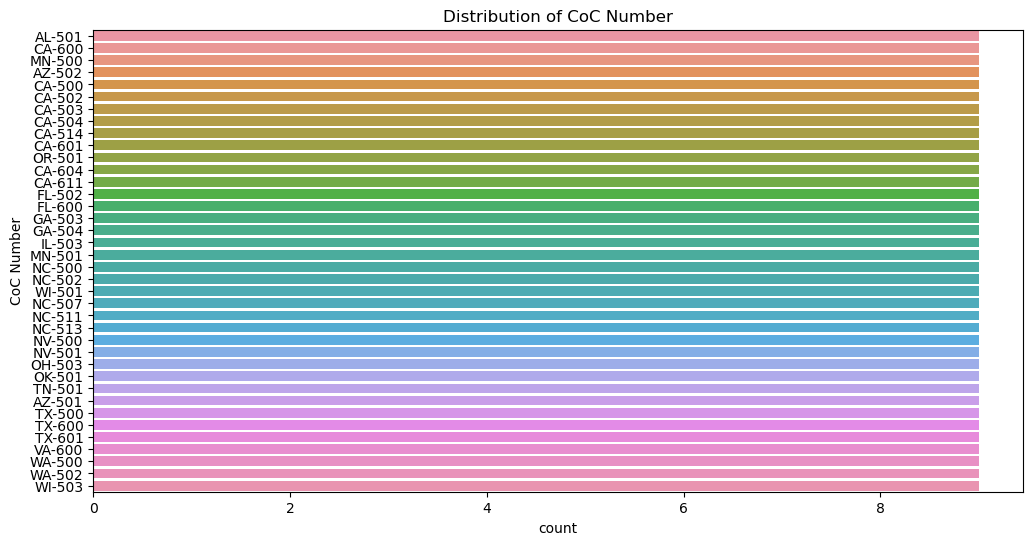

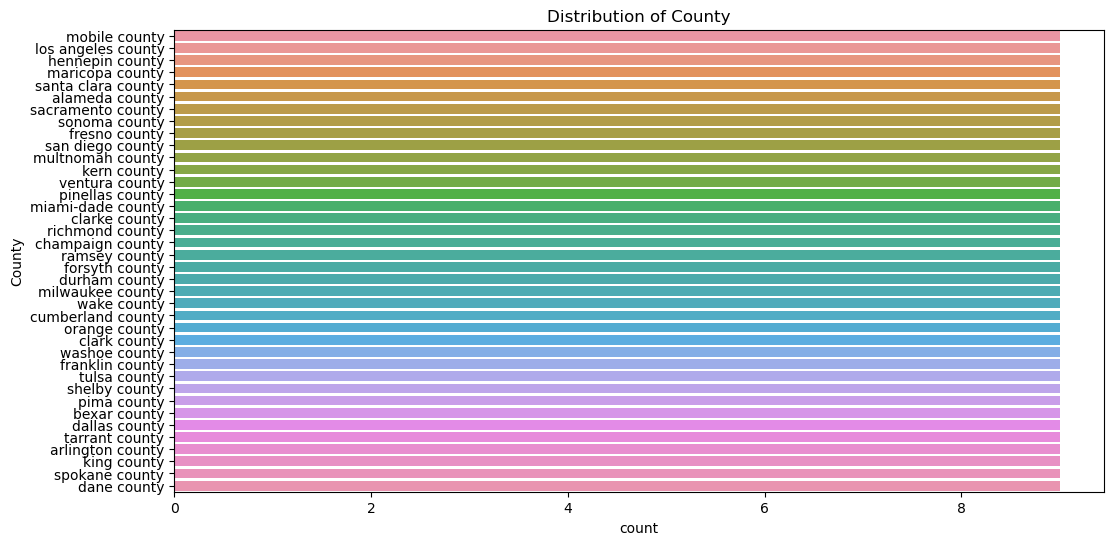

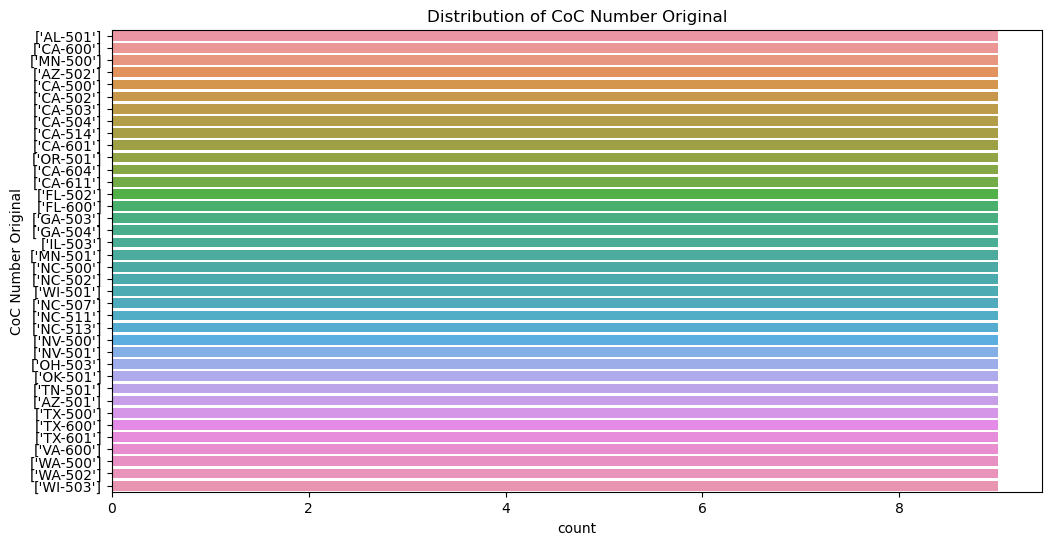

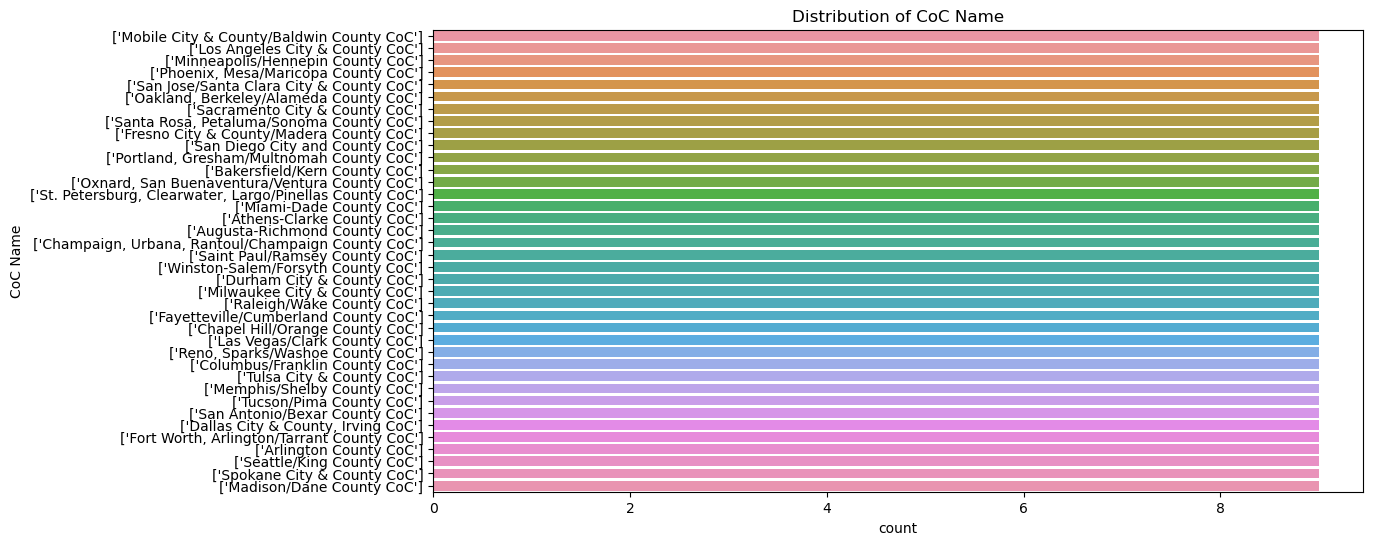

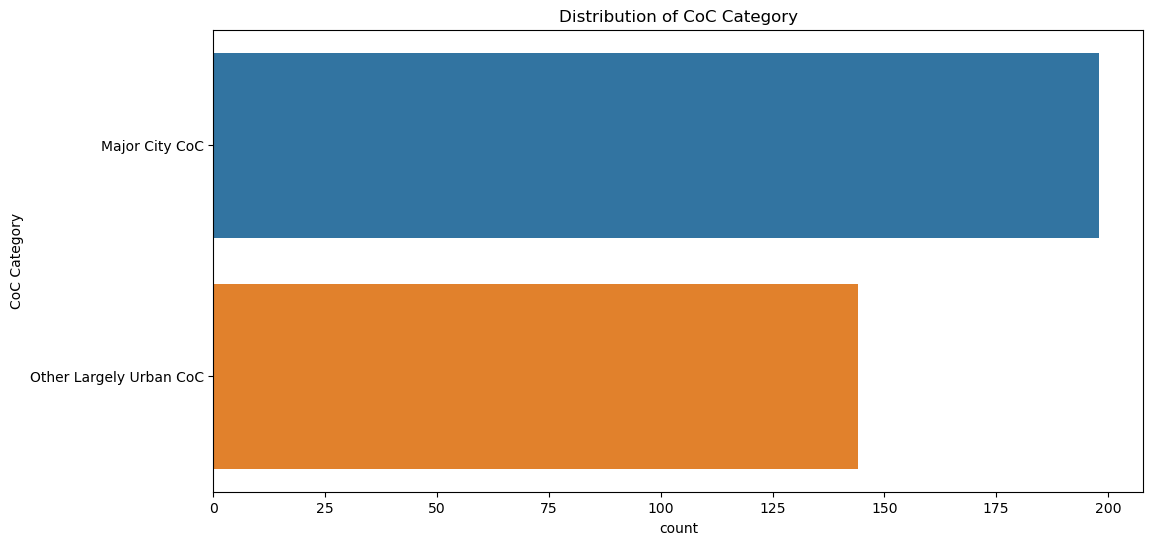

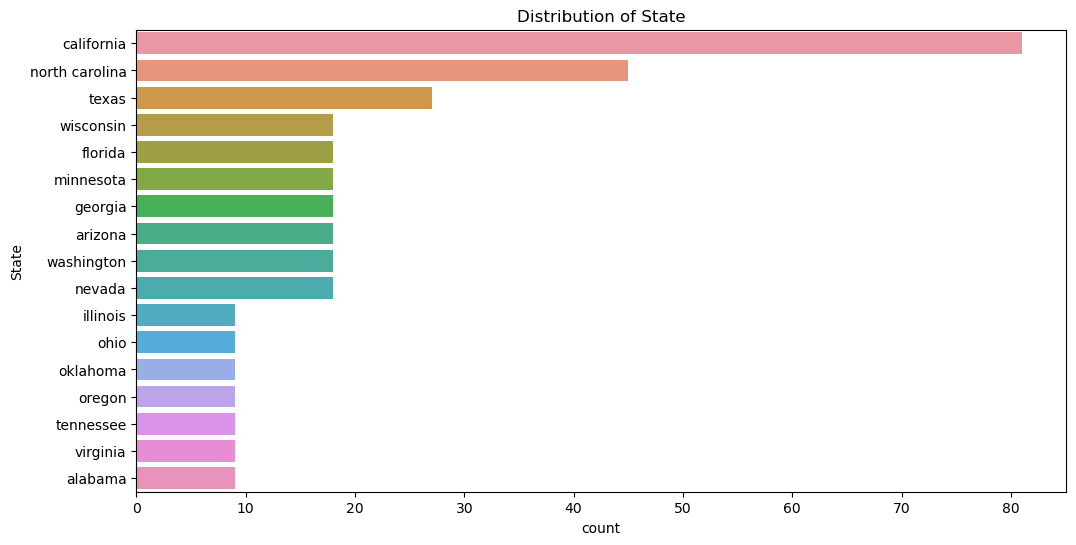

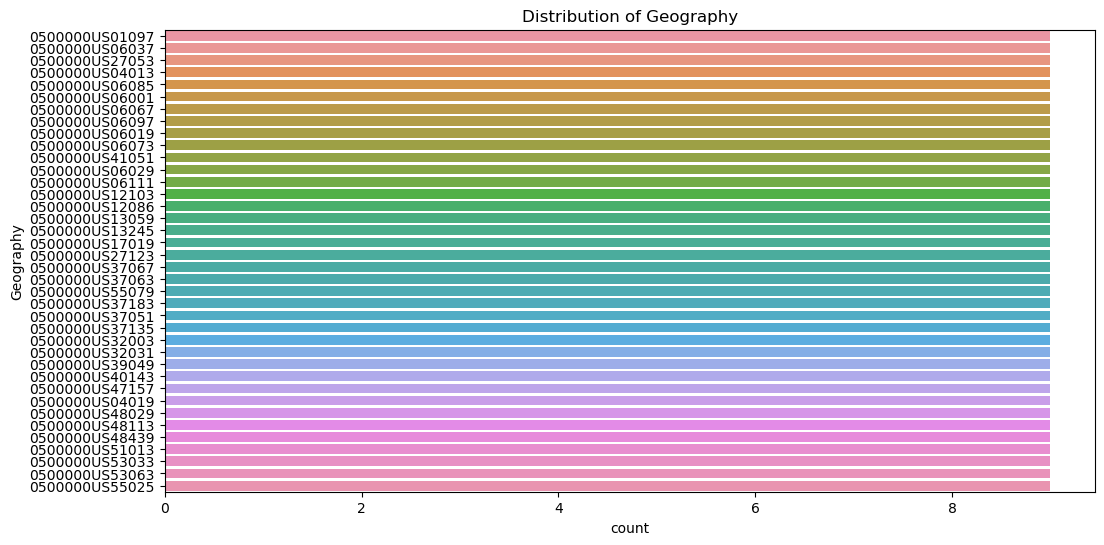

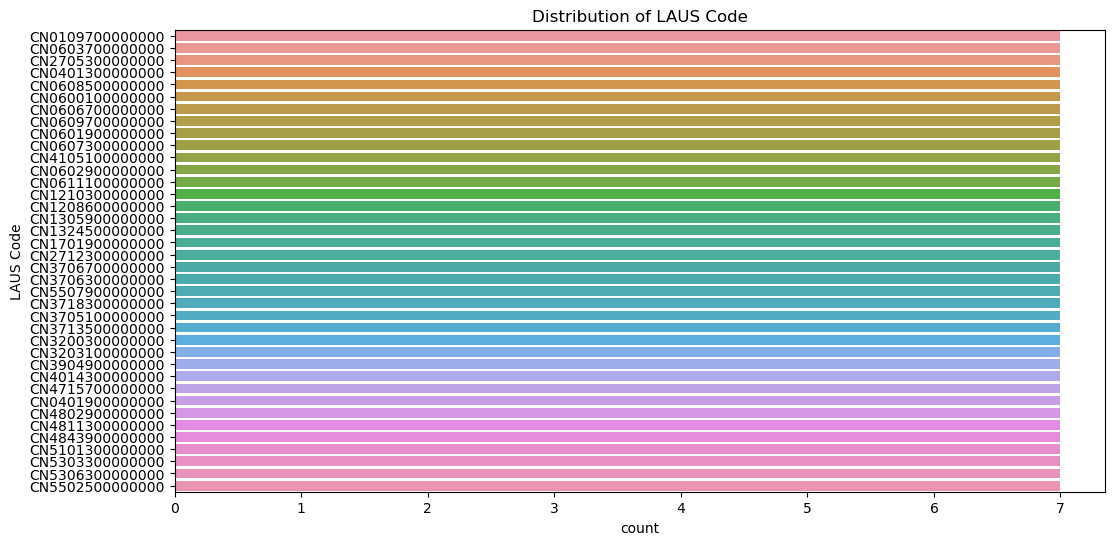

In [12]:
# Visualizing the categorical distribution
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    coc_cnt = df_filtered[col].value_counts().nlargest(40).index  # Looking at the top 20
    sns.countplot(y=df_filtered[col], order=coc_cnt)
    plt.title(f"Distribution of {col}")
    plt.show()

<a id="section-1_6"></a>
### 1.6 Taking a look at the numerical variables

Visualizing Histograms

To enhance visibility, the histograms were plotted in batches. Here are some key observations from a quick scan:

1. The data spans the years 2010 to 2018.
2. Many histograms exhibit right-skewed distributions.
3. The histograms for total homeless, total sheltered homeless, and unsheltered homeless per 10k also show right-skewed distributions. This suggests:
    - Most CoCs have a relatively low number of homeless individuals.
    - A small number of CoCs have significantly higher homeless counts, creating the skewed pattern.

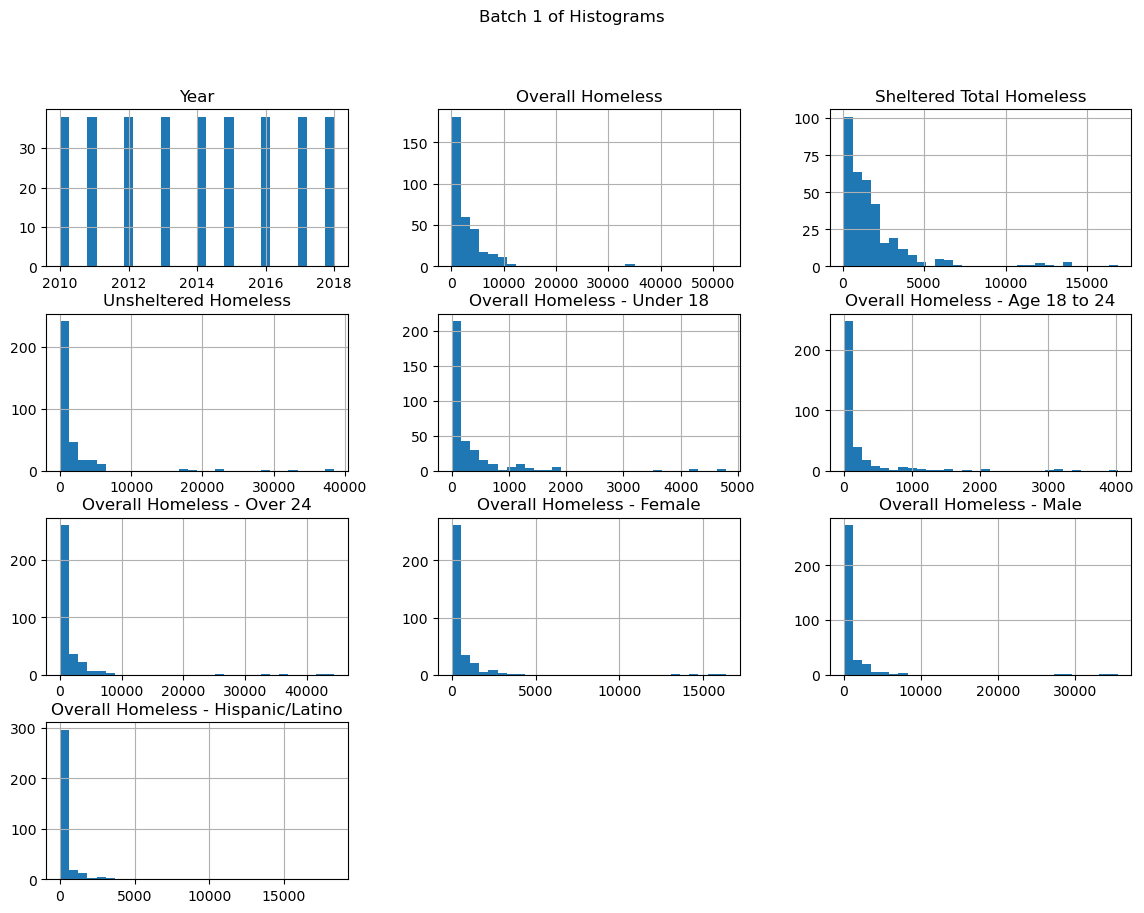

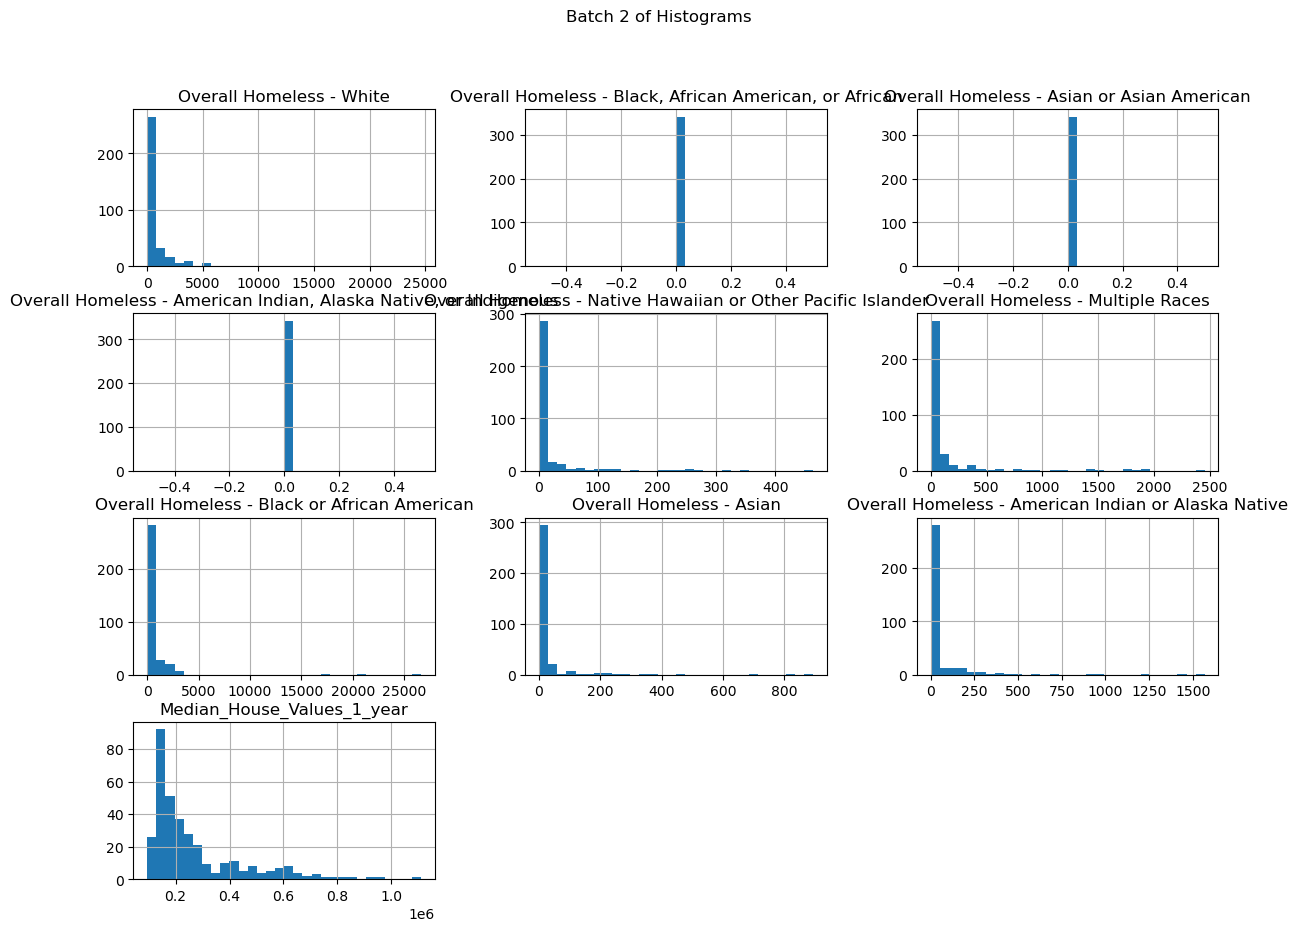

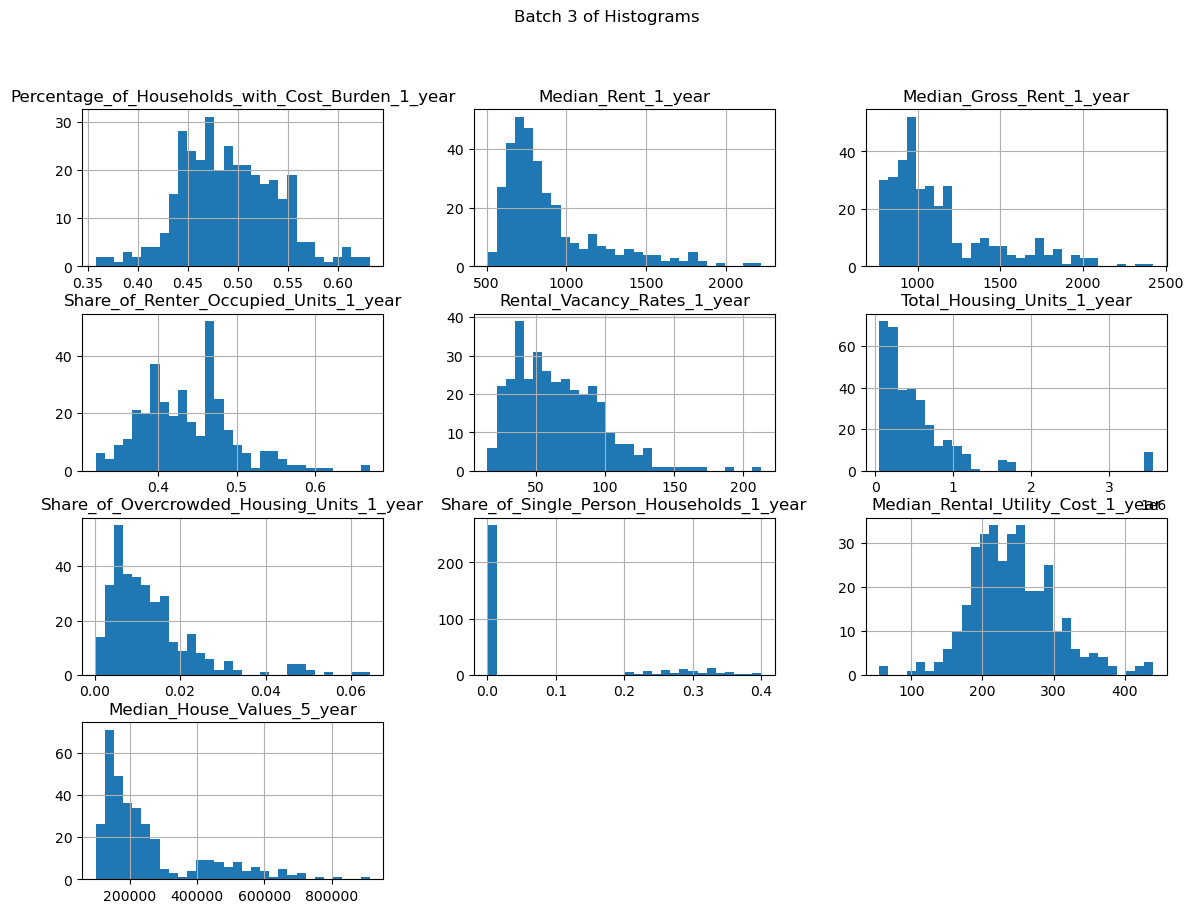

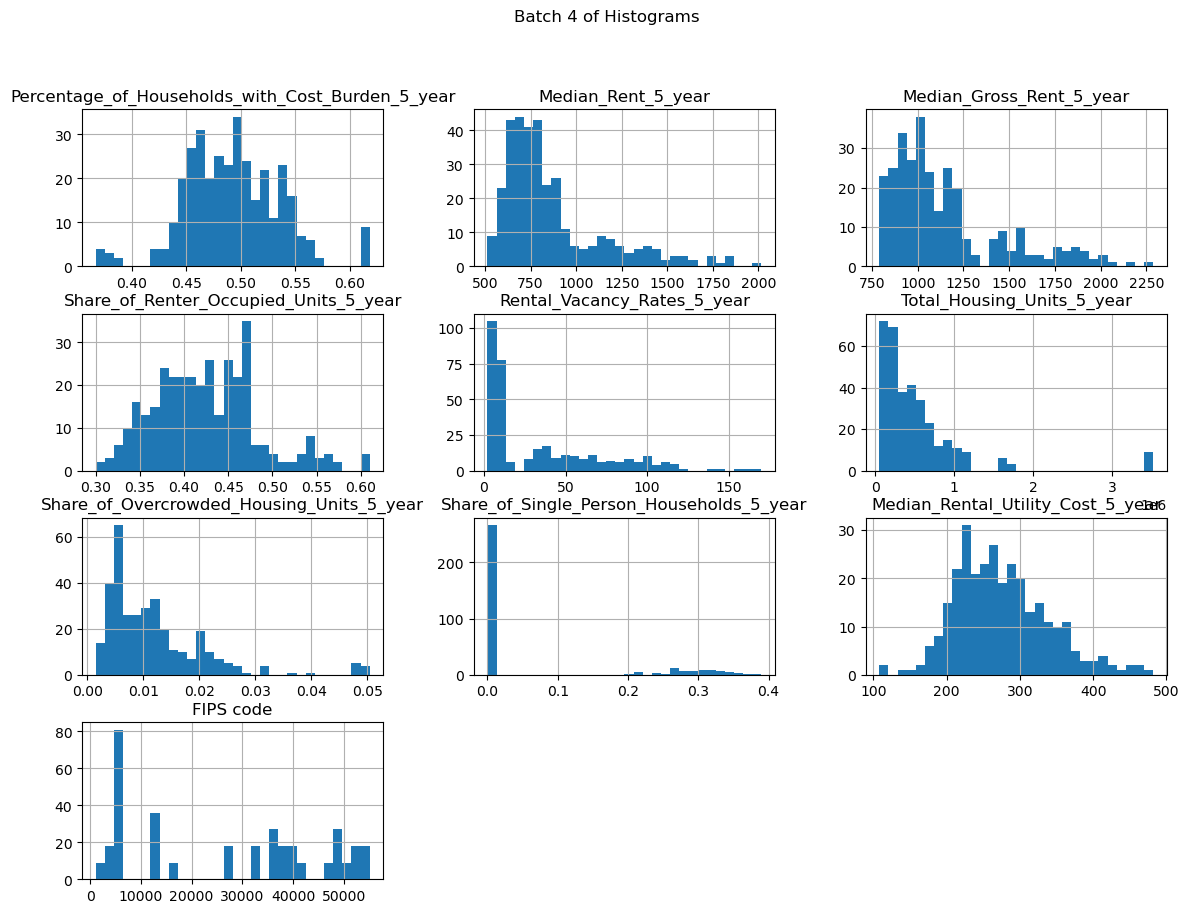

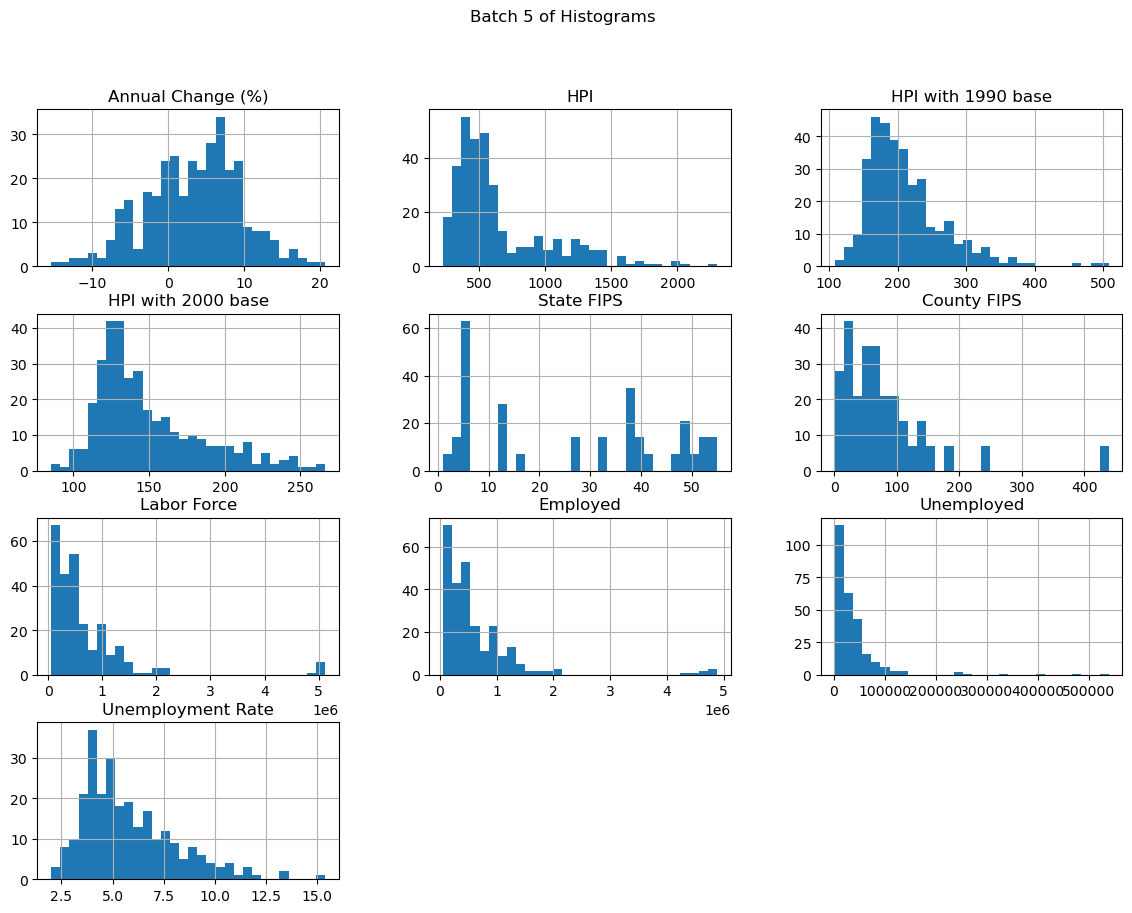

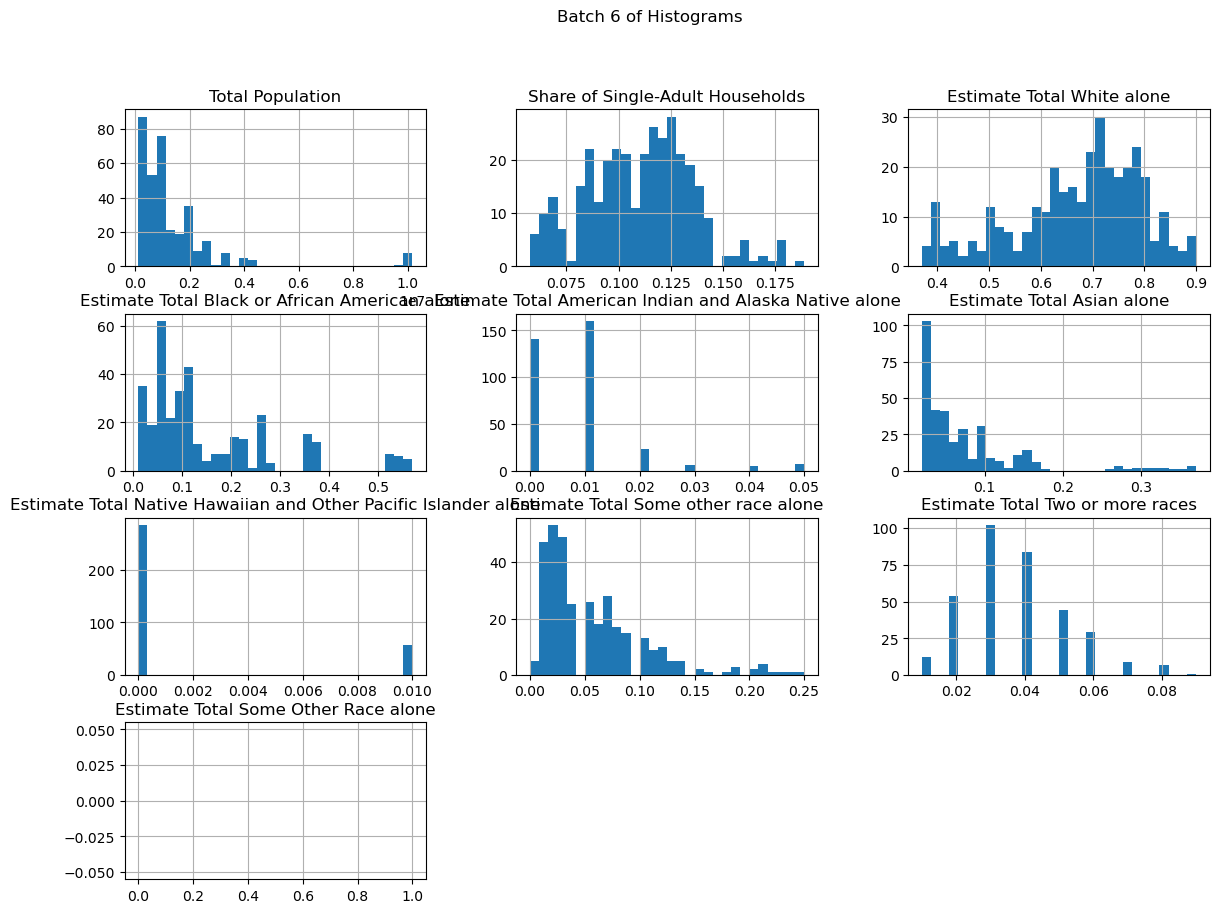

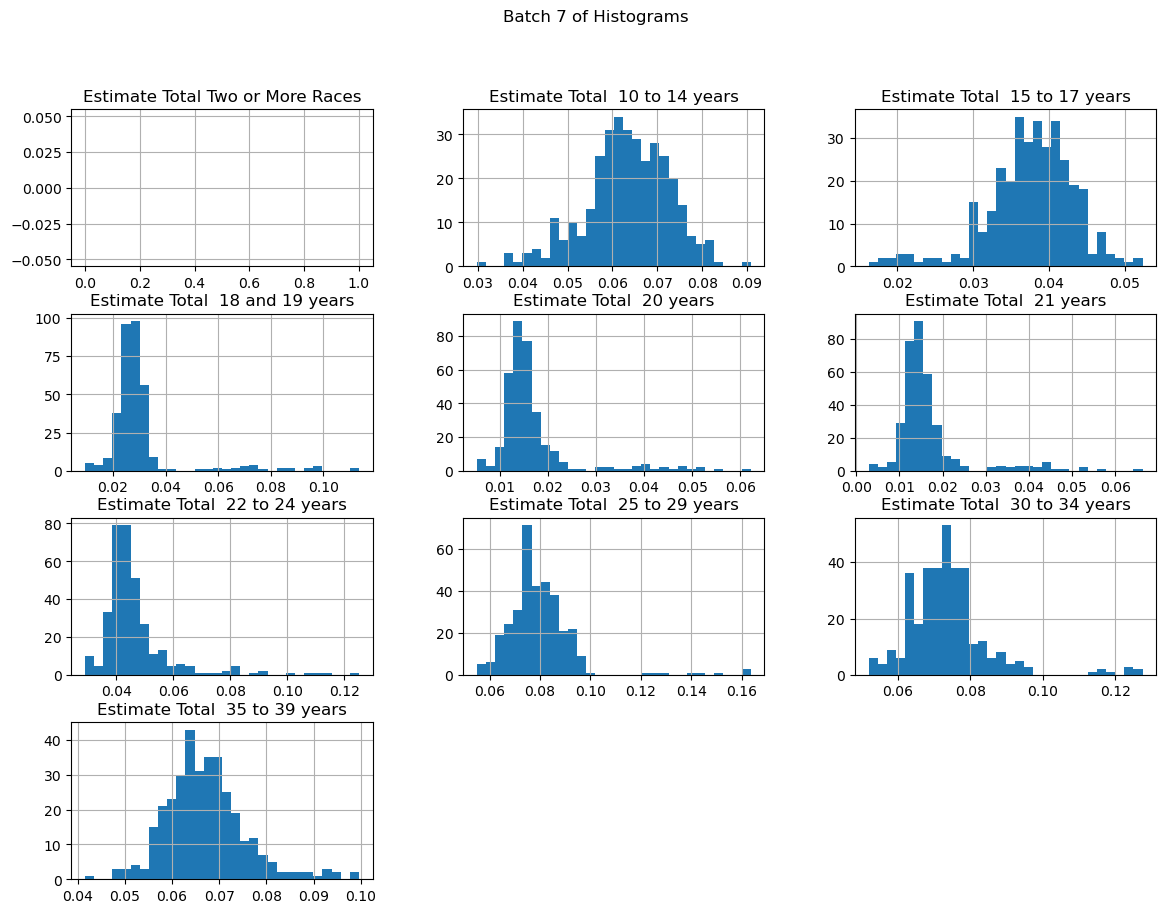

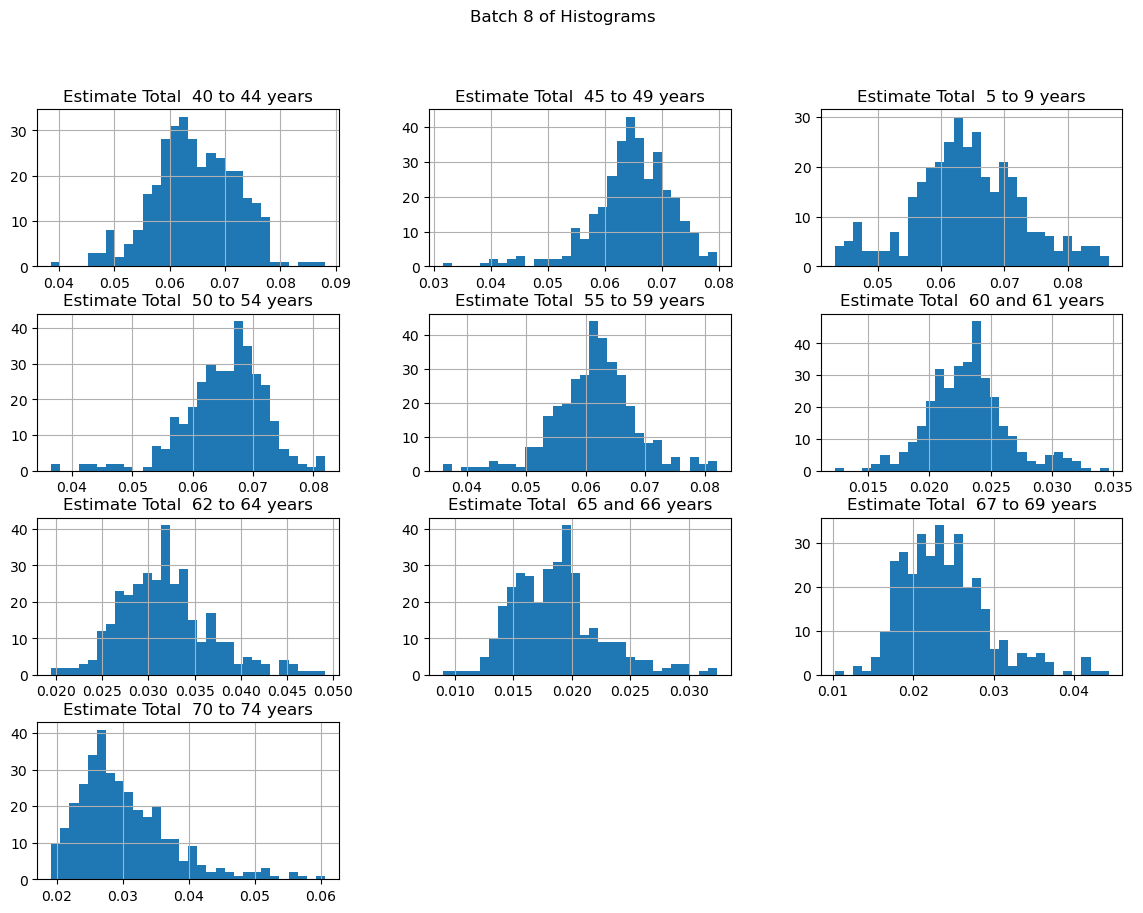

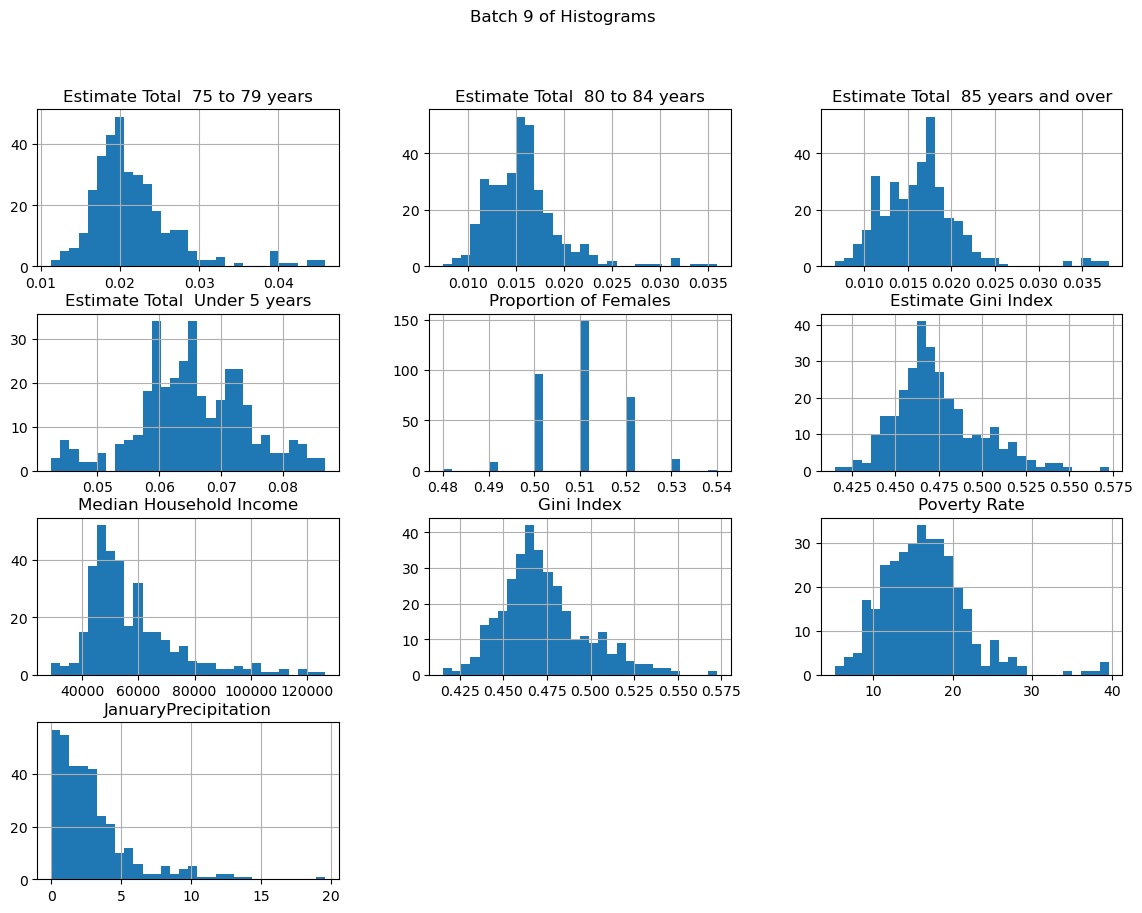

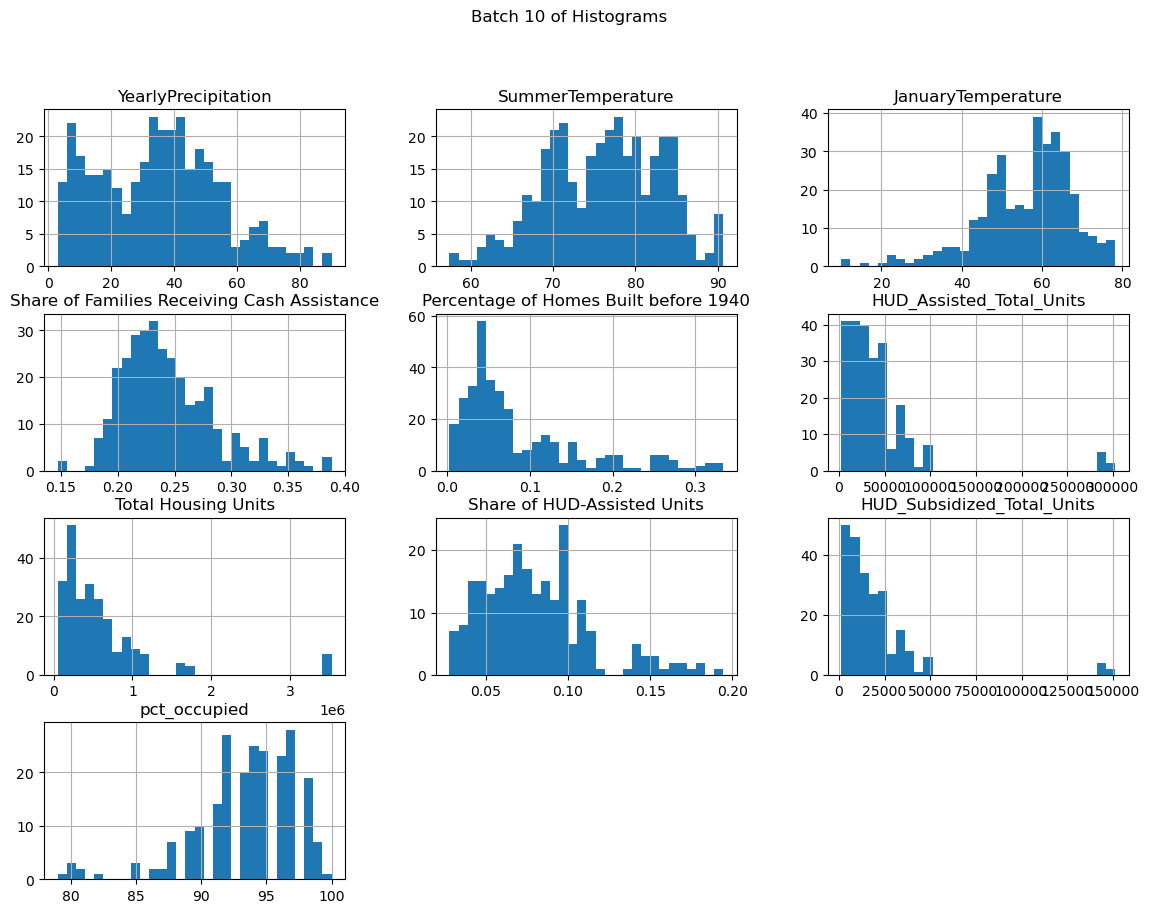

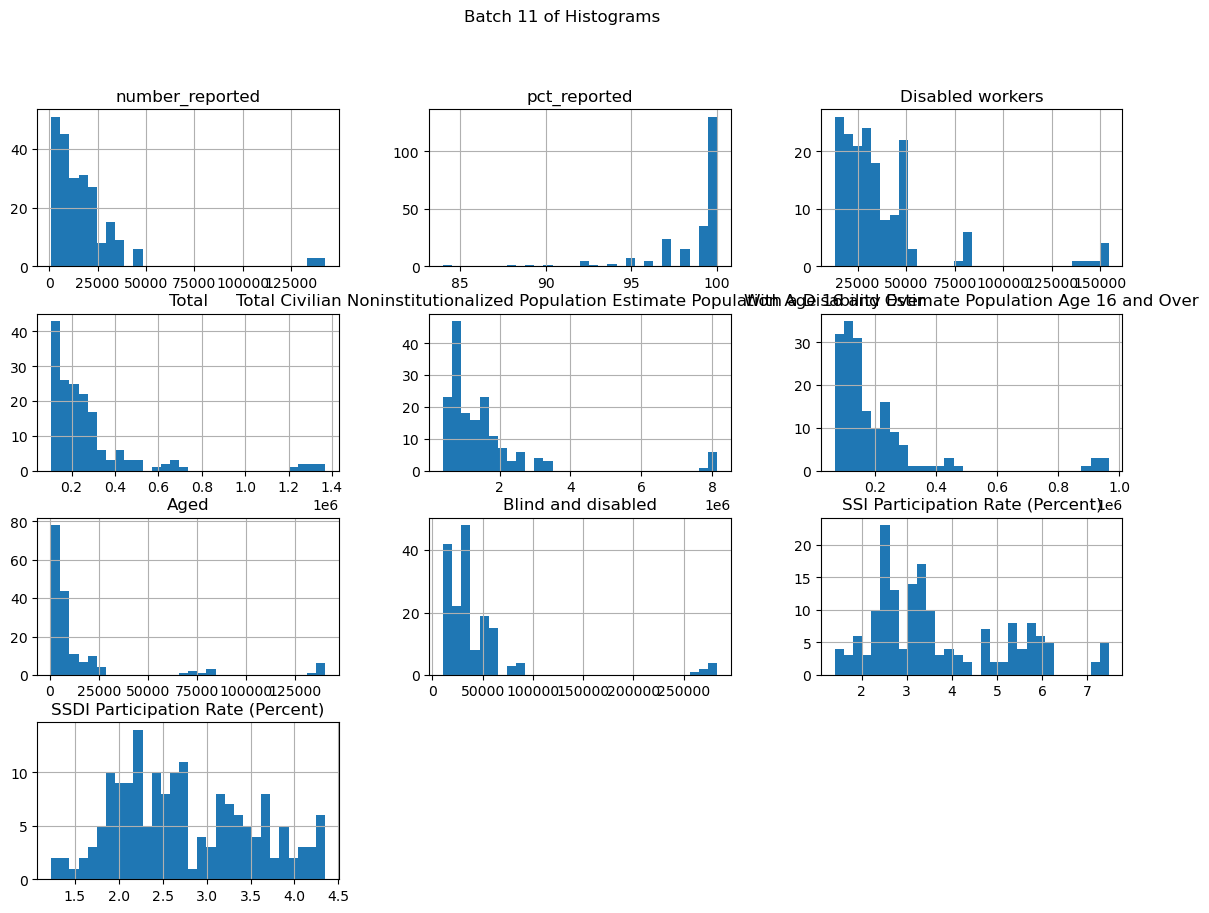

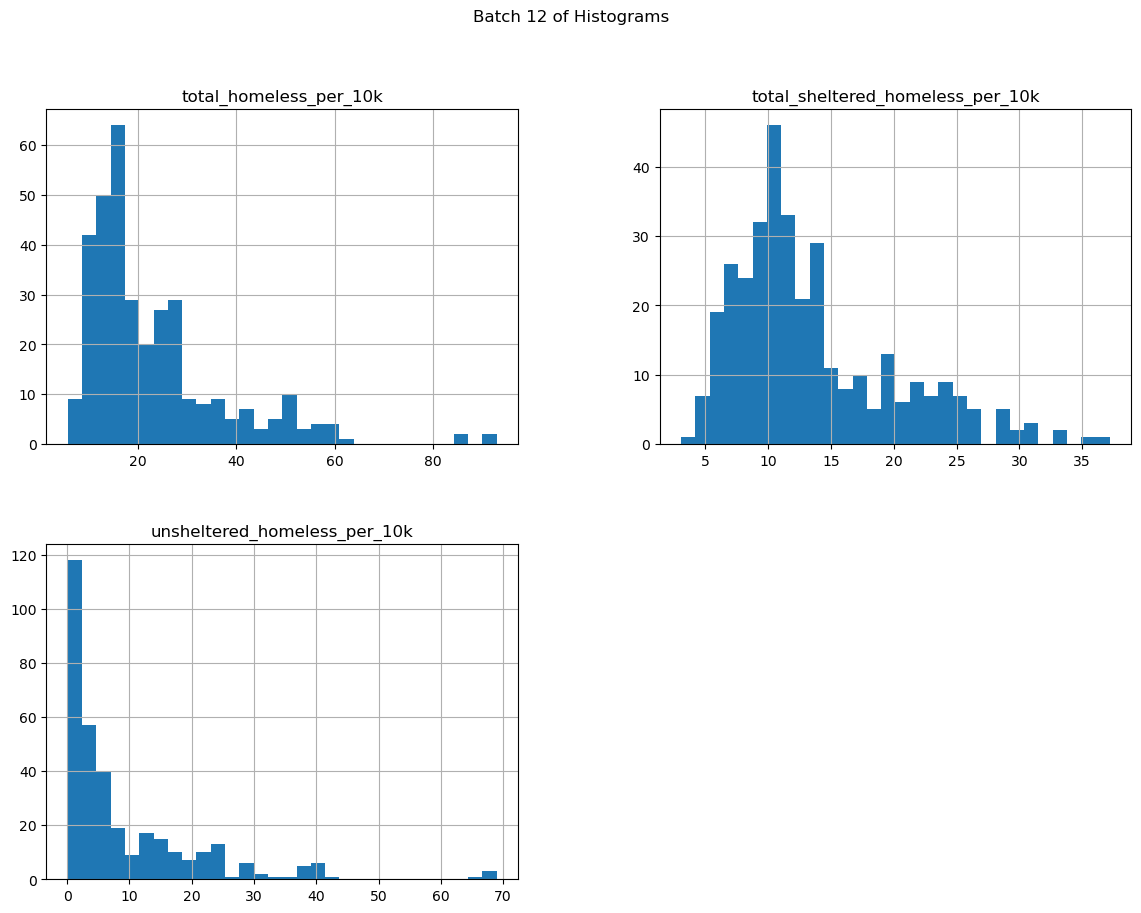

In [13]:
# Histogram of numerical columns
num_cols = df_filtered.select_dtypes(include=['number']).columns

batch_size = 10  # Number of histograms per batch
num_batches = int(np.ceil(len(num_cols) / batch_size))  # Calculating the number of batches

for i in range(num_batches):
    batch_cols = num_cols[i * batch_size:(i + 1) * batch_size]
    df_filtered[batch_cols].hist(figsize=(14, 10), bins=30)
    plt.suptitle(f'Batch {i + 1} of Histograms')
    plt.show()

<a id="section-1_7"></a>
### 1.7 Looking for correlations

Correlation Matrix Analysis

The full correlation matrix was too cluttered, so I filtered it to display only correlations above 0.7 (strong correlations). Here are some key observations:

1. Several predictor variables exhibit strong positive correlations, indicating potential multicollinearity among related features.
2. Some predictors show strong negative correlations, suggesting inverse relationships between certain variables.
3. Highly correlated predictors might indicate redundancy, which could impact model performance. Feature selection or dimensionality reduction techniques (e.g. PCA) might be useful.
4. Groups of strongly correlated variables may represent similar underlying factors, such as economic conditions, population density, or regional policies affecting homelessness rates.

d:\anaconda3\envs\class210\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


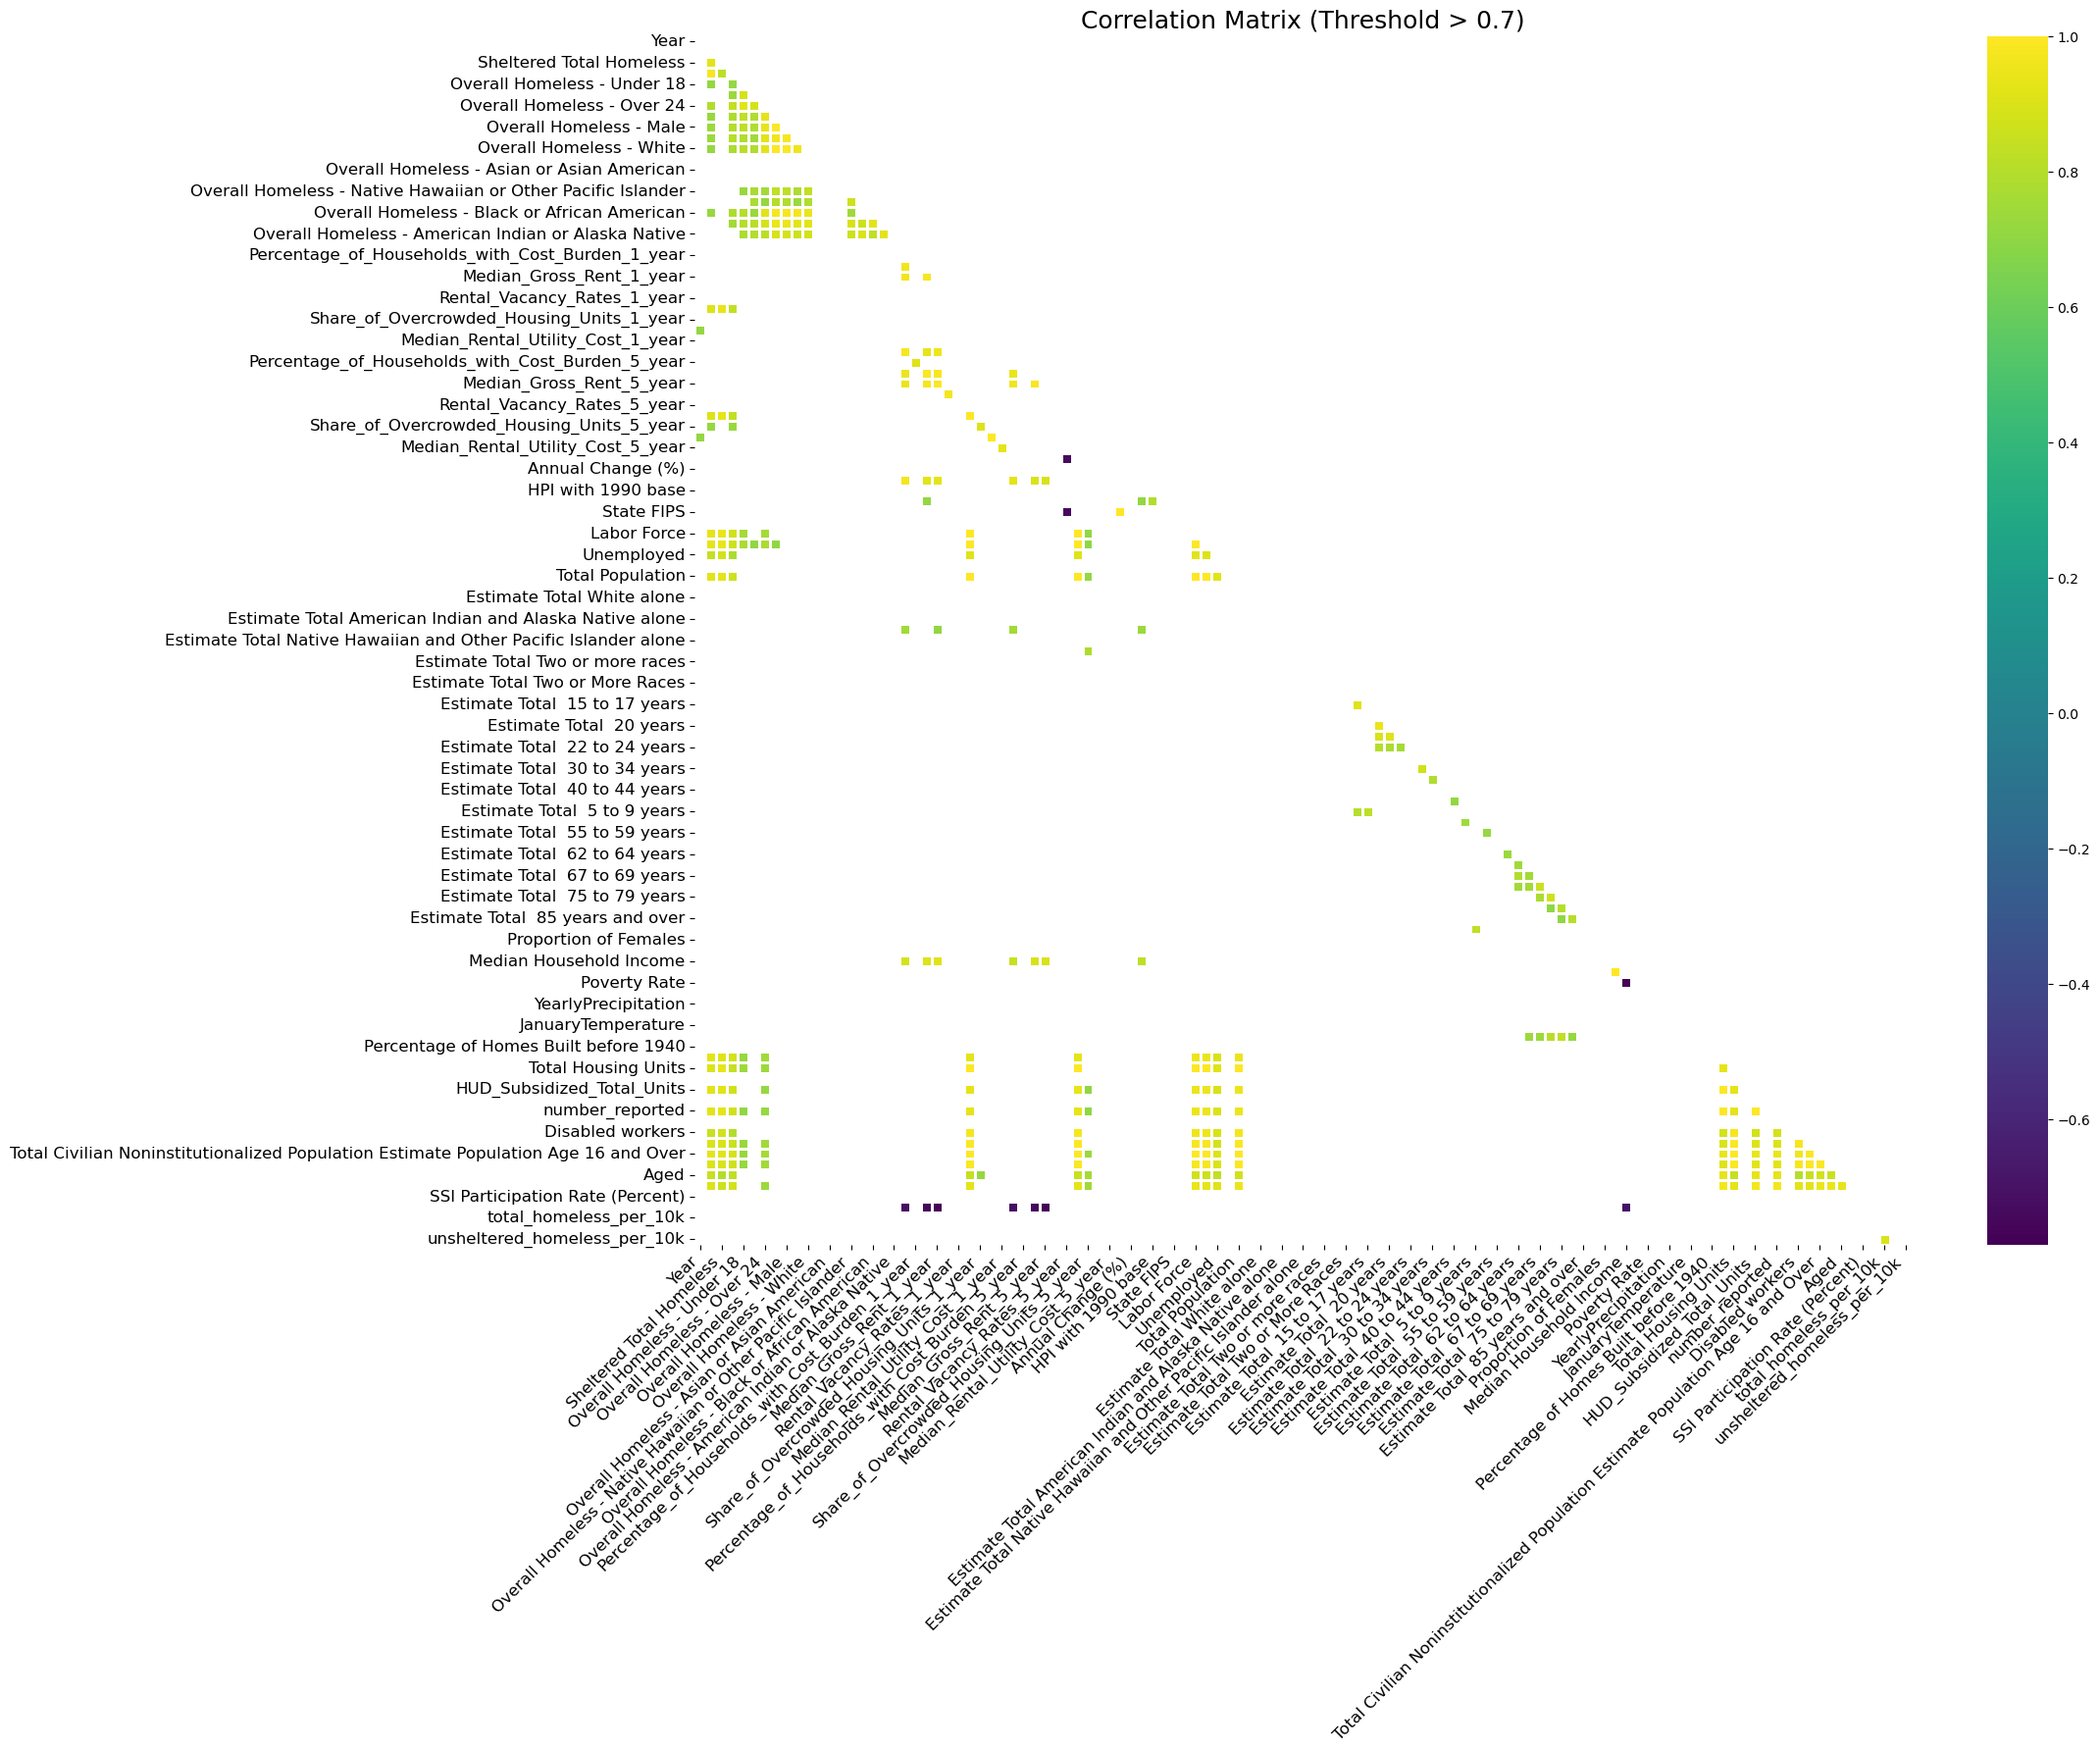

In [14]:
# Heatmap of numerical correlations
# setting the figure size
plt.figure(figsize=(20, 16))

corr_matrix_task2 = df_filtered.select_dtypes(include=['number']).corr()

# Set correlation threshold
threshold = 0.7

# Fill NaNs with 0 to avoid warnings
corr_matrix_task2 = corr_matrix_task2.fillna(0)

# Create a mask to hide weak correlations
mask = np.triu(np.ones_like(corr_matrix_task2, dtype=bool))
#mask = abs(corr_matrix) < threshold
weak_corr_mask = abs(corr_matrix_task2) < threshold

# Combining masks to hide both weak correlations and NaNs
combined_mask = mask | weak_corr_mask

sns.heatmap(
    corr_matrix_task2, 
    annot=True, 
    cmap="viridis", 
    fmt=".1f", 
    linewidths=0.75, 
    mask=combined_mask,
    annot_kws={"size": 12}
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.title(f"Correlation Matrix (Threshold > {threshold})", fontsize=18)

plt.show()

#### 1.7.1 Heatmap to highlight only correlations with total_homeless_per_10k

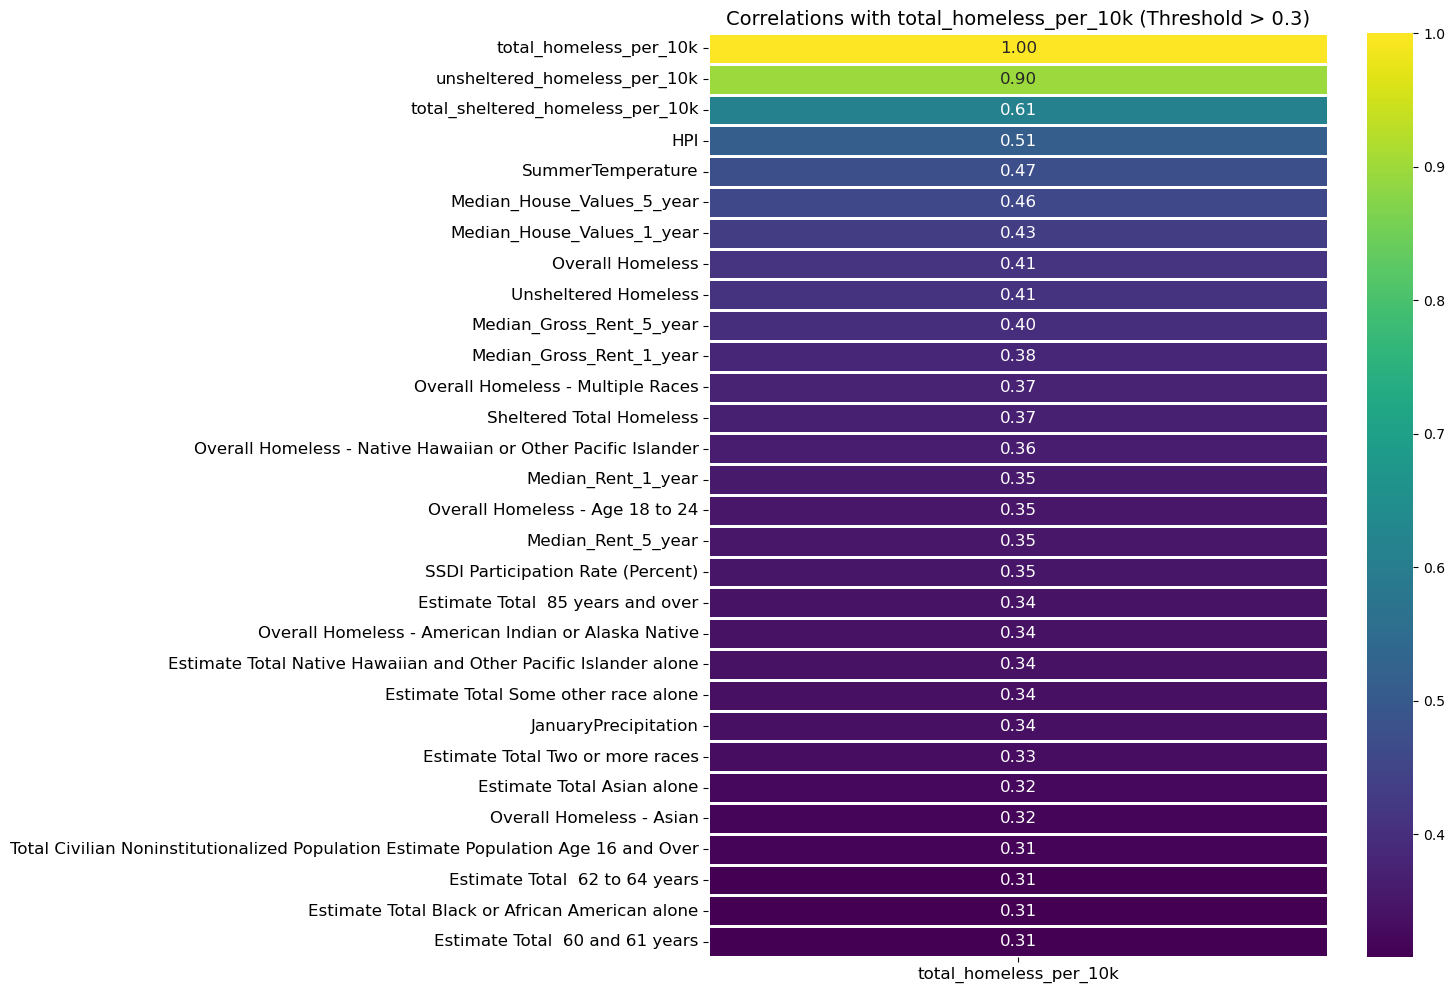

In [15]:
# Heatmap to highlight only correlations with total_homeless_per_10k
# Setting the figure size
plt.figure(figsize=(10, 12))  # Adjusted for a single column visualization

corr_matrix = df_filtered.select_dtypes(include=['number']).corr()

# Extracting correlations only for the target variable
target_corr_task2 = corr_matrix[['total_homeless_per_10k']].copy()

# Setting correlation threshold
threshold = 0.3

# Masking weak correlations
target_corr_task2 = target_corr_task2[abs(target_corr_task2) > threshold].dropna()

# Sorting by absolute correlation values and placing strongest at the top)
target_corr_task2 = target_corr_task2.abs().sort_values(by='total_homeless_per_10k', ascending=False)

# Plot heatmap
sns.heatmap(
    target_corr_task2, 
    annot=True, 
    cmap="viridis", 
    fmt=".2f", 
    linewidths=0.75, 
    annot_kws={"size": 12}
)

# Improve label readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.title(f"Correlations with total_homeless_per_10k (Threshold > {threshold})", fontsize=14)

plt.show()

#### 1.7.2 Saving correlations with total_homeless_per_10k to CSV

In [ ]:
# Saving correlations with total_homeless_per_10k to CSV

# Getting current date in the format YYYYMMDD
current_date = datetime.datetime.now().strftime("%Y%m%d")

# Defining the output CSV file path
output_dir = "./data/"

# Setting output filename with date
#correlation_csv_path = os.path.join(output_dir, "total_homeless_per_10k_correlations.csv")
correlation_csv_path = os.path.join(output_dir, f"total_homeless_per_10k_correlations_{current_date}.csv")

# Saving correlations to a CSV file
target_corr_task2.to_csv(correlation_csv_path, encoding="utf-8")

print(f"Correlations saved to: {correlation_csv_path}")

Correlations saved to: ./data/total_homeless_per_10k_correlations_20250330.csv


<a id="section-1_8"></a>
### 1.8 Pairplot Analysis

Pairplot Analysis

From the correlations matrix, I selected the following columns for the pairplots to explore the relationships:

1. HPI
2. SummerTemperature
3. Median_House_Values_5_year
4. Median_House_Values_1_year
5. Overall Homeless
6. Unsheltered Homeless

Observations:

- Most plots show a dense grouping of values near the lower end, indicating that the majority of data points fall within a smaller range.
- A few outliers or extreme values appear near the upper end, suggesting that a small number of CoCs have significantly higher counts for these variables.
- There may be nonlinear relationships between certain variables, which could suggest further investigation using transformations or different statistical techniques.
- Some variables may show strong collinearity, particularly between population-related metrics and homelessness counts.

d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

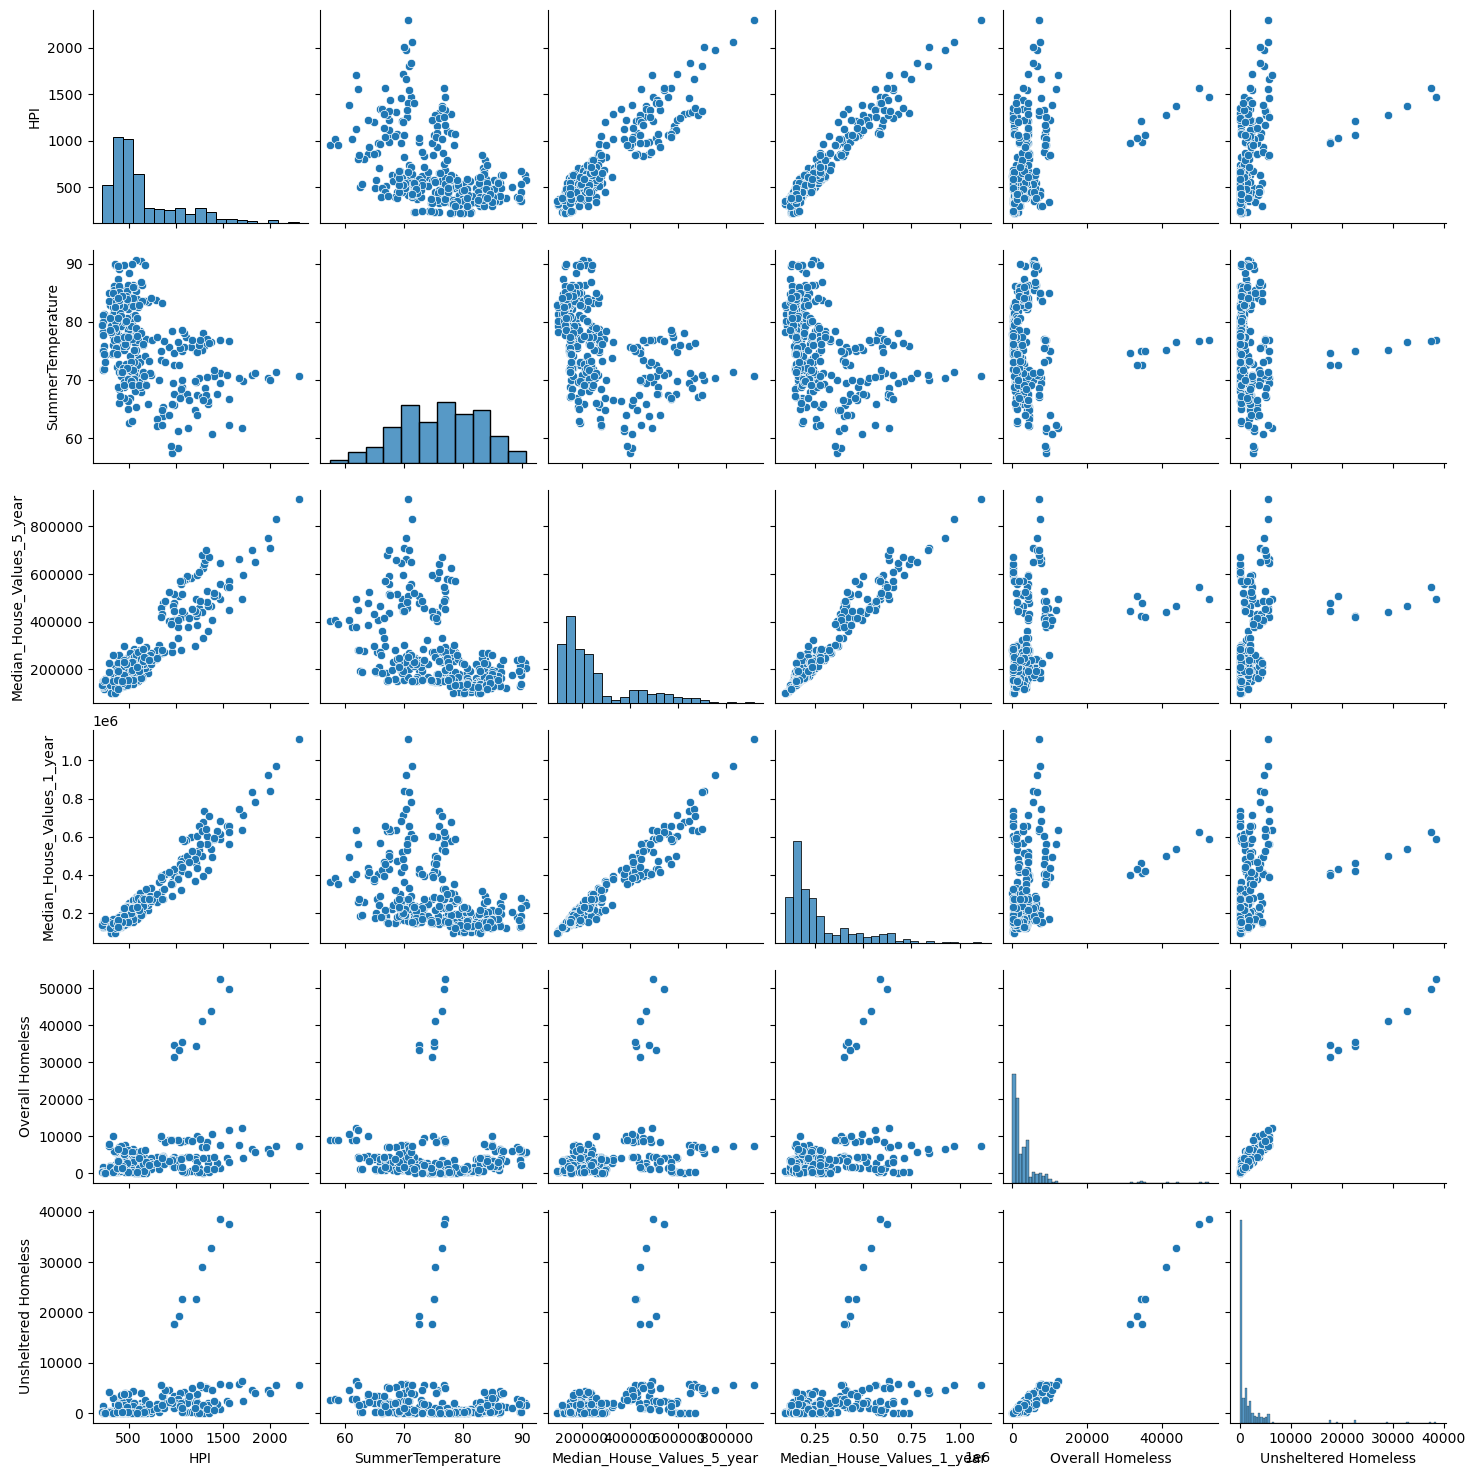

In [16]:
# Sampling the dataset
sample_size = min(1000, len(df_filtered))
df_sampled = df_filtered.sample(sample_size, random_state=42)

# Replacing infinite values with NaN to remove a warning
df_sampled = df_sampled.replace([np.inf, -np.inf], np.nan)

# Renaming the Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over column
df_shortened = df_sampled.rename(columns={
    "Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over": "Total Pop (16+)"
})

# Using the following columns for the pairplots
sns.pairplot(df_shortened[["HPI", 
                         "SummerTemperature",
                         "Median_House_Values_5_year",
                         "Median_House_Values_1_year", 
                         "Overall Homeless", 
                         "Unsheltered Homeless"]],
             kind="scatter")

plt.show()

#### 1.8.1 Highlighting trends with a color-coded visualization

d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\class210\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

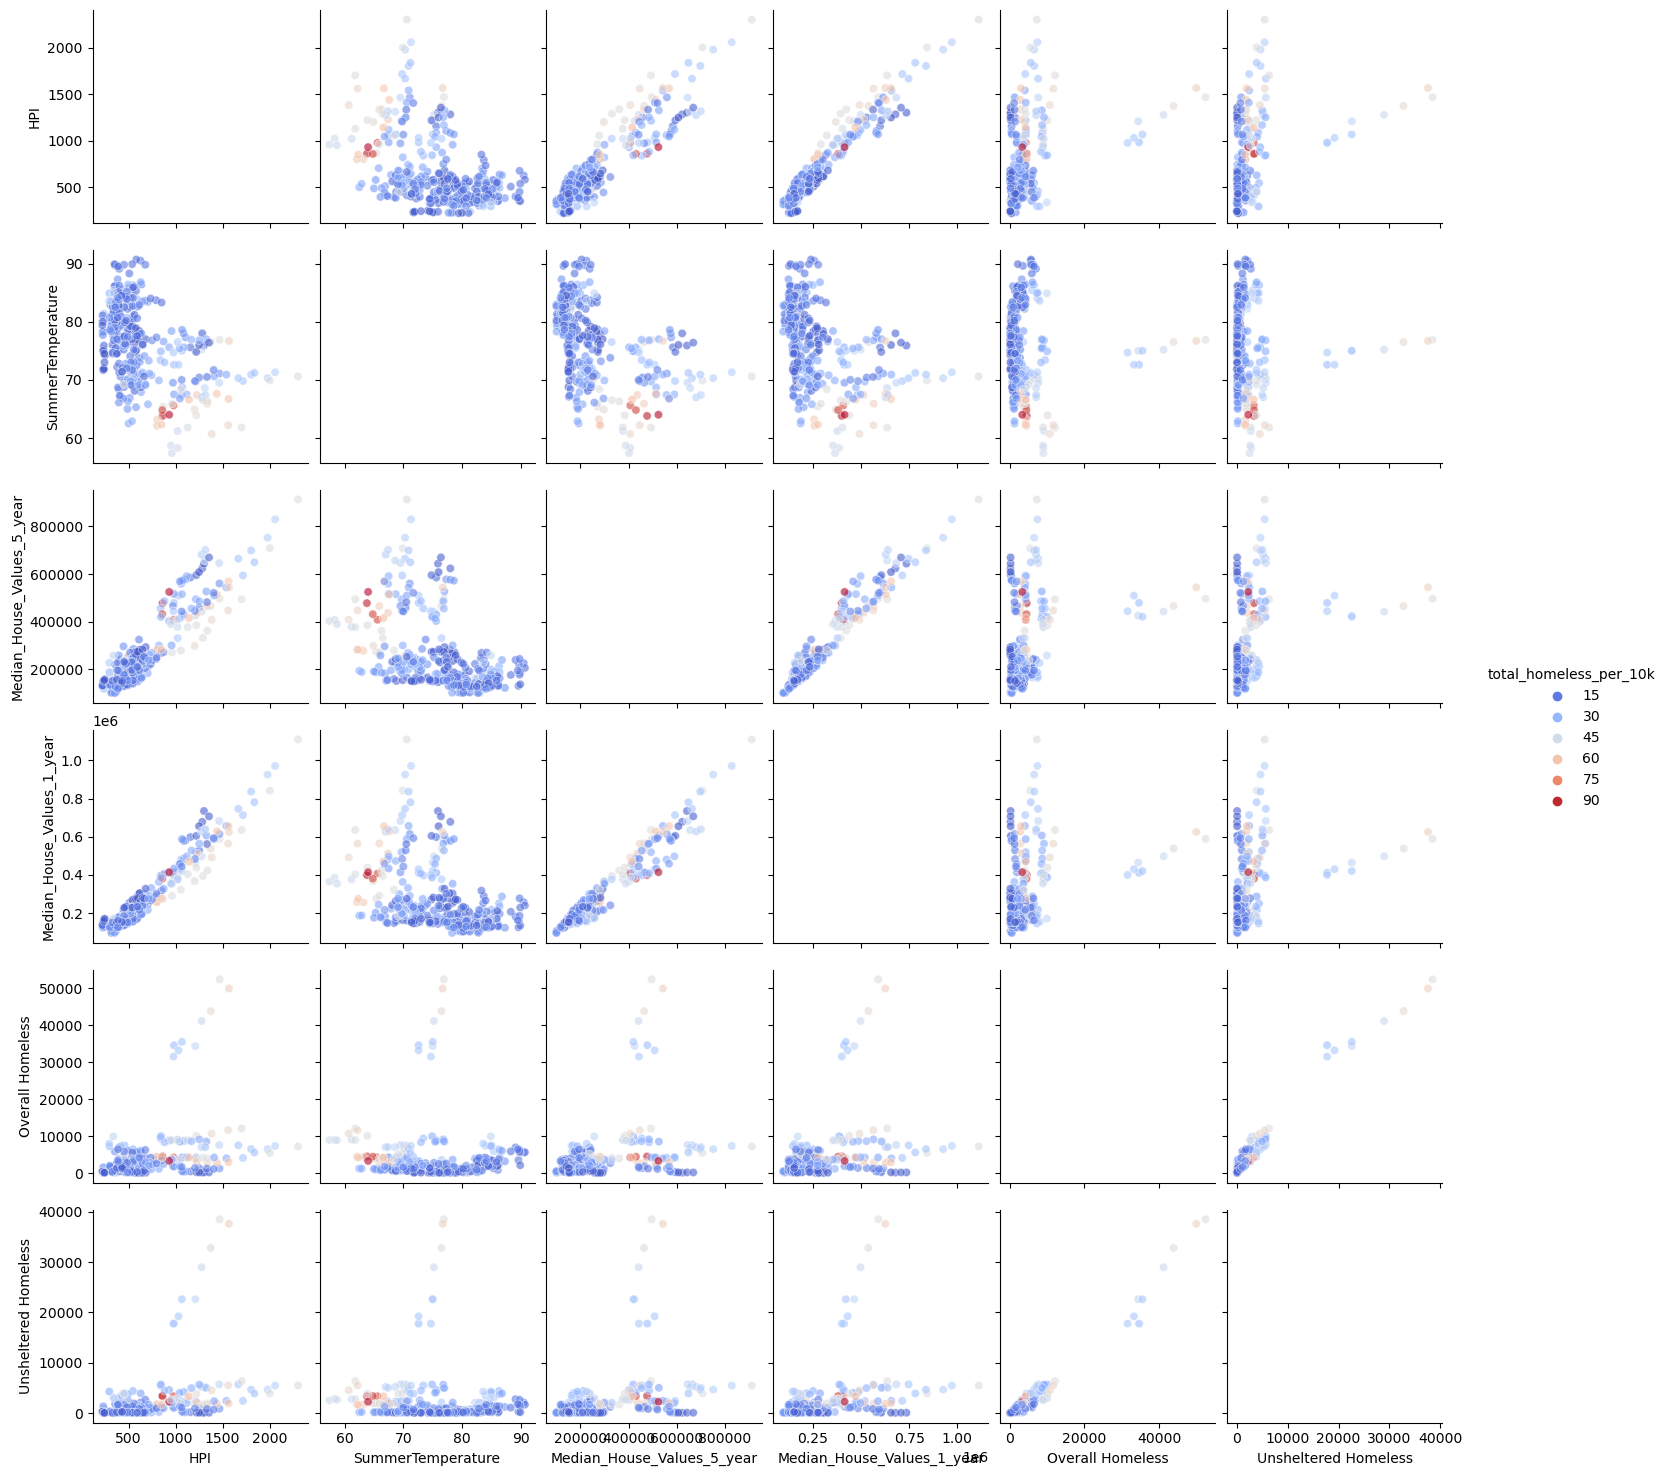

In [17]:
# Highlighting trends with color-coded visualization
# Sampling the dataset
sample_size = min(1000, len(df_filtered))
df_sampled = df_filtered.sample(sample_size, random_state=42)

# Replacing infinite values with NaN to remove a warning
df_sampled = df_sampled.replace([np.inf, -np.inf], np.nan)

# Renaming the Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over column
df_shortened = df_sampled.rename(columns={
    "Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over": "Total Pop (16+)"
})

# Creating a pairplot with color-coded visualization
sns.pairplot(
    df_shortened, 
    vars=[
        "HPI", 
        "SummerTemperature", 
        "Median_House_Values_5_year",
        "Median_House_Values_1_year", 
        "Overall Homeless", 
        "Unsheltered Homeless"
    ],
    hue="total_homeless_per_10k",  # Color based on homelessness rate per 10k
    palette="coolwarm",  # Color scheme to highlight trends
    diag_kind="kde",  # Using KDE plots for better distribution visualization
    plot_kws={"alpha": 0.6},  
    height=2.5  
)

plt.show()

#### 1.8.2 Looking for NaN values per column

In [18]:
# Checking how many NaN values exist per column
missing_counts = df_sampled[["HPI",
                             "SummerTemperature", 
                             "Median_House_Values_5_year", 
                             "Median_House_Values_1_year", 
                             "Overall Homeless", 
                             "Unsheltered Homeless"]].isnull().sum()

print("Missing values per column:\n", missing_counts)

# Checking how many rows contain any NaN values
print("\nTotal rows before dropping NaNs:", len(df_sampled))
print("Rows with NaNs:", df_sampled.isnull().any(axis=1).sum())

Missing values per column:
 HPI                           0
SummerTemperature             0
Median_House_Values_5_year    0
Median_House_Values_1_year    0
Overall Homeless              0
Unsheltered Homeless          0
dtype: int64

Total rows before dropping NaNs: 342
Rows with NaNs: 342


<a id="section-2"></a>
## Section 2 - Models to predict annual homelessness rates using total_homeless_per_10k

<a id="section-2_1"></a>
### 2.1 Loading dataset and selecting the relevant demographic and socioeconomic features for the model

In [2]:
# Loading the homeless dataset into a DataFrame
file_path = f"./data/homeless_dataset_full.csv"
df_homeless_csv = pd.read_csv(file_path, encoding="utf-8")

# Filtering dataset for Major City and Largely Urban CoCs
df_filtered = df_homeless_csv[df_homeless_csv["CoC Category"].isin(["Major City CoC", "Other Largely Urban CoC"])]

# Displaying 5 random rows
#df_filtered.head()
df_filtered.sample(5, random_state=45)

CoC Number           County  Year  Overall Homeless  \
324      GA-504  richmond county  2016               287   
808      OH-503  franklin county  2011              1418   
1097     WA-500      king county  2011              8972   
38       CA-502   alameda county  2012              4257   
61       CA-504    sonoma county  2017              2835   

      Sheltered Total Homeless  Unsheltered Homeless  \
324                        266                    21   
808                       1274                   144   
1097                      6480                  2492   
38                        2045                  2212   
61                         988                  1847   

      Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
324                            56                               15   
808                             0                                0   
1097                            0                                0   
38                              0                                0   
61                            297                              431   

      Overall Homeless - Over 24  Overall Homeless - Female  \
324                          216                        118   
808                            0                          0   
1097                           0                          0   
38                             0                          0   
61                          2107                        855   

      Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
324                       169                                   5   
808                         0                                   0   
1097                        0                                   0   
38                          0                                   0   
61                       1968                                 697   

      Overall Homeless - White  \
324                         80   
808                          0   
1097                         0   
38                           0   
61                        1990   

      Overall Homeless - Black, African American, or African  \
324                                                   0        
808                                                   0        
1097                                                  0        
38                                                    0        
61                                                    0        

      Overall Homeless - Asian or Asian American  \
324                                            0   
808                                            0   
1097                                           0   
38                                             0   
61                                             0   

      Overall Homeless - American Indian, Alaska Native, or Indigenous  \
324                                                   0                  
808                                                   0                  
1097                                                  0                  
38                                                    0                  
61                                                    0                  

      Overall Homeless - Native Hawaiian or Other Pacific Islander  \
324                                                   0              
808                                                   0              
1097                                                  0              
38                                                    0              
61                                                   28              

      Overall Homeless - Multiple Races  \
324                                   9   
808                                   0   
1097                                  0   
38                                    0   
61                                  396   

      Overall Homeless - Black or African American  Overall Home

In [3]:
# Loading the correlation file to identify the strongest predictors
correlation_file_path = "./data/total_homeless_per_10k_correlations_20250330.csv"
df_correlations = pd.read_csv(correlation_file_path, index_col=0)

# Selecting the strongest predictors based on correlation values
threshold = 0.3
strong_predictors = df_correlations[abs(df_correlations['total_homeless_per_10k']) > threshold].index.tolist()

# Define target variable
target_task2 = "total_homeless_per_10k"

# Ensuring selected features exist in the dataset
#selected_features = [feature for feature in strong_predictors if feature in df_filtered.columns]
#selected_features = [feature for feature in strong_predictors if feature in df_filtered.columns and feature != target]

# Excluding the target variable and highly collinear features
features_to_exclude = [target_task2, "total_sheltered_homeless_per_10k", "unsheltered_homeless_per_10k"]

selected_features_task2 = [feature for feature in strong_predictors if feature in df_filtered.columns and feature not in features_to_exclude]

# Creating a new DataFrame with selected features and target variable
#df_model_task2 = df_filtered[selected_features_task2 + [target_task2]].copy()
id_columns = ["CoC Number", "County", "Year"]  # Needed to bring in CoC number, County, and Year for identification purposes
df_model_task2 = df_filtered[id_columns + selected_features_task2 + [target_task2]].copy()

# Display the first few rows to verify
#df_model.head()
# Displaying 5 random rows
df_model_task2.sample(5, random_state=45)

CoC Number           County  Year      HPI  SummerTemperature  \
324      GA-504  richmond county  2016   332.00               82.6   
808      OH-503  franklin county  2011   375.84               74.5   
1097     WA-500      king county  2011   958.93               57.4   
38       CA-502   alameda county  2012  1068.46               68.7   
61       CA-504    sonoma county  2017  1438.44               67.6   

      Median_House_Values_5_year  Median_House_Values_1_year  \
324                       100600                    101600.0   
808                       155200                    150400.0   
1097                      402300                    364300.0   
38                        514900                    472900.0   
61                        513300                    628400.0   

      Overall Homeless  Unsheltered Homeless  Median_Gross_Rent_5_year  \
324                287                    21                     804.0   
808               1418                   144                     971.0   
1097              8972                  2492                    1425.0   
38                4257                  2212                    1565.0   
61                2835                  1847                    1577.0   

      Median_Gross_Rent_1_year  Overall Homeless - Multiple Races  \
324                      800.0                                  9   
808                      936.0                                  0   
1097                    1387.0                                  0   
38                      1501.0                                  0   
61                      1717.0                                396   

      Sheltered Total Homeless  \
324                        266   
808                       1274   
1097                      6480   
38                        2045   
61                         988   

      Overall Homeless - Native Hawaiian or Other Pacific Islander  \
324                                                   0              
808                                                   0              
1097                                                  0              
38                                                    0              
61                                                   28              

      Median_Rent_1_year  Overall Homeless - Age 18 to 24  Median_Rent_5_year  \
324                646.0                               15                 613   
808                634.0                                0                 635   
1097               948.0                                0                 943   
38                1182.0                                0                1189   
61                1453.0                              431                1327   

      SSDI Participation Rate (Percent)  Estimate Total  85 years and over  \
324                                 NaN                           0.013236   
808                                 NaN                           0.013549   
1097                                NaN                           0.017456   
38                             2.257375                           0.016189   
61                                  NaN                           0.021749   

      Overall Homeless - American Indian or Alaska Native  \
324                                                   2     
808                                                   0     
1097                                                  0     
38                                                    0     
61                                                  173     

      Estimate Total Native Hawaiian and Other Pacific Islander alone  \
324                                                0.00                 
808                                                0.00                 
1097                                               0.01                 
38                                                 0.01                 
61                       

In [4]:
# Inspecting the available years
print("Available years:", sorted(df_model_task2["Year"].unique()))

Available years: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [5]:
# Looking at structure and basic information
df_model_task2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 1158
Data columns (total 31 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   CoC Number                                                                          342 non-null    object 
 1   County                                                                              342 non-null    object 
 2   Year                                                                                342 non-null    int64  
 3   HPI                                                                                 342 non-null    float64
 4   SummerTemperature                                                                   342 non-null    float64
 5   Median_House_Values_5_year                                                          342 non-null    int

<a id="section-2_2"></a>
### 2.2 Handling missing values

Three columns have missing values:
- Median_Gross_Rent_5_year: 38
- Social Security Disability Insurance (SSDI) Participation Rate (Percent): 174
- Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over: 174

#### 2.2.1 Checking for missing values

In [6]:
# Checking for missing values
display(df_model_task2.isnull().sum().to_frame().T)

CoC Number  County  Year  HPI  SummerTemperature  \
0           0       0     0    0                  0   

   Median_House_Values_5_year  Median_House_Values_1_year  Overall Homeless  \
0                           0                           0                 0   

   Unsheltered Homeless  Median_Gross_Rent_5_year  Median_Gross_Rent_1_year  \
0                     0                        38                         0   

   Overall Homeless - Multiple Races  Sheltered Total Homeless  \
0                                  0                         0   

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                  0              

   Median_Rent_1_year  Overall Homeless - Age 18 to 24  Median_Rent_5_year  \
0                   0                                0                   0   

   SSDI Participation Rate (Percent)  Estimate Total  85 years and over  \
0                                174                                  0   

   Overall Homeless - American Indian or Alaska Native  \
0                                                  0     

   Estimate Total Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                 

   Estimate Total Some other race alone  JanuaryPrecipitation  \
0                                     0                     0   

   Estimate Total Two or more races  Estimate Total Asian alone  \
0                                 0                           0   

   Overall Homeless - Asian  \
0                         0   

   Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over  \
0                                                174                                    

   Estimate Total  62 to 64 years  \
0                               0   

   Estimate Total Black or African American alone  \
0                                               0   

   Estimate Total  60 and 61 years  total_homeless_per_10k  
0                                0                       0

#### 2.2.2 Filling missing values with the median of each column

In [7]:
# Filling missing values with the median of each column
#df_model_task2.fillna(df_model_task2.median(), inplace=True)
numeric_cols = df_model_task2.select_dtypes(include=['number']).columns
df_model_task2[numeric_cols] = df_model_task2[numeric_cols].fillna(df_model_task2[numeric_cols].median())

#### 2.2.3 Checking for missing values after filling with median

In [9]:
# Checking for missing values after filling with median
display(df_model_task2.isnull().sum().to_frame().T)

total_missing = df_model_task2.isna().sum().sum()

if total_missing == 0:
    print("No missing values remain.")
else:
    print(f"Still {total_missing} missing values detected. Investigating further:")
    remaining = df_model_task2.isna().sum()
    print(remaining[remaining > 0].sort_values(ascending=False))

CoC Number  County  Year  HPI  SummerTemperature  \
0           0       0     0    0                  0   

   Median_House_Values_5_year  Median_House_Values_1_year  Overall Homeless  \
0                           0                           0                 0   

   Unsheltered Homeless  Median_Gross_Rent_5_year  Median_Gross_Rent_1_year  \
0                     0                         0                         0   

   Overall Homeless - Multiple Races  Sheltered Total Homeless  \
0                                  0                         0   

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                  0              

   Median_Rent_1_year  Overall Homeless - Age 18 to 24  Median_Rent_5_year  \
0                   0                                0                   0   

   SSDI Participation Rate (Percent)  Estimate Total  85 years and over  \
0                                  0                                  0   

   Overall Homeless - American Indian or Alaska Native  \
0                                                  0     

   Estimate Total Native Hawaiian and Other Pacific Islander alone  \
0                                                  0                 

   Estimate Total Some other race alone  JanuaryPrecipitation  \
0                                     0                     0   

   Estimate Total Two or more races  Estimate Total Asian alone  \
0                                 0                           0   

   Overall Homeless - Asian  \
0                         0   

   Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over  \
0                                                  0                                    

   Estimate Total  62 to 64 years  \
0                               0   

   Estimate Total Black or African American alone  \
0                                               0   

   Estimate Total  60 and 61 years  total_homeless_per_10k  
0                                0                       0

No missing values remain.


<a id="section-2_3"></a>
### 2.3 Saving the task 2 dataframe to a file

In [10]:
# Defining the output directory
output_dir = "./data/"

# Making sure the directory exists
os.makedirs(output_dir, exist_ok=True)  

# Getting the current date
current_date = datetime.datetime.now().strftime("%Y%m%d")

# Defining the output file path with the date
df_model_file_path = os.path.join(output_dir, f"df_model_task2_{current_date}.csv")

# Save the DataFrame to a CSV file
df_model_task2.to_csv(df_model_file_path, index=False, encoding="utf-8")

# Print confirmation message
print(f"Task 2 dataFrame saved to: {df_model_file_path}")

Task 2 dataFrame saved to: ./data/df_model_task2_20250429.csv


<a id="section-2_4"></a>
### 2.4 Randomly splitting the dataset and analysis

#### 2.4.1 Randomly splitting the data into training, validation and testing

In [24]:
# Loading the model file
model_file_path = "./data/df_model_task2_20250402.csv"
df_model_task2 = pd.read_csv(model_file_path)

# Defining the features and y target
df_model_task2_ids = df_model_task2[["CoC Number", "County"]]
X_task2 = df_model_task2[selected_features_task2]
y_task2 = df_model_task2[target_task2]

# Resetting index for all before splitting
X_task2 = X_task2.reset_index(drop=True)
y_task2 = y_task2.reset_index(drop=True)
df_model_task2_ids = df_model_task2_ids.reset_index(drop=True)

# To get a validation set, Ffirst, split into training (70%) and temp (30%) datasets
X_train_task2, X_temp_task2, y_train_task2, y_temp_task2 = train_test_split(X_task2, y_task2, test_size=0.3, random_state=42)
X_train_task2, X_temp_task2, y_train_task2, y_temp_task2, ids_train_task2, ids_temp_task2 = train_test_split(
    X_task2, y_task2, df_model_task2_ids, test_size=0.3, random_state=42
)

# Now split temp into validation (15%) and test (15%) datasets
#X_val_task2, X_test_task2, y_val_task2, y_test_task2 = train_test_split(X_temp_task2, y_temp_task2, test_size=0.5, random_state=42)
X_val_task2, X_test_task2, y_val_task2, y_test_task2, val_ids_task2, test_ids_task2 = train_test_split(
    X_temp_task2, y_temp_task2, ids_temp_task2, test_size=0.5, random_state=42
)

# Aligning validation set indices
#df_model_task2_ids = df_model_task2_ids.reset_index(drop=True)
#X_val_task2 = X_val_task2.reset_index(drop=True)
#val_indices = X_val_task2.index
#val_ids_task2 = df_model_task2_ids.loc[val_indices].copy()

# Final reset to ensure alignment
X_val_task2 = X_val_task2.reset_index(drop=True)
y_val_task2 = y_val_task2.reset_index(drop=True)
val_ids_task2 = val_ids_task2.reset_index(drop=True)

# Display dataset sizes
print(f"Training set: {X_train_task2.shape[0]} rows")
print(f"Validation set: {X_val_task2.shape[0]} rows")
print(f"Testing set: {X_test_task2.shape[0]} rows")

Training set: 239 rows
Validation set: 51 rows
Testing set: 52 rows


#### 2.4.2 Train a regression model

In [ ]:
# Initializing and training the model
model_ols_task2 = LinearRegression()
model_ols_task2.fit(X_train_task2, y_train_task2)

# Displaying the coefficients
coefficients = pd.DataFrame({"Feature": selected_features_task2, "Coefficient": model_ols_task2.coef_})
print(coefficients.sort_values(by="Coefficient", ascending=False))

                                              Feature  Coefficient
24                     Estimate Total  62 to 64 years   326.945655
17  Estimate Total Native Hawaiian and Other Pacif...   299.082775
15                  Estimate Total  85 years and over   290.002233
20                   Estimate Total Two or more races    68.776639
18               Estimate Total Some other race alone    43.355991
25     Estimate Total Black or African American alone    10.824781
19                               JanuaryPrecipitation     0.140895
11                                 Median_Rent_1_year     0.020018
0                                                 HPI     0.019863
12                    Overall Homeless - Age 18 to 24     0.009723
8                   Overall Homeless - Multiple Races     0.008012
6                            Median_Gross_Rent_5_year     0.004729
16  Overall Homeless - American Indian or Alaska N...     0.003305
4                                    Overall Homeless     0.00

#### 2.4.3 Evaluating the regression model

In [ ]:
# Predicting using the validation set
y_pred_ols_task2 = model_ols_task2.predict(X_val_task2)

# Computing metrics
r2_ols_task2 = r2_score(y_val_task2, y_pred_ols_task2)
rmse_ols_task2 = np.sqrt(mean_squared_error(y_val_task2, y_pred_ols_task2))

print(f"R² Score on Validation Set: {r2_ols_task2:.4f}")
print(f"Root Mean Squared Error (RMSE) on Validation Set: {rmse_ols_task2:.4f}")

R² Score on Validation Set: 0.1285
Root Mean Squared Error (RMSE) on Validation Set: 15.6150


Notes: The regression model may be too simplistic and the dataset is too small for training a predictive model. The model only explains 12.85% of the variance in total_homeless_per_10k. The model is not capturing enough meaningful patterns. In addition the high RMSE suggests that the model is not accurate enough for reliable predictions. My next step is to try a different model like Random Forest.

#### 2.4.4 Train Random Forest model

In [28]:
# Initializing and training the model
model_rf_task2 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf_task2.fit(X_train_task2, y_train_task2)

# Extracting feature importances
feature_importances = pd.DataFrame({
    "Feature": selected_features_task2,
    "Importance": model_rf_task2.feature_importances_
})

# Sorting features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Displaying feature importances
print(feature_importances)

                                              Feature  Importance
5                                Unsheltered Homeless    0.565547
1                                   SummerTemperature    0.143842
26                    Estimate Total  60 and 61 years    0.037594
15                  Estimate Total  85 years and over    0.035569
24                     Estimate Total  62 to 64 years    0.034234
25     Estimate Total Black or African American alone    0.031309
19                               JanuaryPrecipitation    0.030333
9                            Sheltered Total Homeless    0.016637
21                         Estimate Total Asian alone    0.015548
18               Estimate Total Some other race alone    0.010147
4                                    Overall Homeless    0.008393
0                                                 HPI    0.008010
20                   Estimate Total Two or more races    0.007264
2                          Median_House_Values_5_year    0.007107
12        

#### 2.4.5 Evaluating the random forest model

In [29]:
# Predicting using the validation set
y_pred_rf_task2 = model_rf_task2.predict(X_val_task2)

# Computing metrics
r2_rf_task2 = r2_score(y_val_task2, y_pred_rf_task2)
rmse_rf_task2 = np.sqrt(mean_squared_error(y_val_task2, y_pred_rf_task2))

# Display results
print(f"R² Score on Validation Set (Random Forest): {r2_rf_task2:.4f}")
print(f"Root Mean Squared Error (RMSE) on Validation Set (Random Forest): {rmse_rf_task2:.4f}")

R² Score on Validation Set (Random Forest): 0.8728
Root Mean Squared Error (RMSE) on Validation Set (Random Forest): 5.9647


Notes: The model explains 87.29% of the variance in total_homeless_per_10k on the validation set, and on average, the model’s predictions deviate by 5.96 homeless people per 10,000. This is an improvement over the baseline (OLS regression) model.

#### 2.4.6 Hyperparameter tuning the random forest model

In [31]:
# Grid search to find the best parameters
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [4, 5, 6, 7, 8]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_search.fit(X_train_task2, y_train_task2)

# Best parameters
print(grid_search.best_params_)

{'max_depth': 8, 'n_estimators': 200}


#### 2.4.7 Train Random Forest model with tuned parameters

In [32]:
# Extracting the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_

# Initializing and training the model with best parameters
model_rf_task2 = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    random_state=42
)

# Training the model
model_rf_task2.fit(X_train_task2, y_train_task2)

# Extracting feature importances
feature_importances = pd.DataFrame({
    "Feature": selected_features_task2,
    "Importance": model_rf_task2.feature_importances_
})

# Sorting features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Displaying feature importances
print(feature_importances)

                                              Feature  Importance
5                                Unsheltered Homeless    0.552302
1                                   SummerTemperature    0.139911
15                  Estimate Total  85 years and over    0.043227
24                     Estimate Total  62 to 64 years    0.033201
26                    Estimate Total  60 and 61 years    0.032057
25     Estimate Total Black or African American alone    0.029789
19                               JanuaryPrecipitation    0.027069
21                         Estimate Total Asian alone    0.017636
9                            Sheltered Total Homeless    0.016876
18               Estimate Total Some other race alone    0.013065
20                   Estimate Total Two or more races    0.010876
4                                    Overall Homeless    0.009906
0                                                 HPI    0.008710
2                          Median_House_Values_5_year    0.008324
12        

#### 2.4.8 Evaluating the random forest model with tuned paramters

In [33]:
# Predicting using the validation set
y_pred_rf_task2 = model_rf_task2.predict(X_val_task2)

# Computing metrics
r2_rf_task2 = r2_score(y_val_task2, y_pred_rf_task2)
rmse_rf_task2 = np.sqrt(mean_squared_error(y_val_task2, y_pred_rf_task2))

# Display results
print(f"R² Score on Validation Set (Random Forest): {r2_rf_task2:.4f}")
print(f"Root Mean Squared Error (RMSE) on Validation Set (Random Forest): {rmse_rf_task2:.4f}")

R² Score on Validation Set (Random Forest): 0.8750
Root Mean Squared Error (RMSE) on Validation Set (Random Forest): 5.9127


Note: hyperparameter tuning did not really improve the model

#### 2.4.9 Prediction vs Actual plot for the validation set

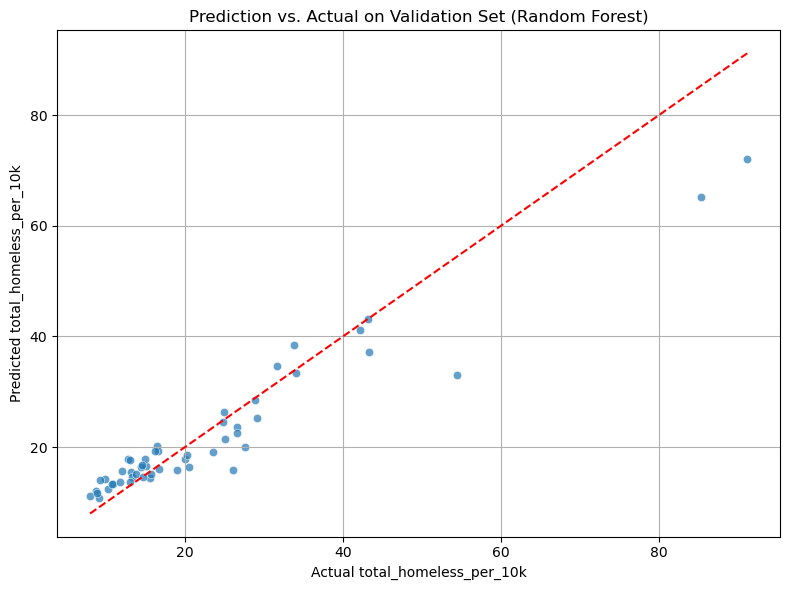

In [34]:
# Creating the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val_task2, y=y_pred_rf_task2, alpha=0.7)

# Adding a reference line
plt.plot([y_val_task2.min(), y_val_task2.max()], [y_val_task2.min(), y_val_task2.max()], color='red', linestyle='--')

# Labeling the plot
plt.xlabel("Actual total_homeless_per_10k")
plt.ylabel("Predicted total_homeless_per_10k")
plt.title("Prediction vs. Actual on Validation Set (Random Forest)")
plt.grid(True)
plt.tight_layout()

plt.show()

Note: the model is underpredicting homelessness rates for the high need areas. This is common in models that are trained on small or skewed datasets. In our case, the dataset is small and is skewed.

#### 2.4.10 Saving the trained random forest model

In [ ]:
# Creating the output directory
output_dir = "./models/"
os.makedirs(output_dir, exist_ok=True)

# Generating a filename with the current date
current_date = datetime.datetime.now().strftime("%Y%m%d")
model_path = os.path.join(output_dir, f"random_forest_model_task2_{current_date}.pkl")

# Saving the model
joblib.dump(model_rf_task2, model_path)

print(f"Model saved to: {model_path}")

Model saved to: ./models/random_forest_model_task2_20250403.pkl


#### 2.4.11 Train XGBoost model

In [25]:
# Initializing and training the model
model_xgb_task2 = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    objective='reg:squarederror'
)

model_xgb_task2.fit(X_train_task2, y_train_task2)

# Extracting feature importances from XGBoost
feature_importances_xgb_task2 = pd.DataFrame({
    "Feature": selected_features_task2,
    "Importance": model_xgb_task2.feature_importances_
})

# Sorting by importance
feature_importances_xgb_task2 = feature_importances_xgb_task2.sort_values(by="Importance", ascending=False)

# Display results
print(feature_importances_xgb_task2)

                                              Feature  Importance
5                                Unsheltered Homeless    0.514484
1                                   SummerTemperature    0.074853
21                         Estimate Total Asian alone    0.060032
24                     Estimate Total  62 to 64 years    0.039452
10  Overall Homeless - Native Hawaiian or Other Pa...    0.032299
22                           Overall Homeless - Asian    0.030900
25     Estimate Total Black or African American alone    0.029964
15                  Estimate Total  85 years and over    0.027364
9                            Sheltered Total Homeless    0.022195
8                   Overall Homeless - Multiple Races    0.021078
14                  SSDI Participation Rate (Percent)    0.019148
16  Overall Homeless - American Indian or Alaska N...    0.018705
23  Total Civilian Noninstitutionalized Population...    0.016100
2                          Median_House_Values_5_year    0.013753
19        

#### 2.4.12 Evaluating the XGBoost model

In [26]:
# Predicting using the validation set
y_pred_xgb_task2 = model_xgb_task2.predict(X_val_task2)

# Computing metrics
r2_xgb_task2 = r2_score(y_val_task2, y_pred_xgb_task2)
rmse_xgb_task2 = np.sqrt(mean_squared_error(y_val_task2, y_pred_xgb_task2))

print(f"XGBoost R² on Validation Set (Task 2): {r2_xgb_task2:.4f}")
print(f"XGBoost RMSE on Validation Set (Task 2): {rmse_xgb_task2:.4f}")

XGBoost R² on Validation Set (Task 2): 0.8862
XGBoost RMSE on Validation Set (Task 2): 5.6428


#### 2.4.13 XGBoost Prediction vs Actual plot for the validation set

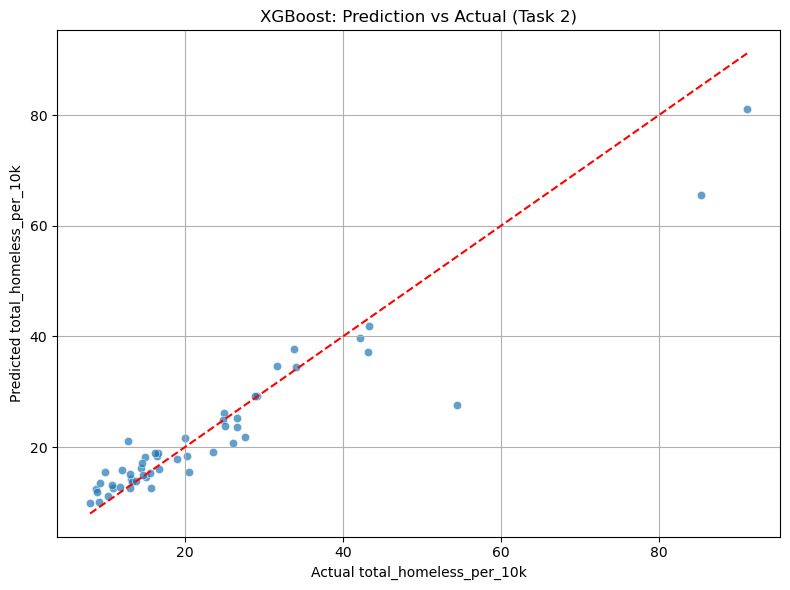

In [27]:
# Creating the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val_task2, y=y_pred_xgb_task2, alpha=0.7)

# Adding a reference line
plt.plot([y_val_task2.min(), y_val_task2.max()],
         [y_val_task2.min(), y_val_task2.max()],
         color='red', linestyle='--')

# Labeling the plot
plt.xlabel("Actual total_homeless_per_10k")
plt.ylabel("Predicted total_homeless_per_10k")
plt.title("XGBoost: Prediction vs Actual (Task 2)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2.4.14 Identifying underestimated high homelessness areas in Task2

##### 2.4.14.1 Predicting using validation set and creating the residual dataframe

In [35]:
# Random Forest
y_pred_rf_task2 = model_rf_task2.predict(X_val_task2)

# XGBoost
y_pred_xgb_task2 = model_xgb_task2.predict(X_val_task2)

# Creating the residual dataframe
df_residuals_task2 = X_val_task2.copy()
df_residuals_task2["actual"] = y_val_task2
df_residuals_task2["pred_rf"] = y_pred_rf_task2
df_residuals_task2["pred_xgb"] = y_pred_xgb_task2

# The Residuals (error)
df_residuals_task2["residual_rf"] = df_residuals_task2["actual"] - df_residuals_task2["pred_rf"]
df_residuals_task2["residual_xgb"] = df_residuals_task2["actual"] - df_residuals_task2["pred_xgb"]

# Adding CoC Number and County
df_residuals_task2["CoC Number"] = val_ids_task2["CoC Number"]
df_residuals_task2["County"] = val_ids_task2["County"]

# Looking at residual dataframe
df_residuals_task2.head()

HPI  SummerTemperature  Median_House_Values_5_year  \
0   362.47               78.8                      135700   
1   233.62               75.2                      147800   
2  1715.62               69.8                      593500   
3   230.59               71.8                      149500   
4   401.22               82.2                      161600   

   Median_House_Values_1_year  Overall Homeless  Unsheltered Homeless  \
0                    148600.0              1426                    79   
1                    149600.0               231                    26   
2                    713600.0              4145                  2397   
3                    147300.0               214                    43   
4                    142200.0              3971                  2020   

   Median_Gross_Rent_5_year  Median_Gross_Rent_1_year  \
0                     960.0                     940.0   
1                     874.0                     871.0   
2                    1673.0                    1838.0   
3                     888.0                     832.0   
4                     988.0                     918.0   

   Overall Homeless - Multiple Races  Sheltered Total Homeless  \
0                                 41                      1347   
1                                  0                       205   
2                                372                      1748   
3                                  0                       171   
4                                  0                      1951   

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                  1              
1                                                  0              
2                                                 30              
3                                                  0              
4                                                  0              

   Median_Rent_1_year  Overall Homeless - Age 18 to 24  Median_Rent_5_year  \
0               700.0                               62                 678   
1               661.0                                0                 627   
2              1535.0                              399                1344   
3               670.0                                0                 658   
4               757.0                                0                 787   

   SSDI Participation Rate (Percent)  Estimate Total  85 years and over  \
0                           3.786207                           0.013711   
1                           2.631752                           0.016635   
2                           1.923411                           0.017668   
3                           2.631752                           0.016921   
4                           4.272722                           0.038049   

   Overall Homeless - American Indian or Alaska Native  \
0                                                  3     
1                                                  0     
2                                                121     
3                                                  0     
4                                                  0     

   Estimate Total Native Hawaiian and Other Pacific Islander alone  \
0                                               0.00                 
1                                               0.00                 
2                                               0.01                 
3                                               0.00                 
4                                               0.00                 

   Estimate Total Some other race alone  JanuaryPrecipitation  \
0                                  0.03                  4.04   
1                                  0.00                  2.68   
2                                  0.10                  9.38   
3                                  0.01                  1.68   
4                                  0.01    

##### 2.4.14.2 Checking for NaNs

In [36]:
# Checkin for NaNs
df_residuals_task2[["actual", "pred_rf", "pred_xgb", "residual_rf", "residual_xgb"]].isna().sum()

actual          0
pred_rf         0
pred_xgb        0
residual_rf     0
residual_xgb    0
dtype: int64

##### 2.4.14.3 Plotting the residuals for random forest

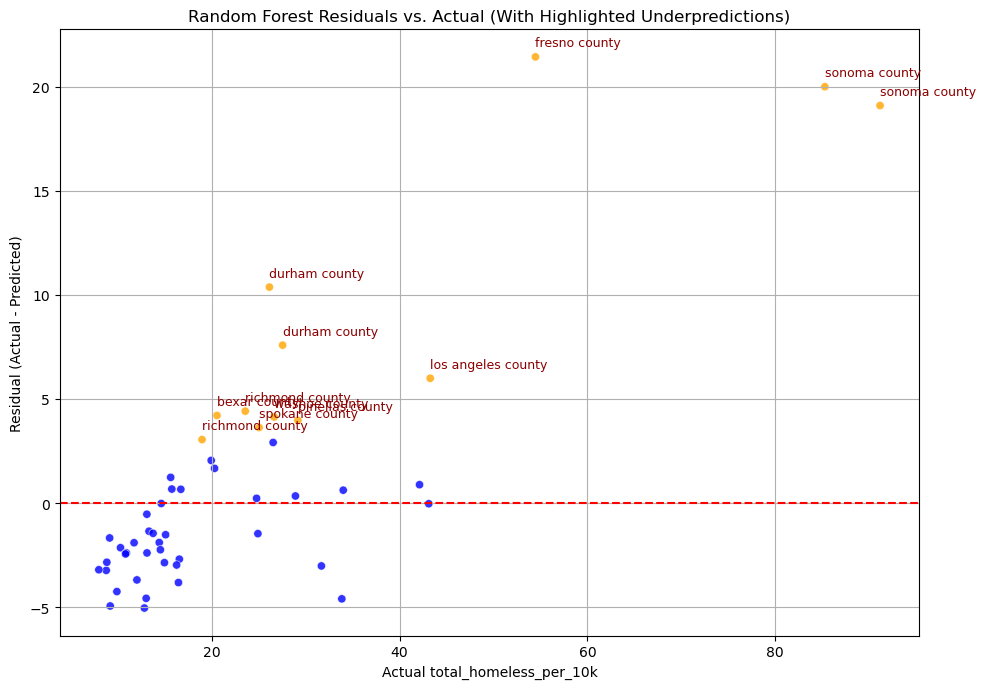

In [43]:
# Plotting Random Forest residuals vs. actual values
plt.figure(figsize=(10, 7))

# Highlighting the points where the model underpredicts significantly
sns.scatterplot(
    x="actual",
    y="residual_rf",
    data=df_residuals_task2,
    hue=df_residuals_task2["residual_rf"] > 3,
    palette={True: "orange", False: "blue"},
    legend=False,
    alpha=0.8
)

# Horizontal line at residual = 0
plt.axhline(y=0, color="red", linestyle="--")

# Adding annotations for the top 6 underpredicted counties
#top3 = df_residuals_task2.sort_values(by="residual_rf").head(6)
underpredicted = df_residuals_task2[df_residuals_task2["residual_rf"] > 3]
for _, row in underpredicted.iterrows():
    plt.text(
        row["actual"],
        row["residual_rf"] + 0.5,
        f"{row['County']}",
        fontsize=9,
        color='darkred'
    )

# Labels and title
plt.title("Random Forest Residuals vs. Actual (With Highlighted Underpredictions)")
plt.xlabel("Actual total_homeless_per_10k")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.4.14.4 Identifying the underestimated high rate area for Random Forest

In [44]:
# Selecting all counties where the residual is greater than 3
underestimated_rf = df_residuals_task2[
    df_residuals_task2["residual_rf"] > 3
].copy()

# Sorting for easier review
underestimated_rf = underestimated_rf.sort_values(by="residual_rf", ascending=False)

# Displaying the most underestimated counties
display(underestimated_rf[["County", "CoC Number", "actual", "pred_rf", "residual_rf"]].head(len(underestimated_rf)))

print(f"Count of Counties that are underestimated: {len(underestimated_rf)}")

County CoC Number     actual    pred_rf  residual_rf
13       fresno county     CA-514  54.459415  33.027561    21.431853
11       sonoma county     CA-504  85.270202  65.270406    19.999796
36       sonoma county     CA-504  91.149566  72.056016    19.093550
7        durham county     NC-502  26.133765  15.759531    10.374233
49       durham county     NC-502  27.541941  19.956573     7.585368
26  los angeles county     CA-600  43.257415  37.262269     5.995146
46     richmond county     GA-504  23.564006  19.148317     4.415690
14        bexar county     TX-500  20.552118  16.345345     4.206773
35       washoe county     NV-501  26.637315  22.502800     4.134515
15     pinellas county     FL-502  29.166413  25.193689     3.972725
39      spokane county     WA-502  25.038351  21.410332     3.628019
24     richmond county     GA-504  18.961278  15.911740     3.049538

Count of Counties that are underestimated: 12


##### 2.4.14.5 Comparing underpredicted and overpredicted for Random Forest

In [45]:
# Adding flags for underprediction and overprediction
df_residuals_task2["underestimated_rf"] = df_residuals_task2["residual_rf"] > 0
df_residuals_task2["overestimated_rf"] = df_residuals_task2["residual_rf"] < 0

# Computing mean residuals
mean_under_rf = df_residuals_task2[df_residuals_task2["underestimated_rf"]]["residual_rf"].mean()
mean_over_rf = df_residuals_task2[df_residuals_task2["overestimated_rf"]]["residual_rf"].mean()

# Display comparison
print(f"Mean residual for underestimated Random Forest counties: {mean_under_rf:.2f}")
print(f"Mean residual for overestimated Random Forest counties: {mean_over_rf:.2f}")

# Displaying how many counties fall into each group
print(f"Underestimated count: {df_residuals_task2['underestimated_rf'].sum()}")
print(f"Overestimated count: {df_residuals_task2['overestimated_rf'].sum()}")

Mean residual for underestimated Random Forest counties: 5.42
Mean residual for overestimated Random Forest counties: -2.59
Underestimated count: 22
Overestimated count: 29


Notes: The model underpredicts the high-rate counties by ~5.4 units on average and overpredicts the lower-rate counties by ~2.6 units on average. The model has a systematic bias:
- In high-homelessness counties:
  - Model predictions are too low
  - Counties like Fresno and Sonoma in California really drive this up
- In low-homelessness counties:
  - Model may be too aggressive

##### 2.14.4.6 Plotting the residual distribution for Random Forest

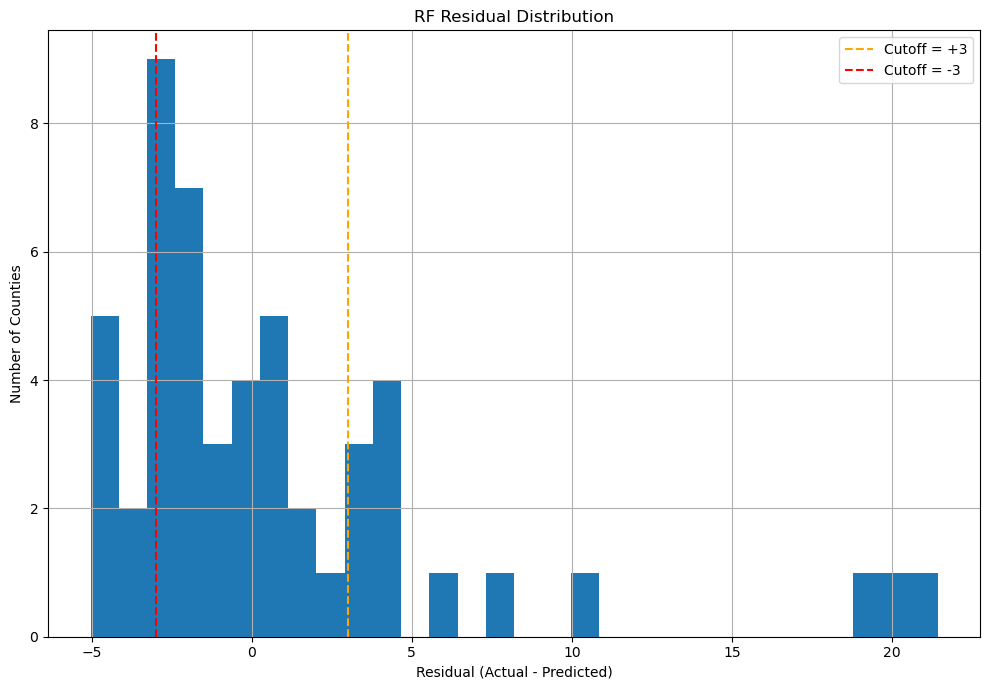

In [46]:
# Plotting Residual distribution for random forest
plt.figure(figsize=(10, 7))

df_residuals_task2["residual_rf"].hist(bins=30)
plt.title("RF Residual Distribution")
plt.axvline(3, color="orange", linestyle="--", label="Cutoff = +3")
plt.axvline(-3, color="red", linestyle="--", label="Cutoff = -3")
plt.legend()
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Number of Counties")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.4.14.7 Plotting the residuals for xgboost

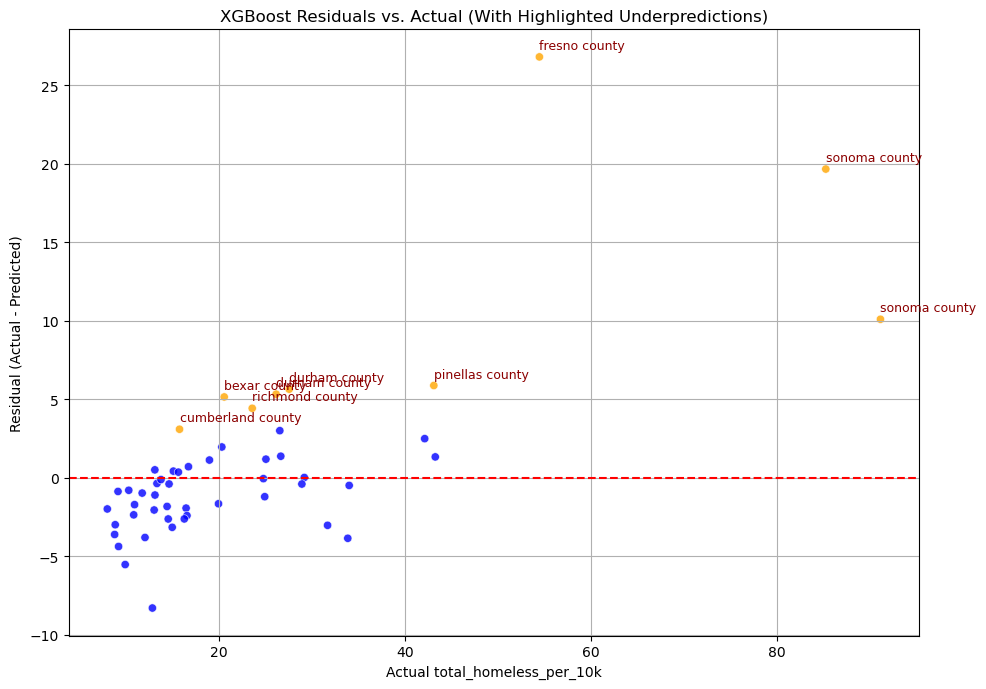

In [37]:
# Plotting XGBoost residuals vs. actual values
plt.figure(figsize=(10, 7))

# Highlighting the points where the model underpredicts significantly (residual_xgb > 3)
sns.scatterplot(
    x="actual",
    y="residual_xgb",
    data=df_residuals_task2,
    hue=df_residuals_task2["residual_xgb"] > 3,
    palette={True: "orange", False: "blue"},
    legend=False,
    alpha=0.8
)

# Horizontal line at residual = 0
plt.axhline(y=0, color="red", linestyle="--")

# Annotate all significantly underpredicted counties (residual_xgb > 3)
underpredicted_xgb = df_residuals_task2[df_residuals_task2["residual_xgb"] > 3]
for _, row in underpredicted_xgb.iterrows():
    plt.text(
        row["actual"],
        row["residual_xgb"] + 0.5,
        f"{row['County']}",
        fontsize=9,
        color='darkred'
    )

# Labels and title
plt.title("XGBoost Residuals vs. Actual (With Highlighted Underpredictions)")
plt.xlabel("Actual total_homeless_per_10k")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.4.14.8 Identifying the underestimated high rate areas for XGBoost

In [40]:
# Selecting all counties where the residual is greater than 3
underestimated_xgb = df_residuals_task2[
    df_residuals_task2["residual_xgb"] > 3
].copy()

# Sorting for easier review
underestimated_xgb = underestimated_xgb.sort_values(by="residual_xgb", ascending=False)

# Displaying the most underestimated counties
display(underestimated_xgb[["County", "CoC Number", "actual", "pred_xgb", "residual_xgb"]].head(len(underestimated_xgb)))

print(f"Count of Counties that are underestimated: {len(underestimated_xgb)}")

County CoC Number     actual   pred_xgb  residual_xgb
13      fresno county     CA-514  54.459415  27.660492     26.798923
11      sonoma county     CA-504  85.270202  65.613892     19.656311
36      sonoma county     CA-504  91.149566  81.059647     10.089920
47    pinellas county     FL-502  43.101249  37.229256      5.871994
49      durham county     NC-502  27.541941  21.902845      5.639096
7       durham county     NC-502  26.133765  20.813879      5.319886
14       bexar county     TX-500  20.552118  15.408708      5.143411
46    richmond county     GA-504  23.564006  19.142954      4.421053
44  cumberland county     NC-511  15.743121  12.656410      3.086711

Count of Counties that are underestimated: 9


##### 2.4.14.9 Comparing underpredicted and overpredicted for XGBoost

In [41]:
# Adding flags for underprediction and overprediction
df_residuals_task2["underestimated_xgb"] = df_residuals_task2["residual_xgb"] > 0
df_residuals_task2["overestimated_xgb"] = df_residuals_task2["residual_xgb"] < 0

# Computing mean residuals
mean_under_xgb = df_residuals_task2[df_residuals_task2["underestimated_xgb"]]["residual_xgb"].mean()
mean_over_xgb = df_residuals_task2[df_residuals_task2["overestimated_xgb"]]["residual_xgb"].mean()

# Display comparison
print(f"Mean residual for underestimated XGBoost counties: {mean_under_xgb:.2f}")
print(f"Mean residual for overestimated XGBoost counties: {mean_over_xgb:.2f}")

# Displaying how many counties fall into each group
print(f"Underestimated count: {df_residuals_task2['underestimated_xgb'].sum()}")
print(f"Overestimated count: {df_residuals_task2['overestimated_xgb'].sum()}")

Mean residual for underestimated XGBoost counties: 4.78
Mean residual for overestimated XGBoost counties: -2.22
Underestimated count: 21
Overestimated count: 30


##### 2.4.14.10 Plotting the residual distribution for XGBoost

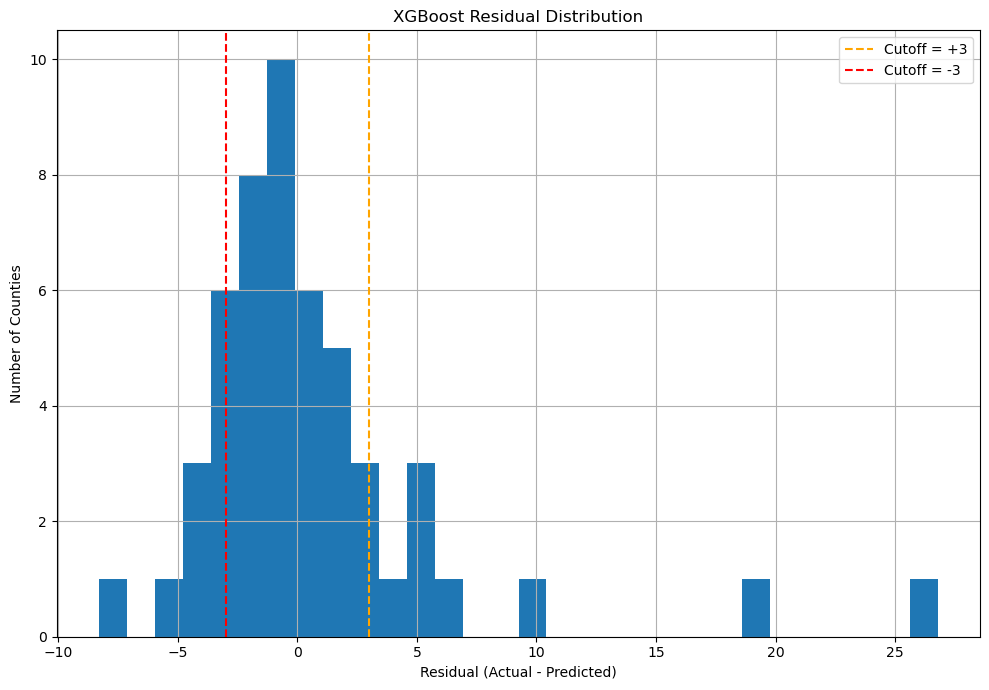

In [42]:
# Plotting Residual distribution for XGBoost
plt.figure(figsize=(10, 7))

df_residuals_task2["residual_xgb"].hist(bins=30)
plt.title("XGBoost Residual Distribution")
plt.axvline(3, color="orange", linestyle="--", label="Cutoff = +3")
plt.axvline(-3, color="red", linestyle="--", label="Cutoff = -3")
plt.legend()
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Number of Counties")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.4.14.11 Side by side plot of Residual vs Actual

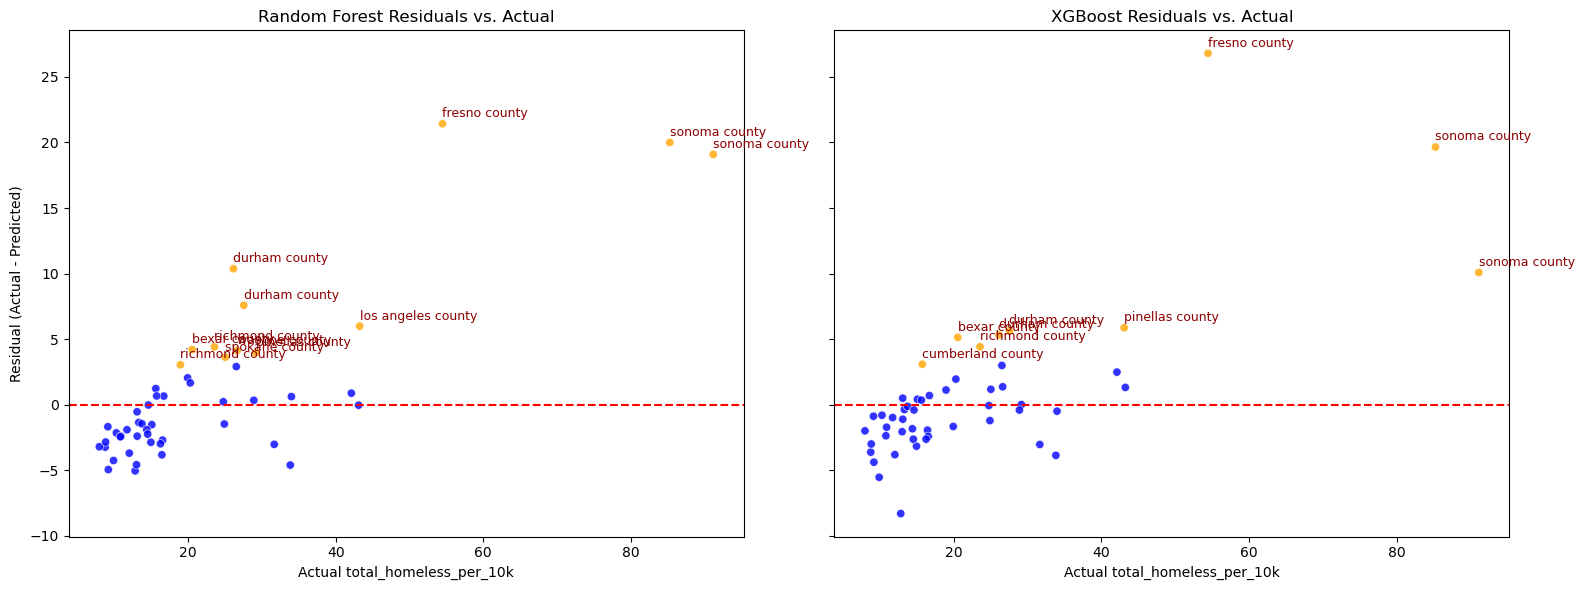

In [47]:
# Setting up for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# === 1. RANDOM FOREST ===
sns.scatterplot(
    ax=axes[0],
    x="actual",
    y="residual_rf",
    data=df_residuals_task2,
    hue=df_residuals_task2["residual_rf"] > 3,
    palette={True: "orange", False: "blue"},
    legend=False,
    alpha=0.8
)
axes[0].axhline(0, color="red", linestyle="--")
axes[0].set_title("Random Forest Residuals vs. Actual")
axes[0].set_xlabel("Actual total_homeless_per_10k")
axes[0].set_ylabel("Residual (Actual - Predicted)")

# Displaying RF underpredicted counties
for _, row in df_residuals_task2[df_residuals_task2["residual_rf"] > 3].iterrows():
    axes[0].text(row["actual"], row["residual_rf"] + 0.5, row["County"], fontsize=9, color="darkred")

# === 2. XGBOOST ===
sns.scatterplot(
    ax=axes[1],
    x="actual",
    y="residual_xgb",
    data=df_residuals_task2,
    hue=df_residuals_task2["residual_xgb"] > 3,
    palette={True: "orange", False: "blue"},
    legend=False,
    alpha=0.8
)
axes[1].axhline(0, color="red", linestyle="--")
axes[1].set_title("XGBoost Residuals vs. Actual")
axes[1].set_xlabel("Actual total_homeless_per_10k")
axes[1].set_ylabel("")  # No y-label on right side

# Displaying XGB underpredicted counties
for _, row in df_residuals_task2[df_residuals_task2["residual_xgb"] > 3].iterrows():
    axes[1].text(row["actual"], row["residual_xgb"] + 0.5, row["County"], fontsize=9, color="darkred")

plt.tight_layout()
plt.show()

<a id="section-2_5"></a>
### 2.5 Temporal splitting of the dataset and analysis

#### 2.5.1 Cross-sectional temporal splitting of the data into training, validation and testing

In [14]:
def cross_sectional_temporal_split(
    df,
    selected_features,
    target_column,
    year_column="Year",
    id_columns=["CoC Number", "County", "Year"],
    train_year_max=2016,
    val_year=2017,
    test_year_min=2018,
    random_state=42
):
    """
    Perform a cross-sectional split based on counties and apply temporal filtering.

    Parameters:
        df (pd.DataFrame): Full dataset.
        selected_features (list): List of feature column names.
        target_column (str): Target column name.
        year_column (str): Name of the year column (default: "Year").
        id_columns (list): Columns to keep as identifiers (default: CoC Number, County, Year).
        train_year_max (int): Max year for training data (inclusive).
        val_year (int): Year for validation data.
        test_year_min (int): Min year for testing data (inclusive).
        random_state (int): Random seed for reproducibility.

    Returns:
        dict: Dictionary containing splits: X_train, y_train, ids_train, etc.
    """

    # Sorting for consistency
    df = df.sort_values(by=["CoC Number", year_column]).reset_index(drop=True)

    # Extracting identifiers, features, target
    ids_df = df[id_columns].reset_index(drop=True)
    X = df[selected_features].reset_index(drop=True)
    y = df[target_column].reset_index(drop=True)

    # Cross-sectional split on counties
    all_cocs = ids_df["CoC Number"].unique()
    train_cocs, temp_cocs = train_test_split(all_cocs, test_size=0.4, random_state=random_state)
    val_cocs, test_cocs = train_test_split(temp_cocs, test_size=0.5, random_state=random_state)

    # Filtering helper
    def subset(data, ids, cocs, year_cond):
        mask = ids["CoC Number"].isin(cocs) & year_cond
        return data[mask].reset_index(drop=True), y[mask].reset_index(drop=True), ids[mask].reset_index(drop=True)

    # Applying the temporal filters
    train_year_cond = ids_df[year_column] <= train_year_max
    val_year_cond = ids_df[year_column] == val_year
    test_year_cond = ids_df[year_column] >= test_year_min

    X_train, y_train, ids_train = subset(X, ids_df, train_cocs, train_year_cond)
    X_val, y_val, ids_val = subset(X, ids_df, val_cocs, val_year_cond)
    X_test, y_test, ids_test = subset(X, ids_df, test_cocs, test_year_cond)

    # Returning all splits
    return {
        "X_train": X_train, "y_train": y_train, "ids_train": ids_train,
        "X_val": X_val, "y_val": y_val, "ids_val": ids_val,
        "X_test": X_test, "y_test": y_test, "ids_test": ids_test
    }

In [15]:
# Loading the dataset
model_file_path = "./data/df_model_task2_20250429.csv"
df_model_task2_temporal = pd.read_csv(model_file_path)

# Running cross-sectional temporal split
splits_task2_temporal = cross_sectional_temporal_split(
    df=df_model_task2_temporal,
    selected_features=selected_features_task2,
    target_column=target_task2
)

# Unpack with task2_temporal naming convention
X_train_task2_temporal = splits_task2_temporal["X_train"]
y_train_task2_temporal = splits_task2_temporal["y_train"]
ids_train_task2_temporal = splits_task2_temporal["ids_train"]

X_val_task2_temporal = splits_task2_temporal["X_val"]
y_val_task2_temporal = splits_task2_temporal["y_val"]
val_ids_task2_temporal = splits_task2_temporal["ids_val"]

X_test_task2_temporal = splits_task2_temporal["X_test"]
y_test_task2_temporal = splits_task2_temporal["y_test"]
test_ids_task2_temporal = splits_task2_temporal["ids_test"]

# Display split sizes
print(f"Training set: {X_train_task2_temporal.shape[0]} rows")
print(f"Validation set: {X_val_task2_temporal.shape[0]} rows")
print(f"Testing set: {X_test_task2_temporal.shape[0]} rows")

# Year distributions
print("Train years:", ids_train_task2_temporal["Year"].unique())
print("Val years:", val_ids_task2_temporal["Year"].unique())
print("Test years:", test_ids_task2_temporal["Year"].unique())

# Unique counties per split
print("Train counties:", ids_train_task2_temporal["CoC Number"].nunique())
print("Val counties:", val_ids_task2_temporal["CoC Number"].nunique())
print("Test counties:", test_ids_task2_temporal["CoC Number"].nunique())


Training set: 154 rows
Validation set: 8 rows
Testing set: 8 rows
Train years: [2010 2011 2012 2013 2014 2015 2016]
Val years: [2017]
Test years: [2018]
Train counties: 22
Val counties: 8
Test counties: 8


#### 2.5.2 Temporal splitting of the data into training, validation and testing

In [12]:
# Loading the updated model file with Year column included
model_file_path = "./data/df_model_task2_20250429.csv"
df_model_task2_temporal = pd.read_csv(model_file_path)

# Sorting data by CoC Number and Year
df_model_task2_temporal.sort_values(by=["CoC Number", "Year"], inplace=True)

# Defining ID columns, features, and target
df_model_task2_ids_temporal = df_model_task2_temporal[["CoC Number", "County", "Year"]]
X_task2_temporal = df_model_task2_temporal[selected_features_task2]
y_task2_temporal = df_model_task2_temporal[target_task2]

# Resetting index
X_task2_temporal = X_task2_temporal.reset_index(drop=True)
y_task2_temporal = y_task2_temporal.reset_index(drop=True)
df_model_task2_ids_temporal = df_model_task2_ids_temporal.reset_index(drop=True)

# Temporal masks
years_temporal = df_model_task2_ids_temporal["Year"]
train_mask_temporal = years_temporal <= 2016
val_mask_temporal = years_temporal == 2017
test_mask_temporal = years_temporal >= 2018

# Applying masks
X_train_task2_temporal = X_task2_temporal[train_mask_temporal]
y_train_task2_temporal = y_task2_temporal[train_mask_temporal]
ids_train_task2_temporal = df_model_task2_ids_temporal[train_mask_temporal]

X_val_task2_temporal = X_task2_temporal[val_mask_temporal]
y_val_task2_temporal = y_task2_temporal[val_mask_temporal]
val_ids_task2_temporal = df_model_task2_ids_temporal[val_mask_temporal]

X_test_task2_temporal = X_task2_temporal[test_mask_temporal]
y_test_task2_temporal = y_task2_temporal[test_mask_temporal]
test_ids_task2_temporal = df_model_task2_ids_temporal[test_mask_temporal]

# Resetting indices
X_val_task2_temporal = X_val_task2_temporal.reset_index(drop=True)
y_val_task2_temporal = y_val_task2_temporal.reset_index(drop=True)
val_ids_task2_temporal = val_ids_task2_temporal.reset_index(drop=True)

X_test_task2_temporal = X_test_task2_temporal.reset_index(drop=True)
y_test_task2_temporal = y_test_task2_temporal.reset_index(drop=True)
test_ids_task2_temporal = test_ids_task2_temporal.reset_index(drop=True)

# Displaying sizes
print(f"Training set: {X_train_task2_temporal.shape[0]} rows")
print(f"Validation set: {X_val_task2_temporal.shape[0]} rows")
print(f"Testing set: {X_test_task2_temporal.shape[0]} rows")

# Year distributions
print("Train years:", years_temporal[train_mask_temporal].unique())
print("Val years:", years_temporal[val_mask_temporal].unique())
print("Test years:", years_temporal[test_mask_temporal].unique())

# Unique counties in each split
print("Train counties:", ids_train_task2_temporal["CoC Number"].nunique())
print("Val counties:", val_ids_task2_temporal["CoC Number"].nunique())
print("Test counties:", test_ids_task2_temporal["CoC Number"].nunique())

Training set: 266 rows
Validation set: 38 rows
Testing set: 38 rows
Train years: [2010 2011 2012 2013 2014 2015 2016]
Val years: [2017]
Test years: [2018]
Train counties: 38
Val counties: 38
Test counties: 38


#### 2.5.3 Checking for NaNs in Training, Validation and Test

In [17]:
def check_missing_in_splits(splits_dict):
    for name, df in splits_dict.items():
        n_missing = df.isna().sum().sum()
        print(f"{name}: {n_missing} missing values")

In [18]:
# Checking for missing values in each split
check_missing_in_splits({
    "X_train": X_train_task2_temporal,
    "X_val": X_val_task2_temporal,
    "X_test": X_test_task2_temporal,
    "y_train": y_train_task2_temporal,
    "y_val": y_val_task2_temporal,
    "y_test": y_test_task2_temporal,
})

X_train: 0 missing values
X_val: 0 missing values
X_test: 0 missing values
y_train: 0 missing values
y_val: 0 missing values
y_test: 0 missing values


#### 2.5.4 Train a regression model

In [19]:
# Initializing and fitting the OLS model using the temporal cross-sectional training data
model_ols_task2_temporal = LinearRegression()
model_ols_task2_temporal.fit(X_train_task2_temporal, y_train_task2_temporal)

# Displaying the coefficients
coefficients_task2_temporal = pd.DataFrame({
    "Feature": selected_features_task2,
    "Coefficient": model_ols_task2_temporal.coef_
})

print(coefficients_task2_temporal.sort_values(by="Coefficient", ascending=False))

                                              Feature   Coefficient
15                  Estimate Total  85 years and over  3.019377e+02
20                   Estimate Total Two or more races  1.862896e+02
25     Estimate Total Black or African American alone  2.673146e+01
18               Estimate Total Some other race alone  1.215187e+01
17  Estimate Total Native Hawaiian and Other Pacif...  6.164847e+00
0                                                 HPI  4.578611e-02
8                   Overall Homeless - Multiple Races  1.077810e-02
6                            Median_Gross_Rent_5_year  7.836126e-03
5                                Unsheltered Homeless  3.236002e-03
16  Overall Homeless - American Indian or Alaska N...  2.718535e-03
4                                    Overall Homeless  2.073868e-03
2                          Median_House_Values_5_year  2.836233e-05
23  Total Civilian Noninstitutionalized Population... -3.275021e-07
3                          Median_House_Values_1

#### 2.5.5 Evaluating the regression model

In [20]:
# Predicting using the cross-sectional temporal validation set
y_pred_ols_task2_temporal = model_ols_task2_temporal.predict(X_val_task2_temporal)

# Computing the evaluation metrics
r2_ols_task2_temporal = r2_score(y_val_task2_temporal, y_pred_ols_task2_temporal)
rmse_ols_task2_temporal = np.sqrt(mean_squared_error(y_val_task2_temporal, y_pred_ols_task2_temporal))

# Displaying results
print(f"R² Score on Validation Set: {r2_ols_task2_temporal:.4f}")
print(f"Root Mean Squared Error (RMSE) on Validation Set: {rmse_ols_task2_temporal:.4f}")

R² Score on Validation Set: 0.4531
Root Mean Squared Error (RMSE) on Validation Set: 11.2505


#### 2.5.6 Predicted vs Actual plot for validation set

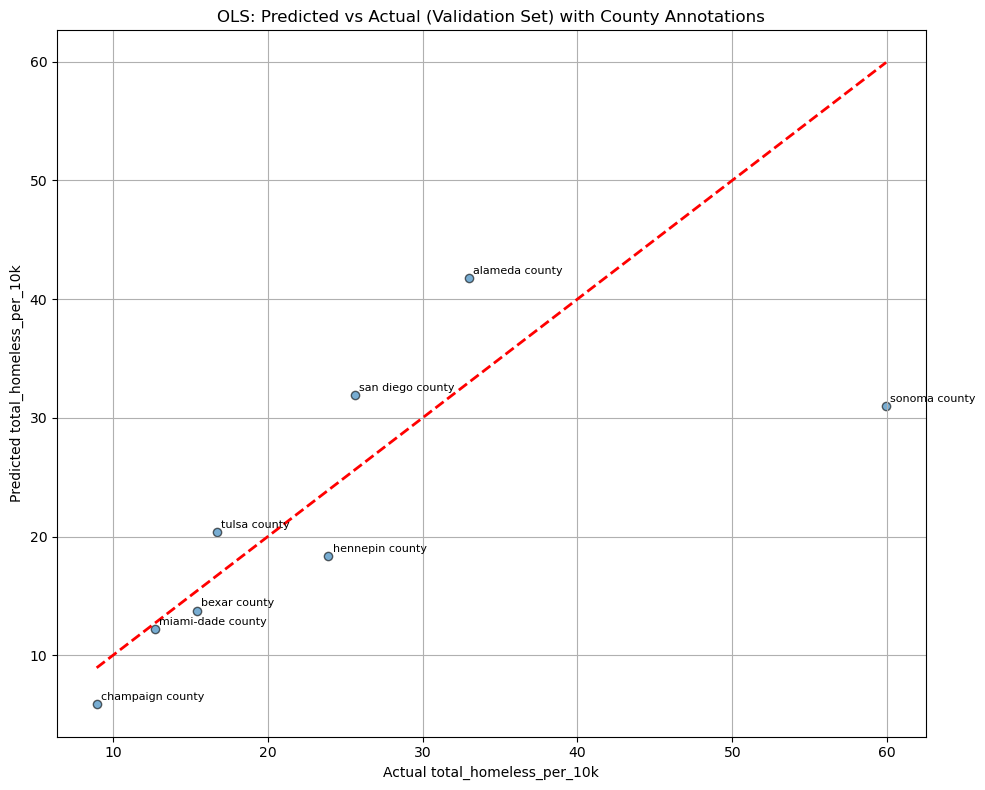

In [28]:
# Creating the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_val_task2_temporal, y_pred_ols_task2_temporal, alpha=0.6, edgecolors='k')

# Reference line
plt.plot(
    [y_val_task2_temporal.min(), y_val_task2_temporal.max()],
    [y_val_task2_temporal.min(), y_val_task2_temporal.max()],
    color='red', linestyle='--', linewidth=2
)

# Adding annotations for counties
for i, county in enumerate(val_ids_task2_temporal["County"]):
    plt.annotate(county, (y_val_task2_temporal.iloc[i], y_pred_ols_task2_temporal[i]),
                 textcoords="offset points", xytext=(3, 3), ha='left', fontsize=8)

# Labels and title
plt.xlabel("Actual total_homeless_per_10k")
plt.ylabel("Predicted total_homeless_per_10k")
plt.title("OLS: Predicted vs Actual (Validation Set) with County Annotations")
plt.grid(True)
plt.tight_layout()
plt.show()

Notes: this model has moderate predictive power and a reasonable baseline performance.
- the model explains ~45.3% of the variance in total_homeless_per_10k across the validation set.
- however, ~54.7% of the variation is still unexplained.
- RMSE = 11.25 which means the model's prediction is off by 11.25 homeless individuals per 10k population

#### 2.5.7 Saving the OLS Regression Model

In [23]:
# Creating the output directory
output_dir = "./models/"
os.makedirs(output_dir, exist_ok=True)

# Generating filename with current date
current_date = datetime.datetime.now().strftime("%Y%m%d")
model_path = os.path.join(output_dir, f"ols_model_task2_temporal_{current_date}.pkl")

# Saving the OLS model
joblib.dump(model_ols_task2_temporal, model_path)

print(f"OLS model saved to: {model_path}")

OLS model saved to: ./models/ols_model_task2_temporal_20250430.pkl


#### 2.5.8 Train Random Forest model

In [ ]:
# Defining the Random Forest model
rf_model_task2_temporal = RandomForestRegressor(random_state=42)

# Defining hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf_model_task2_temporal,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

# Fitting the model
random_search.fit(X_train_task2_temporal, y_train_task2_temporal)

# The best model
best_rf_model_task2_temporal = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

# Displaying feature importances
importances = best_rf_model_task2_temporal.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": selected_features_task2,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop Feature Importances:")
print(feature_importance_df)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}

Top Feature Importances:
                                              Feature  Importance
5                                Unsheltered Homeless    0.176663
1                                   SummerTemperature    0.129085
4                                    Overall Homeless    0.112712
0                                                 HPI    0.097235
20                   Estimate Total Two or more races    0.053959
21                         Estimate Total Asian alone    0.052894
2                          Median_House_Values_5_year    0.049659
3                          Median_House_Values_1_year    0.041184
9                            Sheltered Total Homeless    0.038391
7                            Median_Gross_Rent_1_year    0.029368
19                               Janua

#### 2.5.9 Evaluating the Random Forest Model

In [26]:
# Evaluating Random Forest model on validation set
y_pred_rf_val_task2_temporal = best_rf_model_task2_temporal.predict(X_val_task2_temporal)

r2_rf_val_task2_temporal = r2_score(y_val_task2_temporal, y_pred_rf_val_task2_temporal)
rmse_rf_val_task2_temporal = np.sqrt(mean_squared_error(y_val_task2_temporal, y_pred_rf_val_task2_temporal))

print(f"\n[Random Forest on Validation Set]")
print(f"R² Score: {r2_rf_val_task2_temporal:.4f}")
print(f"RMSE: {rmse_rf_val_task2_temporal:.4f}")


[Random Forest on Validation Set]
R² Score: 0.3274
RMSE: 12.4772


#### 2.5.10 Predicted vs Actual plot for validation set

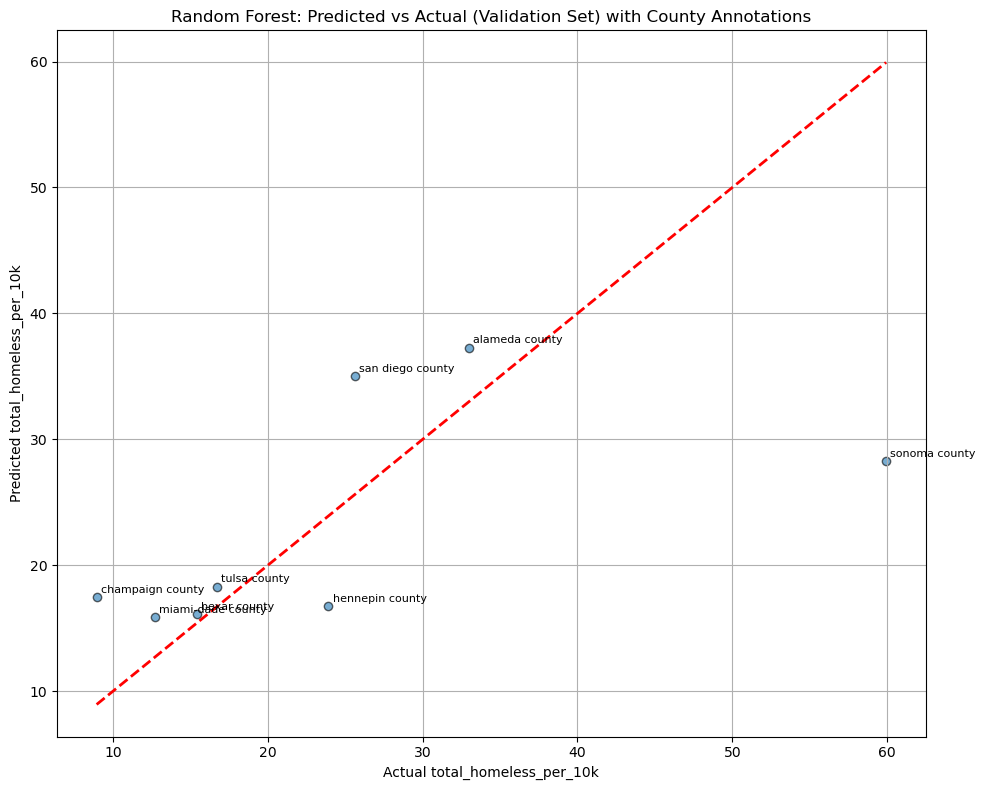

In [27]:
# Creating scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_val_task2_temporal, y_pred_rf_val_task2_temporal, alpha=0.6, edgecolors='k')

# Reference line
plt.plot([y_val_task2_temporal.min(), y_val_task2_temporal.max()],
         [y_val_task2_temporal.min(), y_val_task2_temporal.max()],
         color='red', linestyle='--', linewidth=2)

# Annotating the counties
for i, county in enumerate(val_ids_task2_temporal["County"]):
    plt.annotate(county, 
                 (y_val_task2_temporal.iloc[i], y_pred_rf_val_task2_temporal[i]),
                 textcoords="offset points", xytext=(3, 3), ha='left', fontsize=8)

# Labels and title
plt.xlabel("Actual total_homeless_per_10k")
plt.ylabel("Predicted total_homeless_per_10k")
plt.title("Random Forest: Predicted vs Actual (Validation Set) with County Annotations")
plt.grid(True)
plt.tight_layout()
plt.show()

Notes: the OLS model outperforms the Random Forest on both R² and RMSE. The Random Forest model struggles to generalize across the diversity of counties.
- the model explains ~32.7% of the variance in total_homeless_per_10k across the validation set. The Random Forest model struggles more to generalize to unseen counties.
- RMSE = 12.48 which means the model's prediction is off by 12.48 homeless individuals per 10k population
- Sonoma County is underpredicted significantly. The model fails to capture something structural or unique about Sonoma's homelessness rate.

#### 2.5.11 Saving the Random Forest model

In [29]:
# Creating the output directory
output_dir = "./models/"
os.makedirs(output_dir, exist_ok=True)

# Generating the filename with current date
current_date = datetime.datetime.now().strftime("%Y%m%d")
model_path = os.path.join(output_dir, f"random_forest_model_task2_temporal_{current_date}.pkl")

# Saving the Random Forest model
joblib.dump(best_rf_model_task2_temporal, model_path)

print(f"Random Forest model saved to: {model_path}")

Random Forest model saved to: ./models/random_forest_model_task2_temporal_20250501.pkl


#### 2.5.12 Train XGBoost model

In [30]:
# Defining XGBoost Model
xgb_model_task2_temporal = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Defining parameter grid
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_lambda': [0.5, 1.0, 2.0],
    'reg_alpha': [0, 0.1, 0.5]
}

# Randomized search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model_task2_temporal,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

# Fitting the model
random_search_xgb.fit(X_train_task2_temporal, y_train_task2_temporal)

# Getting best model and feature importance
best_xgb_model_task2_temporal = random_search_xgb.best_estimator_
print("Best parameters:", random_search_xgb.best_params_)

# Feature importance
importances_xgb = best_xgb_model_task2_temporal.feature_importances_
feature_importance_df_xgb = pd.DataFrame({
    "Feature": selected_features_task2,
    "Importance": importances_xgb
}).sort_values(by="Importance", ascending=False)

print("\nTop Feature Importances (XGBoost):")
print(feature_importance_df_xgb)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.7, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

Top Feature Importances (XGBoost):
                                              Feature  Importance
5                                Unsheltered Homeless    0.200380
4                                    Overall Homeless    0.112221
9                            Sheltered Total Homeless    0.071905
1                                   SummerTemperature    0.065512
0                                                 HPI    0.064937
20                   Estimate Total Two or more races    0.048268
21                         Estimate Total Asian alone    0.044129
19                               JanuaryPrecipitation    0.039376
10  Overall Homeless - Native Hawaiian or Other Pa...    0.036946
18               Estimate Total Some other race alone    0.033245
26                 

#### 2.5.13 Evaluating the XGBoost model

In [31]:
# Evaluating on the validation set
y_pred_xgb_val_task2_temporal = best_xgb_model_task2_temporal.predict(X_val_task2_temporal)

r2_xgb_val_task2_temporal = r2_score(y_val_task2_temporal, y_pred_xgb_val_task2_temporal)
rmse_xgb_val_task2_temporal = np.sqrt(mean_squared_error(y_val_task2_temporal, y_pred_xgb_val_task2_temporal))

print(f"\n[XGBoost on Validation Set]")
print(f"R² Score: {r2_xgb_val_task2_temporal:.4f}")
print(f"RMSE: {rmse_xgb_val_task2_temporal:.4f}")


[XGBoost on Validation Set]
R² Score: 0.3581
RMSE: 12.1888


#### 2.5.14 Predicted vs Actual plot for validation set

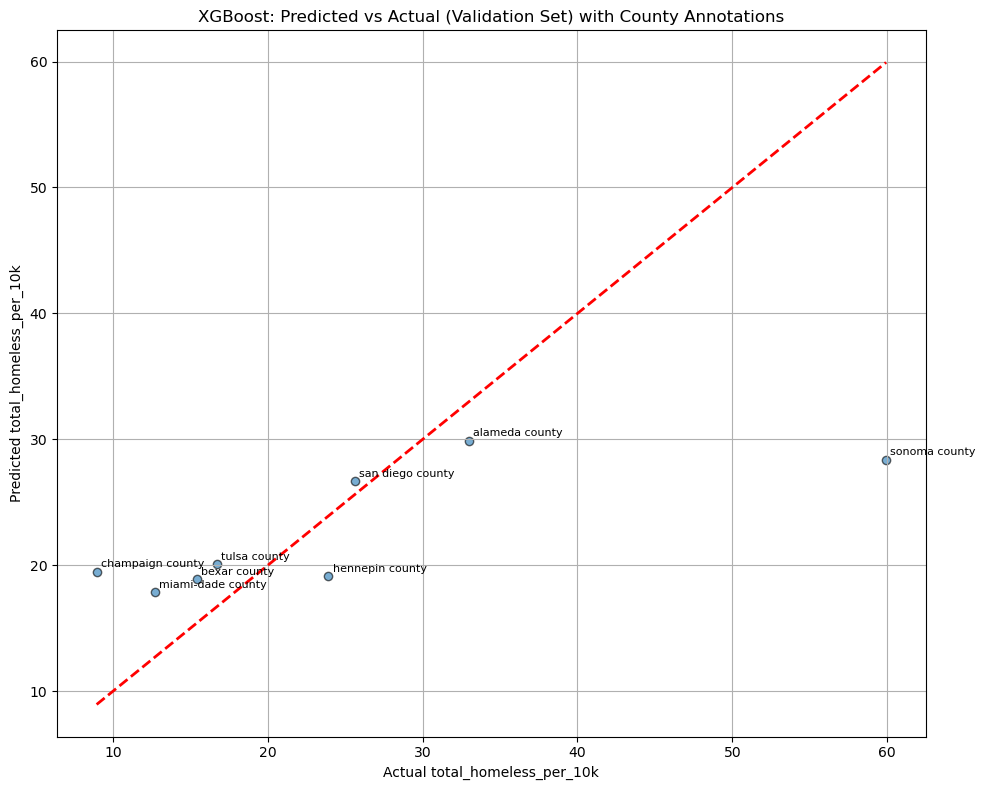

In [32]:
# Creating the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_val_task2_temporal, y_pred_xgb_val_task2_temporal, alpha=0.6, edgecolors='k')

# Adding reference line
plt.plot(
    [y_val_task2_temporal.min(), y_val_task2_temporal.max()],
    [y_val_task2_temporal.min(), y_val_task2_temporal.max()],
    color='red', linestyle='--', linewidth=2
)

# Annotating each point with the corresponding county
for i, county in enumerate(val_ids_task2_temporal["County"]):
    plt.annotate(county,
                 (y_val_task2_temporal.iloc[i], y_pred_xgb_val_task2_temporal[i]),
                 textcoords="offset points", xytext=(3, 3), ha='left', fontsize=8)

# Labels and title
plt.xlabel("Actual total_homeless_per_10k")
plt.ylabel("Predicted total_homeless_per_10k")
plt.title("XGBoost: Predicted vs Actual (Validation Set) with County Annotations")
plt.grid(True)
plt.tight_layout()
plt.show()

Notes: the XGBoost model generalizes better than the Random Forest but still struggles to generalize across the diversity of counties.
- the model explains ~35.8% of the variance in total_homeless_per_10k across the validation set. XGBoost is better than Random Forest but still worse than OLS.
- RMSE = 12.19 which means the model's prediction is off by 12.19 homeless individuals per 10k population. This error magnitude is still substantial.
- Sonoma County is again strongly underpredicted. The model fails to capture something structural or unique about Sonoma's homelessness rate.
- It is possible that all models are lacking key temporal or county features.

#### 2.5.15 Saving the XGBoost model

In [33]:
# Creating the output directory
output_dir = "./models/"
os.makedirs(output_dir, exist_ok=True)

# Generating the filename with current date
current_date = datetime.datetime.now().strftime("%Y%m%d")
model_path = os.path.join(output_dir, f"xgboost_model_task2_temporal_{current_date}.pkl")

# Saving the XGBoost model
joblib.dump(best_xgb_model_task2_temporal, model_path)

print(f"XGBoost model saved to: {model_path}")

XGBoost model saved to: ./models/xgboost_model_task2_temporal_20250501.pkl


<a id="section-3"></a>
## Section 3 - Models to predict annual homelessness rates using the percentage change in total_homeless_per_10k

<a id="section-3_1"></a>
### 3.1 Loading the full dataset into a dataframe

In [3]:
current_date = datetime.datetime.now().strftime("%m_%d_%Y")

# Loading the full dataset
file_path = "./data/homeless_dataset_full.csv"
df_homeless_full = pd.read_csv(file_path, encoding="utf-8")

# Displaying a sample to verify
df_homeless_full.sample(5, random_state=45)

CoC Number               County  Year  Overall Homeless  \
846     OK-501         tulsa county  2013              1008   
611     NJ-501        bergen county  2012               454   
924     PA-506         berks county  2010               513   
418     MD-503  anne arundel county  2011               382   
729     NV-500         clark county  2013              5952   

     Sheltered Total Homeless  Unsheltered Homeless  \
846                       886                   122   
611                       422                    32   
924                       500                    13   
418                       312                    70   
729                      2920                  3032   

     Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
846                            0                                0   
611                            0                                0   
924                            0                                0   
418                            0                                0   
729                            0                                0   

     Overall Homeless - Over 24  Overall Homeless - Female  \
846                           0                          0   
611                           0                          0   
924                           0                          0   
418                           0                          0   
729                           0                          0   

     Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
846                        0                                   0   
611                        0                                   0   
924                        0                                   0   
418                        0                                   0   
729                        0                                   0   

     Overall Homeless - White  \
846                         0   
611                         0   
924                         0   
418                         0   
729                         0   

     Overall Homeless - Black, African American, or African  \
846                                                  0        
611                                                  0        
924                                                  0        
418                                                  0        
729                                                  0        

     Overall Homeless - Asian or Asian American  \
846                                           0   
611                                           0   
924                                           0   
418                                           0   
729                                           0   

     Overall Homeless - American Indian, Alaska Native, or Indigenous  \
846                                                  0                  
611                                                  0                  
924                                                  0                  
418                                                  0                  
729                                                  0                  

     Overall Homeless - Native Hawaiian or Other Pacific Islander  \
846                                                  0              
611                                                  0              
924                                                  0              
418                                                  0              
729                                                  0              

     Overall Homeless - Multiple Races  \
846                                  0   
611                                  0   
924                                  0   
418                                  0   
729                                  0   

     Overall Homeless - Black or African American  Overall Homeless - Asian  \
846                       

<a id="section-3_2"></a>
### 3.2 Filtering for Major City and Largely Urban CoCs task3 model

In [4]:
# Filtering for Major City and Largely Urban CoC Categories
df_filtered_task3 = df_homeless_full[df_homeless_full["CoC Category"].isin(["Major City CoC", "Other Largely Urban CoC"])].copy()

# Displaying 5 random rows
df_filtered_task3.sample(5, random_state=45)

CoC Number           County  Year  Overall Homeless  \
324      GA-504  richmond county  2016               287   
808      OH-503  franklin county  2011              1418   
1097     WA-500      king county  2011              8972   
38       CA-502   alameda county  2012              4257   
61       CA-504    sonoma county  2017              2835   

      Sheltered Total Homeless  Unsheltered Homeless  \
324                        266                    21   
808                       1274                   144   
1097                      6480                  2492   
38                        2045                  2212   
61                         988                  1847   

      Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
324                            56                               15   
808                             0                                0   
1097                            0                                0   
38                              0                                0   
61                            297                              431   

      Overall Homeless - Over 24  Overall Homeless - Female  \
324                          216                        118   
808                            0                          0   
1097                           0                          0   
38                             0                          0   
61                          2107                        855   

      Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
324                       169                                   5   
808                         0                                   0   
1097                        0                                   0   
38                          0                                   0   
61                       1968                                 697   

      Overall Homeless - White  \
324                         80   
808                          0   
1097                         0   
38                           0   
61                        1990   

      Overall Homeless - Black, African American, or African  \
324                                                   0        
808                                                   0        
1097                                                  0        
38                                                    0        
61                                                    0        

      Overall Homeless - Asian or Asian American  \
324                                            0   
808                                            0   
1097                                           0   
38                                             0   
61                                             0   

      Overall Homeless - American Indian, Alaska Native, or Indigenous  \
324                                                   0                  
808                                                   0                  
1097                                                  0                  
38                                                    0                  
61                                                    0                  

      Overall Homeless - Native Hawaiian or Other Pacific Islander  \
324                                                   0              
808                                                   0              
1097                                                  0              
38                                                    0              
61                                                   28              

      Overall Homeless - Multiple Races  \
324                                   9   
808                                   0   
1097                                  0   
38                                    0   
61                                  396   

      Overall Homeless - Black or African American  Overall Home

<a id="section-3_3"></a>
### 3.3 Sorting by CoC and year

In [5]:
# Sorting by CoC Number and Year in preparation for percent change calculation
df_filtered_task3.sort_values(by=["CoC Number", "Year"], inplace=True)

# Displaying 5 rows
df_filtered_task3.head()

CoC Number         County  Year  Overall Homeless  Sheltered Total Homeless  \
0     AL-501  mobile county  2010               883                       482   
1     AL-501  mobile county  2011               718                       407   
2     AL-501  mobile county  2012               634                       324   
3     AL-501  mobile county  2013               493                       260   
4     AL-501  mobile county  2014               598                       461   

   Unsheltered Homeless  Overall Homeless - Under 18  \
0                   401                            0   
1                   311                            0   
2                   310                            0   
3                   233                            0   
4                   137                          126   

   Overall Homeless - Age 18 to 24  Overall Homeless - Over 24  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                               44                         428   

   Overall Homeless - Female  Overall Homeless - Male  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Overall Homeless - Hispanic/Latino  Overall Homeless - White  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   

   Overall Homeless - Black, African American, or African  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Overall Homeless - Asian or Asian American  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Overall Homeless - American Indian, Alaska Native, or Indigenous  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Overall Homeless - Multiple Races  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Overall Homeless - Black or African American  Overall Homeless - Asian  \
0                                             0                         0   
1                                             0                         0   
2                                             0                        

<a id="section-3_4"></a>
### 3.4 Calculating the percentage change in total_homeless_per_10k

In [6]:
# Calculating the percentage change in total_homeless_per_10k
df_filtered_task3["pct_change_total_homeless_per_10k"] = (df_filtered_task3.groupby("CoC Number")["total_homeless_per_10k"].pct_change())

# Displaying 5 rows
df_filtered_task3.head()

CoC Number         County  Year  Overall Homeless  Sheltered Total Homeless  \
0     AL-501  mobile county  2010               883                       482   
1     AL-501  mobile county  2011               718                       407   
2     AL-501  mobile county  2012               634                       324   
3     AL-501  mobile county  2013               493                       260   
4     AL-501  mobile county  2014               598                       461   

   Unsheltered Homeless  Overall Homeless - Under 18  \
0                   401                            0   
1                   311                            0   
2                   310                            0   
3                   233                            0   
4                   137                          126   

   Overall Homeless - Age 18 to 24  Overall Homeless - Over 24  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                               44                         428   

   Overall Homeless - Female  Overall Homeless - Male  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Overall Homeless - Hispanic/Latino  Overall Homeless - White  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   

   Overall Homeless - Black, African American, or African  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Overall Homeless - Asian or Asian American  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Overall Homeless - American Indian, Alaska Native, or Indigenous  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Overall Homeless - Multiple Races  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Overall Homeless - Black or African American  Overall Homeless - Asian  \
0                                             0                         0   
1                                             0                         0   
2                                             0                        

<a id="section-3_5"></a>
### 3.5 Dropping missing values from the first year

In [7]:
# Dropping rows where the percentage change is NaN
df_filtered_task3.dropna(subset=["pct_change_total_homeless_per_10k"], inplace=True)

<a id="section-3_6"></a>
### 3.6 Heatmap to highlight only correlations with pct_change_total_homeless_per_10k

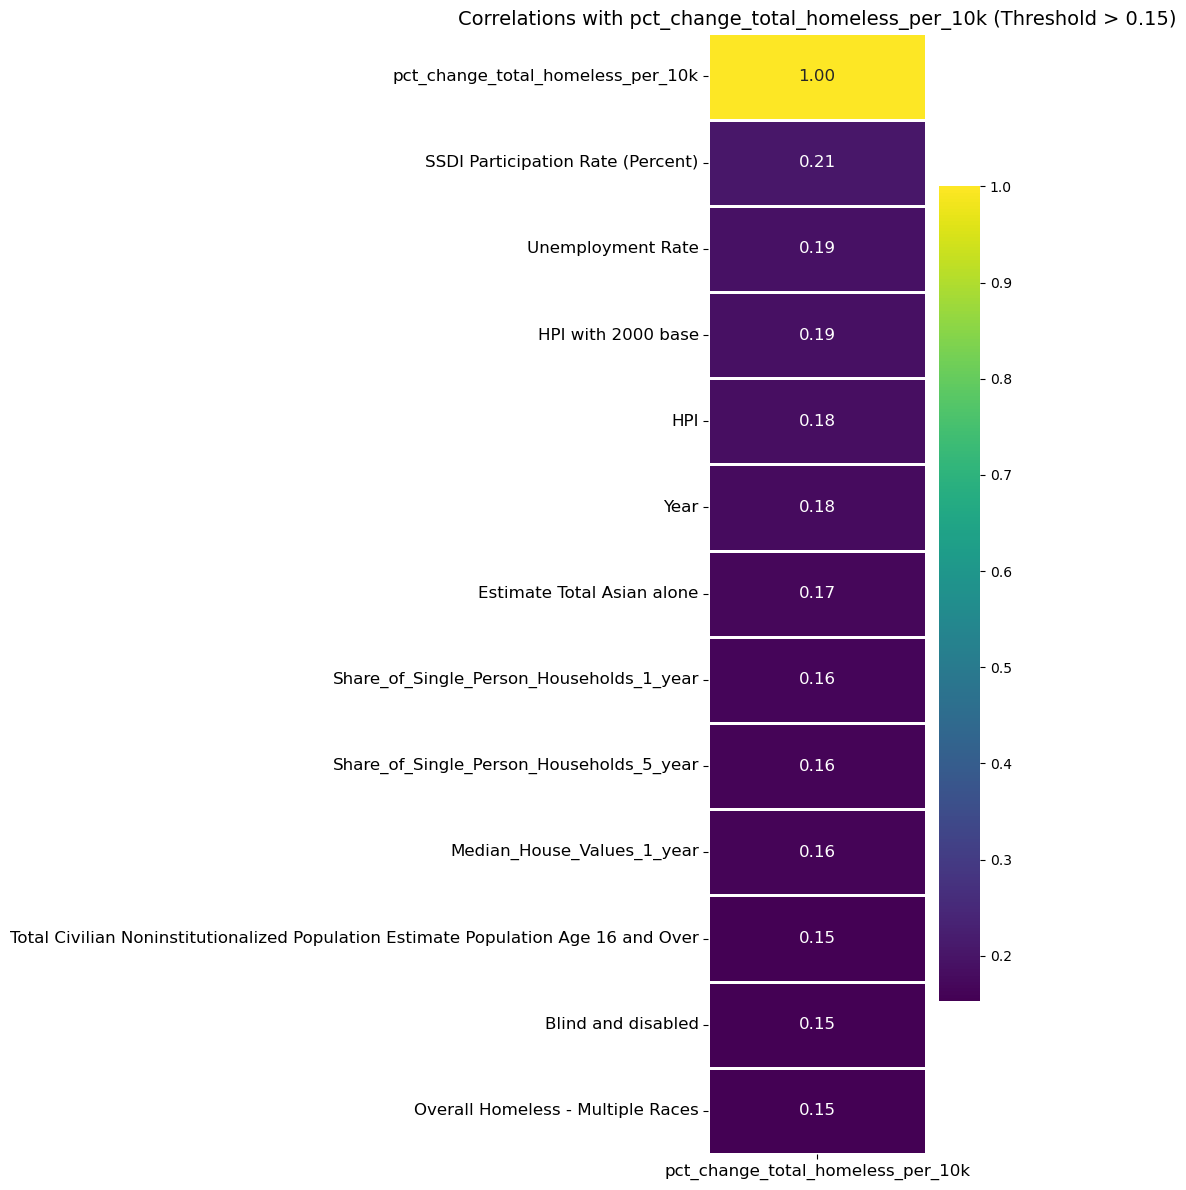

In [8]:
# Correlation heatmap for pct_change_total_homeless_per_10k (Task 3)
plt.figure(figsize=(10, 12))

# Correlation matrix from task 3 modeling dataset
corr_matrix_task3 = df_filtered_task3.select_dtypes(include=['number']).corr()

# Extracting correlations with Task 3 target
target_corr_task3 = corr_matrix_task3[['pct_change_total_homeless_per_10k']].copy()

# Setting threshold
threshold = 0.15  

# Filter and sort
target_corr_task3 = target_corr_task3[abs(target_corr_task3) > threshold].dropna()
target_corr_task3 = target_corr_task3.abs().sort_values(by='pct_change_total_homeless_per_10k', ascending=False)

# Plot
sns.heatmap(
    target_corr_task3,
    annot=True,
    cmap="viridis",
    fmt=".2f",
    linewidths=0.75,
    annot_kws={"size": 12}
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.title(f"Correlations with pct_change_total_homeless_per_10k (Threshold > {threshold})", fontsize=14)
plt.tight_layout()
plt.show()

<a id="section-3_7"></a>
### 3.7 Saving correlations with pct_change_total_homeless_per_10k to CSV

In [54]:
# Saving correlations with pct_change_total_homeless_per_10k to CSV
# Getting current date in the format YYYYMMDD
current_date = datetime.datetime.now().strftime("%Y%m%d")

# Defining the output CSV file path
output_dir = "./data/"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

# Construct output filename with task 3 indicator
correlation_csv_path_task3 = os.path.join(
    output_dir, f"pct_change_total_homeless_per_10k_correlations_{current_date}.csv"
)

# Saving Task 3 correlations to a CSV file
target_corr_task3.to_csv(correlation_csv_path_task3, encoding="utf-8")

print(f"Task 3 correlations saved to: {correlation_csv_path_task3}")

Task 3 correlations saved to: ./data/pct_change_total_homeless_per_10k_correlations_20250407.csv


<a id="section-3_8"></a>
### 3.8 Using the demographic and socioeconomic features for the task3 model

In [9]:
# Loading the correlation file to identify the strongest predictors
correlation_file_path = "./data/pct_change_total_homeless_per_10k_correlations_20250330.csv"
df_correlations_task3 = pd.read_csv(correlation_file_path, index_col=0)

# Selecting the strongest predictors based on correlation values
threshold = 0.15
strong_predictors = df_correlations_task3[
    abs(df_correlations_task3["pct_change_total_homeless_per_10k"]) > threshold
].index.tolist()

# Define target variable
target_task3 = "pct_change_total_homeless_per_10k"

# Exclude the target and highly collinear features
features_to_exclude = [
    target_task3,
    "total_homeless_per_10k",
    "total_sheltered_homeless_per_10k",
    "unsheltered_homeless_per_10k"
]

# Final selected features (after exclusions)
selected_features_task3 = [
    feature for feature in strong_predictors
    if feature in df_filtered_task3.columns and feature not in features_to_exclude
]

# Columns to preserve for identification
id_columns = ["CoC Number", "County"]
available_ids = [col for col in id_columns if col in df_filtered_task3.columns]

# Final modeling DataFrame for Task 3
df_model_task3 = df_filtered_task3[
    available_ids + selected_features_task3 + [target_task3]
].copy()

# Adding binary classification target: 1 = increase, 0 = decrease or no change
df_model_task3["target_class"] = (df_model_task3["pct_change_total_homeless_per_10k"] > 0).astype(int)

# Display sample rows to verify
df_model_task3.sample(5, random_state=45)

CoC Number              County  SSDI Participation Rate (Percent)  \
253      FL-600   miami-dade county                                NaN   
212      FL-502     pinellas county                           4.235792   
1111     WA-502      spokane county                                NaN   
123      CA-600  los angeles county                           1.840622   
157      CA-604         kern county                           3.244271   

      Unemployment Rate  HPI with 2000 base      HPI  Year  \
253                 NaN              141.88   486.97  2011   
212                 5.0              168.53   529.07  2015   
1111                6.0              165.41   579.96  2016   
123                 5.3              232.25  1373.51  2016   
157                10.5              167.74   502.79  2014   

      Estimate Total Asian alone  Share_of_Single_Person_Households_1_year  \
253                         0.02                                       0.0   
212                         0.03                                       0.0   
1111                        0.02                                       0.0   
123                         0.15                                       0.0   
157                         0.05                                       0.0   

      Share_of_Single_Person_Households_5_year  Median_House_Values_1_year  \
253                                        0.0                    174700.0   
212                                        0.0                    170500.0   
1111                                       0.0                    201300.0   
123                                        0.0                    537900.0   
157                                        0.0                    183100.0   

      Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over  \
253                                                 NaN                                    
212                                            798670.0                                    
1111                                                NaN                                    
123                                           8088028.0                                    
157                                            616163.0                                    

      Blind and disabled  Overall Homeless - Multiple Races  \
253                  NaN                                  0   
212              19278.0                                 99   
1111                 NaN                                 77   
123             274143.0                               1822   
157              28698.0                                  0   

      pct_change_total_homeless_per_10k  target_class  
253                            0.027075             1  
212                           -0.189405             0  
1111                           0.095569             1  
123                            0.192820             1  
157                           -0.046577             0

#### 3.8.1 Looking at structure and basic information

In [10]:
# Looking at structure and basic information
df_model_task3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 1 to 1158
Data columns (total 16 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   CoC Number                                                                          304 non-null    object 
 1   County                                                                              304 non-null    object 
 2   SSDI Participation Rate (Percent)                                                   168 non-null    float64
 3   Unemployment Rate                                                                   266 non-null    float64
 4   HPI with 2000 base                                                                  304 non-null    float64
 5   HPI                                                                                 304 non-null    flo

<a id="section-3_9"></a>
### 3.9 Handling missing values for task3 model

Two of the columns have missing values:
- Social Security Disability Insurance (SSDI) Participation Rate (Percent): 136
- Unemployment rate: 38
- Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over: 136
- Blind and disabled: 136

#### 3.9.1 Checking for missing values

In [11]:
# Checking for missing values
display(df_model_task3.isnull().sum().to_frame().T)

CoC Number  County  SSDI Participation Rate (Percent)  Unemployment Rate  \
0           0       0                                136                 38   

   HPI with 2000 base  HPI  Year  Estimate Total Asian alone  \
0                   0    0     0                           0   

   Share_of_Single_Person_Households_1_year  \
0                                         0   

   Share_of_Single_Person_Households_5_year  Median_House_Values_1_year  \
0                                         0                           0   

   Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over  \
0                                                136                                    

   Blind and disabled  Overall Homeless - Multiple Races  \
0                 136                                  0   

   pct_change_total_homeless_per_10k  target_class  
0                                  0             0

#### 3.9.2 Filling missing values with the median of each column

In [12]:
# Filling the missing values with median
#df_model_task3.fillna(df_model_task3.median(), inplace=True)
numeric_cols_task3 = df_model_task3.select_dtypes(include=['number']).columns
df_model_task3[numeric_cols_task3] = df_model_task3[numeric_cols_task3].fillna(df_model_task3[numeric_cols_task3].median())

# Making sure that missing values are handled
df_model_task3[numeric_cols_task3].isna().sum().sum()

0

#### 3.9.3 Checking for missing values after filling with median

In [13]:
# Checking for missing values after filling with median
display(df_model_task3.isnull().sum().to_frame().T)

CoC Number  County  SSDI Participation Rate (Percent)  Unemployment Rate  \
0           0       0                                  0                  0   

   HPI with 2000 base  HPI  Year  Estimate Total Asian alone  \
0                   0    0     0                           0   

   Share_of_Single_Person_Households_1_year  \
0                                         0   

   Share_of_Single_Person_Households_5_year  Median_House_Values_1_year  \
0                                         0                           0   

   Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over  \
0                                                  0                                    

   Blind and disabled  Overall Homeless - Multiple Races  \
0                   0                                  0   

   pct_change_total_homeless_per_10k  target_class  
0                                  0             0

<a id="section-3_10"></a>
### 3.10 Saving the task3 dataframe to a file

In [62]:
# Defining the output directory
output_dir = "./data/"

# Making sure the directory exists
os.makedirs(output_dir, exist_ok=True)  

# Getting the current date
current_date = datetime.datetime.now().strftime("%Y%m%d")

# Defining the output file path with the date
df_model_task3_file_path = os.path.join(output_dir, f"df_model_task3_{current_date}.csv")

# Saving the task3 model DataFrame to a CSV file
df_model_task3.to_csv(df_model_task3_file_path, index=False, encoding="utf-8")

# Printing confirmation message
print(f"Task3 model DataFrame saved to: {df_model_task3_file_path}")

Task3 model DataFrame saved to: ./data/df_model_task3_20250407.csv


<a id="section-3_11"></a>
### 3.11 Regression tests

#### 3.11.1 Splitting the data for task3 model into training validation and testing for regression

In [48]:
# Loading the task3 model file
model_task3_file_path = "./data/df_model_task3_20250407.csv"
df_model_task3_reg = pd.read_csv(model_task3_file_path)

# Define features and regression target
X_task3_reg = df_model_task3_reg[selected_features_task3]
y_task3_reg = df_model_task3_reg["pct_change_total_homeless_per_10k"]  # regression target

# Extract identifiers
df_model_task3_ids_reg = df_model_task3_reg[["CoC Number", "County"]]

# Reset index for all before splitting
X_task3_reg = X_task3_reg.reset_index(drop=True)
y_task3_reg = y_task3_reg.reset_index(drop=True)
df_model_task3_ids_reg = df_model_task3_ids_reg.reset_index(drop=True)

# First split into training (70%) and temp (30%)
X_train_task3_reg, X_temp_task3_reg, y_train_task3_reg, y_temp_task3_reg, ids_train_task3_reg, ids_temp_task3_reg = train_test_split(
    X_task3_reg, y_task3_reg, df_model_task3_ids_reg, test_size=0.3, random_state=42
)

# Then split temp into validation (15%) and test (15%)
X_val_task3_reg, X_test_task3_reg, y_val_task3_reg, y_test_task3_reg, val_ids_task3_reg, test_ids_task3_reg = train_test_split(
    X_temp_task3_reg, y_temp_task3_reg, ids_temp_task3_reg, test_size=0.5, random_state=42
)

# Final reset to ensure alignment
X_val_task3_reg = X_val_task3_reg.reset_index(drop=True)
y_val_task3_reg = y_val_task3_reg.reset_index(drop=True)
val_ids_task3_reg = val_ids_task3_reg.reset_index(drop=True)

# Display dataset sizes
print(f"Training set: {X_train_task3_reg.shape[0]} rows")
print(f"Validation set: {X_val_task3_reg.shape[0]} rows")
print(f"Testing set: {X_test_task3_reg.shape[0]} rows")

Training set: 212 rows
Validation set: 46 rows
Testing set: 46 rows


#### 3.11.2 Checking for NaNs in Training, Validation and Test for regression

In [49]:
# Checking for NaNs in features
print("NaNs in X_train_task3_reg:", X_train_task3_reg.isna().sum().sum())
print("NaNs in X_val_task3_reg:", X_val_task3_reg.isna().sum().sum())
print("NaNs in X_test_task3_reg:", X_test_task3_reg.isna().sum().sum())

# Checking for NaNs in targets
print("NaNs in y_train_task3_reg:", y_train_task3_reg.isna().sum())
print("NaNs in y_val_task3_reg:", y_val_task3_reg.isna().sum())
print("NaNs in y_test_task3_reg:", y_test_task3_reg.isna().sum())

NaNs in X_train_task3_reg: 0
NaNs in X_val_task3_reg: 0
NaNs in X_test_task3_reg: 0
NaNs in y_train_task3_reg: 0
NaNs in y_val_task3_reg: 0
NaNs in y_test_task3_reg: 0


#### 3.11.3 Hyperparameter tuning the random forest task3 regression model

In [54]:
# Defining the parameter grid to search over
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [4, 5, 6, 7, 8]
}

# Setting up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=1
)

# Running the grid search on the training set
grid_search.fit(X_train_task3_reg, y_train_task3_reg)

# Print the best parameters found
print("Best Parameters for Task3 Model:")
print(grid_search.best_params_)
print(f"Best R² score: {grid_search.best_score_:.4f}")

Best Parameters for Task3 Model:
{'max_depth': 6, 'n_estimators': 200}
Best R² score: -0.0291


#### 3.11.4 Train Random Forest task3 model with tuned parameters

In [56]:
# Extracting the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_

# Initializing and training the model with best parameters
model_rf_reg_task3 = RandomForestRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    random_state=42
)

# Training the model
model_rf_reg_task3.fit(X_train_task3_reg, y_train_task3_reg)

# Extracting feature importances
feature_importances = pd.DataFrame({
    "Feature": selected_features_task3,
    "Importance": model_rf_reg_task3.feature_importances_
})

# Sorting features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Displaying feature importances
print(feature_importances)

                                              Feature  Importance
2                                  HPI with 2000 base    0.144915
3                                                 HPI    0.140506
11                  Overall Homeless - Multiple Races    0.122989
1                                   Unemployment Rate    0.109080
8                          Median_House_Values_1_year    0.106997
4                                                Year    0.103099
10                                 Blind and disabled    0.053003
5                          Estimate Total Asian alone    0.050114
0                   SSDI Participation Rate (Percent)    0.049472
6            Share_of_Single_Person_Households_1_year    0.042742
9   Total Civilian Noninstitutionalized Population...    0.039296
7            Share_of_Single_Person_Households_5_year    0.037787


#### 3.11.5 Evaluating the random forest task3 model with tuned paramters

In [58]:
# Predicting using the validation set
y_pred_rf_reg_task3 = model_rf_reg_task3.predict(X_val_task3_reg)

# Computing metrics
r2_rf_reg_task3 = r2_score(y_val_task3_reg, y_pred_rf_reg_task3)
rmse_rf_reg_task3 = np.sqrt(mean_squared_error(y_val_task3_reg, y_pred_rf_reg_task3))

# Display results
print(f"R² Score on Validation Set (Random Forest task3 model): {r2_rf_reg_task3:.4f}")
print(f"Root Mean Squared Error (RMSE) on Validation Set (Random Forest task3 model): {rmse_rf_reg_task3:.4f}")

R² Score on Validation Set (Random Forest task3 model): -0.1383
Root Mean Squared Error (RMSE) on Validation Set (Random Forest task3 model): 0.1544


Notes: This model is performing worse than simply predicting the mean of y_val. The negative R² means that the model is not capturing the pattern in the data at all. The 0.15 RMSE means that the model's predictions are, on avergae, 15 percentage points off. The model may be overfitting the training data and failing to generalize.
Thoughts on what to try next:
- Simplify the task. Maybe try a binary classification (did homelessness increase or decrease?)
- Maybe try to engineer other features
- Try another model like XGBoost

#### 3.11.6 Prediction vs Actual plot for the task3 model validation set

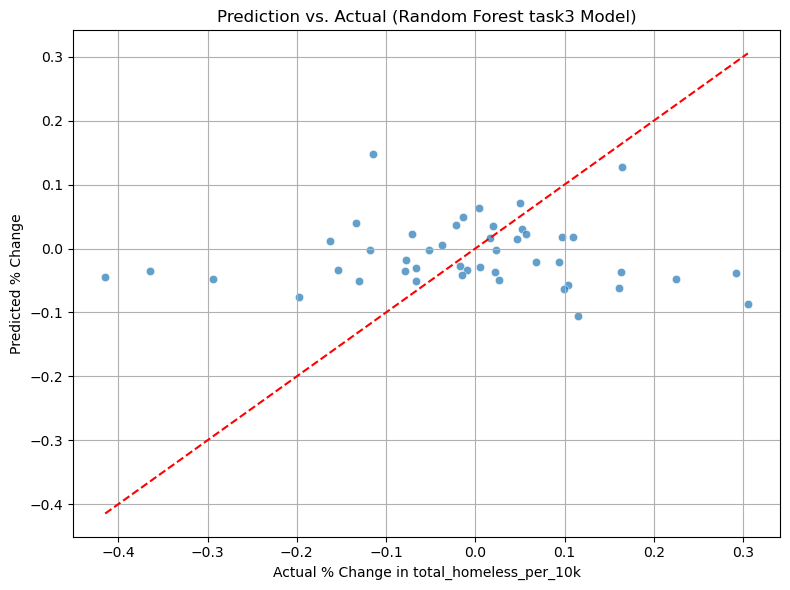

In [59]:
# Creating the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val_task3_reg, y=y_pred_rf_reg_task3, alpha=0.7)

# Adding the 45-degree reference line
plt.plot([y_val_task3_reg.min(), y_val_task3_reg.max()], [y_val_task3_reg.min(), y_val_task3_reg.max()], color='red', linestyle='--')

# Labeling
plt.xlabel("Actual % Change in total_homeless_per_10k")
plt.ylabel("Predicted % Change")
plt.title("Prediction vs. Actual (Random Forest task3 Model)")
plt.grid(True)
plt.tight_layout()

plt.show()

Notes:
- Looks like the model is underfitting because most predictions cluster near 0.
- The model is underpredicting increases and overpredicting decreases.
- When actual homelessness increases, the model often underestimates how much.
- There is no strong linear trend between actual and predicted values

#### 3.11.7 Train OLS regression task3 model

In [ ]:
#51
# Training OLS regression
model_ols_task3_reg = LinearRegression()
model_ols_task3_reg.fit(X_train_task3_reg, y_train_task3_reg)

# Displaying the coefficients
coefficients = pd.DataFrame({"Feature": selected_features_task3, "Coefficient": model_ols_task3_reg.coef_})
print(coefficients.sort_values(by="Coefficient", ascending=False))

                                              Feature   Coefficient
6            Share_of_Single_Person_Households_1_year  1.063664e+00
5                          Estimate Total Asian alone  3.299453e-01
4                                                Year  6.483636e-03
3                                                 HPI  2.491952e-04
10                                 Blind and disabled  1.409469e-06
9   Total Civilian Noninstitutionalized Population... -3.679677e-08
8                          Median_House_Values_1_year -5.230850e-07
11                  Overall Homeless - Multiple Races -1.374372e-05
2                                  HPI with 2000 base -3.607479e-04
1                                   Unemployment Rate -4.098564e-03
0                   SSDI Participation Rate (Percent) -3.504231e-02
7            Share_of_Single_Person_Households_5_year -9.473530e-01


#### 3.11.8 Evaluating the OLS regression task3 model

In [ ]:
#52
# Predicting and evaluating the OLS growth model
y_val_pred_ols_task3_reg = model_ols_task3_reg.predict(X_val_task3_reg)

r2_ols_task3_reg = r2_score(y_val_task3_reg, y_val_pred_ols_task3_reg)
rmse_ols_task3_reg = np.sqrt(mean_squared_error(y_val_task3_reg, y_val_pred_ols_task3_reg))

print(f"OLS R² Score on Validation Set: {r2_ols_task3_reg:.4f}")
print(f"OLS RMSE on Validation Set: {rmse_ols_task3_reg:.4f}")

OLS R² Score on Validation Set: -0.1088
OLS RMSE on Validation Set: 0.1524


Notes: this model is performing as poorly as the random forest model.

<a id="section-3_12"></a>
### 3.12 Classification tests

#### 3.12.1 Splitting the data for task3 model into training, validation and testing for classification

In [ ]:
# Loading the task3 dataset file
model_task3_file_path = "./data/df_model_task3_20250407.csv"
df_model_task3 = pd.read_csv(model_task3_file_path)

# Define the features and classification target
X_task3 = df_model_task3[selected_features_task3]
y_task3 = df_model_task3["target_class"]

# Extract identifiers
df_model_task3_ids = df_model_task3[["CoC Number", "County"]]

# Reset index for all before splitting
X_task3 = X_task3.reset_index(drop=True)
y_task3 = y_task3.reset_index(drop=True)
df_model_task3_ids = df_model_task3_ids.reset_index(drop=True)

# First split into training (70%) and temp (30%)
X_train_task3, X_temp_task3, y_train_task3, y_temp_task3, ids_train_task3, ids_temp_task3 = train_test_split(
    X_task3, y_task3, df_model_task3_ids, test_size=0.3, random_state=42
)

# Then split temp into validation (15%) and test (15%)
X_val_task3, X_test_task3, y_val_task3, y_test_task3, val_ids_task3, test_ids_task3 = train_test_split(
    X_temp_task3, y_temp_task3, ids_temp_task3, test_size=0.5, random_state=42
)

# Final reset to ensure alignment
X_val_task3 = X_val_task3.reset_index(drop=True)
y_val_task3 = y_val_task3.reset_index(drop=True)
val_ids_task3 = val_ids_task3.reset_index(drop=True)

# Display dataset sizes
print(f"Training set: {X_train_task3.shape[0]} rows")
print(f"Validation set: {X_val_task3.shape[0]} rows")
print(f"Testing set: {X_test_task3.shape[0]} rows")

Training set: 212 rows
Validation set: 46 rows
Testing set: 46 rows


#### 3.12.2 Checking for NaNs in Training, Validation and Test for classification

In [15]:
# Checking for NaNs in features
print("NaNs in X_train_task3:", X_train_task3.isna().sum().sum())
print("NaNs in X_val_task3:", X_val_task3.isna().sum().sum())
print("NaNs in X_test_task3:", X_test_task3.isna().sum().sum())

# Checking for NaNs in targets
print("NaNs in y_train_task3:", y_train_task3.isna().sum())
print("NaNs in y_val_task3:", y_val_task3.isna().sum())
print("NaNs in y_test_task3:", y_test_task3.isna().sum())

NaNs in X_train_task3: 0
NaNs in X_val_task3: 0
NaNs in X_test_task3: 0
NaNs in y_train_task3: 0
NaNs in y_val_task3: 0
NaNs in y_test_task3: 0


#### 3.12.3 Initializing and fitting a Random Forest Classifier

In [16]:
# Initializing the model
model_rf_class_task3 = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight='balanced'  # added to help if the classes are imbalanced
)

# Training on the training set
model_rf_class_task3.fit(X_train_task3, y_train_task3)

# Extracting feature importances from classification model
feature_importances_task3 = pd.DataFrame({
    "Feature": selected_features_task3,
    "Importance": model_rf_class_task3.feature_importances_
})

# Sorting by most important features
feature_importances_task3 = feature_importances_task3.sort_values(by="Importance", ascending=False)

# Display the result
print(feature_importances_task3)

                                              Feature  Importance
2                                  HPI with 2000 base    0.175859
8                          Median_House_Values_1_year    0.109131
3                                                 HPI    0.099540
1                                   Unemployment Rate    0.096634
10                                 Blind and disabled    0.091716
0                   SSDI Participation Rate (Percent)    0.089306
9   Total Civilian Noninstitutionalized Population...    0.077024
11                  Overall Homeless - Multiple Races    0.064968
4                                                Year    0.055501
5                          Estimate Total Asian alone    0.053325
7            Share_of_Single_Person_Households_5_year    0.046157
6            Share_of_Single_Person_Households_1_year    0.040840


#### 3.12.4 Evaluating the Random Forest Classifier model

In [41]:
# Predicting classes for validation set using Random Forest Classifier
y_pred_class_rf_task3 = model_rf_class_task3.predict(X_val_task3)

# Basic performance metrics
accuracy_rf = accuracy_score(y_val_task3, y_pred_class_rf_task3)
precision_rf = precision_score(y_val_task3, y_pred_class_rf_task3)
recall_rf = recall_score(y_val_task3, y_pred_class_rf_task3)
conf_matrix = confusion_matrix(y_val_task3, y_pred_class_rf_task3)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Full classification report
print("\nClassification Report:")
print(classification_report(y_val_task3, y_pred_class_rf_task3))

Accuracy: 0.50
Precision: 0.53
Recall: 0.38
Confusion Matrix:
[[14  8]
 [15  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        22
           1       0.53      0.38      0.44        24

    accuracy                           0.50        46
   macro avg       0.51      0.51      0.49        46
weighted avg       0.51      0.50      0.49        46



#### 3.12.5 Plotting the Random Forest classification confusion matrix for validation set

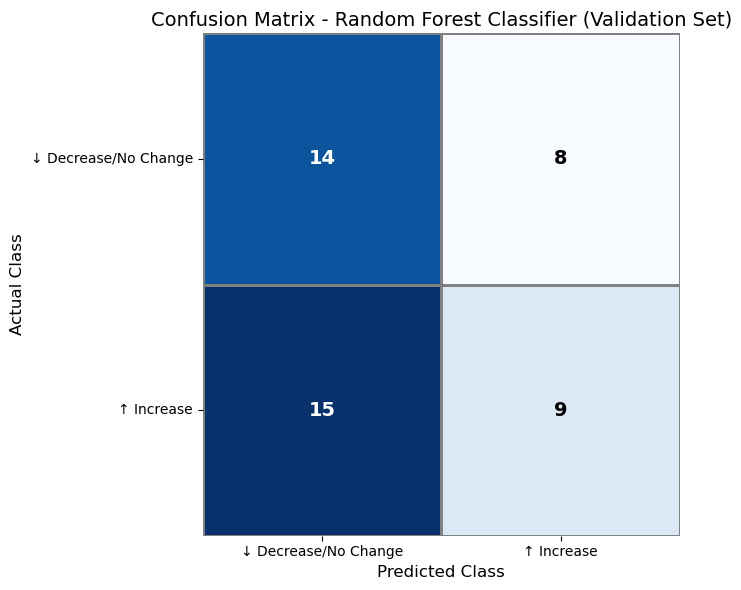

In [42]:
# Computing the confusion matrix
conf_matrix = confusion_matrix(y_val_task3, y_pred_class_rf_task3, labels=[0, 1])

# Setting up labels
labels = ["↓ Decrease/No Change", "↑ Increase"]

# Plotting the heatmap
plt.figure(figsize=(7, 6))
ax = sns.heatmap(
    conf_matrix,
    annot=False,
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    cbar=False,
    linewidths=1,
    linecolor="gray"
)

# Setting the color for the values
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        text_color = "white" if value > 10 else "black"
        ax.text(
            j + 0.5, i + 0.5, str(value),
            ha="center", va="center",
            color=text_color,
            fontsize=14,
            fontweight="bold"
        )

# Labels and title
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Actual Class", fontsize=12)
plt.title("Confusion Matrix - Random Forest Classifier (Validation Set)", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Notes: 
- For actual decrease in homelessness, 14 are correctly classified and 8 misclassified.
- For actual increase in homelessness, 9 are correctly classified and 15 misclassified.
- accuracy: the model only gets 50% of the cases right. No better than flipping a coin.
- precision: of all the predicted increases in homelessness, only 53% are truly increases. Many false positives.
- recall: of all the actual increases in homelessness, only 38% are caught. Many false negatives.
- model has weak performance. Really struggles with predicting increases in homelessness.
- I think model struggles because of the small dataset.

#### 3.12.6 Initializing and fitting the XGBoost Classifier

In [19]:
# Initializing the XGBoost classifier
model_xgb_class_task3 = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'  
)

# Fitting the model
model_xgb_class_task3.fit(X_train_task3, y_train_task3)

# Extracting feature importances
feature_importances_xgb_task3 = pd.DataFrame({
    "Feature": selected_features_task3,
    "Importance": model_xgb_class_task3.feature_importances_
})

# Sort by most important
feature_importances_xgb_task3 = feature_importances_xgb_task3.sort_values(by="Importance", ascending=False)

# Display the result
print("Feature Importances (XGBoost Classifier - Task 3):")
print(feature_importances_xgb_task3)

Feature Importances (XGBoost Classifier - Task 3):
                                              Feature  Importance
7            Share_of_Single_Person_Households_5_year    0.110157
6            Share_of_Single_Person_Households_1_year    0.107079
2                                  HPI with 2000 base    0.104153
8                          Median_House_Values_1_year    0.096592
11                  Overall Homeless - Multiple Races    0.093101
10                                 Blind and disabled    0.084126
3                                                 HPI    0.075938
9   Total Civilian Noninstitutionalized Population...    0.074481
4                                                Year    0.066329
1                                   Unemployment Rate    0.064409
0                   SSDI Participation Rate (Percent)    0.062418
5                          Estimate Total Asian alone    0.061217


#### 3.12.7 Evaluating the XGBoost Classifier model

In [20]:
# Predicting  classes  validation set using XGBoost Classifier
y_pred_class_xgb_task3 = model_xgb_class_task3.predict(X_val_task3)

# Basic performance metrics
accuracy_xgb = accuracy_score(y_val_task3, y_pred_class_xgb_task3)
precision_xgb = precision_score(y_val_task3, y_pred_class_xgb_task3)
recall_xgb = recall_score(y_val_task3, y_pred_class_xgb_task3)
conf_matrix_xgb = confusion_matrix(y_val_task3, y_pred_class_xgb_task3)

print(f"XGBoost Classifier - Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Full classification report
print("\nClassification Report:")
print(classification_report(y_val_task3, y_pred_class_xgb_task3))

XGBoost Classifier - Accuracy: 0.48
Precision: 0.50
Recall: 0.29
Confusion Matrix:
[[15  7]
 [17  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.68      0.56        22
           1       0.50      0.29      0.37        24

    accuracy                           0.48        46
   macro avg       0.48      0.49      0.46        46
weighted avg       0.49      0.48      0.46        46



#### 3.12.8 Plotting the XGBoost classification confusion matrix for validation set

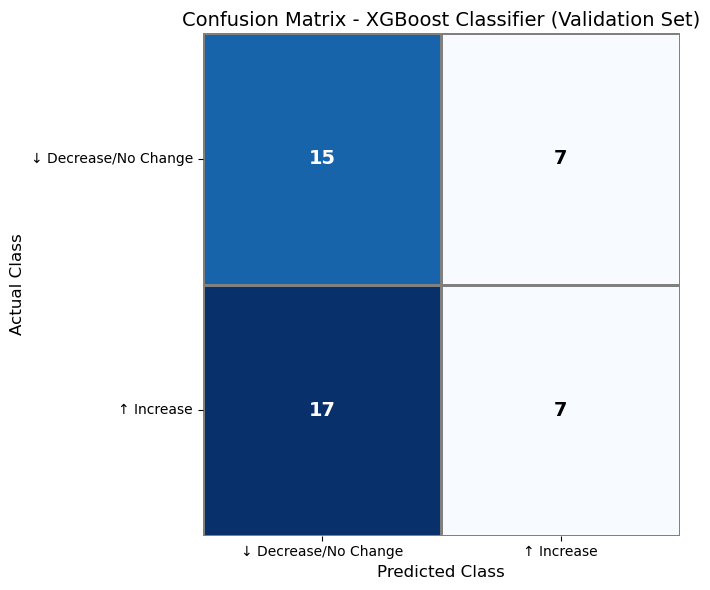

In [21]:
# Computing the confusion matrix
conf_matrix_xgb = confusion_matrix(y_val_task3, y_pred_class_xgb_task3, labels=[0, 1])

# Setting up labels
labels = ["↓ Decrease/No Change", "↑ Increase"]

# Plotting the heatmap
plt.figure(figsize=(7, 6))
ax = sns.heatmap(
    conf_matrix_xgb,
    annot=False,
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    cbar=False,
    linewidths=1,
    linecolor="gray"
)

# Setting the color for the values
for i in range(conf_matrix_xgb.shape[0]):
    for j in range(conf_matrix_xgb.shape[1]):
        value = conf_matrix_xgb[i, j]
        text_color = "white" if value > 10 else "black"
        ax.text(
            j + 0.5, i + 0.5, str(value),
            ha="center", va="center",
            color=text_color,
            fontsize=14,
            fontweight="bold"
        )

# Labels and title
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Actual Class", fontsize=12)
plt.title("Confusion Matrix - XGBoost Classifier (Validation Set)", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Notes: 
- For actual decrease in homelessness, 15 are correctly classified and 7 misclassified.
- For actual increase in homelessness, 7 are correctly classified and 17 misclassified.
- accuracy: the model only gets 48% of the cases right. Slightly worse than random guessing.
- precision: of all the predicted increases in homelessness, only 50% are truly increases. Many false positives.
- recall: of all the actual increases in homelessness, only 29% are caught. Many false negatives.
- model also has weak performance. It misses most of the real increases in homelessness.
- I think model struggles because of the small dataset and class imbalance.

#### 3.12.9 Initializing and fitting an OLS regression Classifier

In [27]:
# Adding the constant for intercept
X_train_ols = sm.add_constant(X_train_task3)
X_val_ols = sm.add_constant(X_val_task3)

# Fitting logistic regression model
model_ols_class_task3 = sm.Logit(y_train_task3, X_train_ols).fit(disp=False)

# Printing model summary
print(model_ols_class_task3.summary())

# Predicting class probabilities and convert to class labels
y_pred_probs_ols = model_ols_class_task3.predict(X_val_ols)
y_pred_class_ols_task3 = (y_pred_probs_ols >= 0.5).astype(int)

# Feature importance
feature_importances_ols = pd.DataFrame({
    "Feature": X_train_ols.columns,
    "Coefficient": model_ols_class_task3.params,
    "Abs_Coefficient": model_ols_class_task3.params.abs()
}).sort_values(by="Abs_Coefficient", ascending=False)

print("Feature Importances (OLS-style Logistic Regression - Task 3):")
print(feature_importances_ols[["Feature", "Coefficient"]])

                           Logit Regression Results                           
Dep. Variable:           target_class   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                 0.06104
Time:                        14:06:15   Log-Likelihood:                -134.41
converged:                       True   LL-Null:                       -143.15
Covariance Type:            nonrobust   LLR p-value:                    0.1325
                                                                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                             

#### 3.12.10 Evaluating the Logistic regression model

In [28]:
# Basic performance metrics
accuracy_ols = accuracy_score(y_val_task3, y_pred_class_ols_task3)
precision_ols = precision_score(y_val_task3, y_pred_class_ols_task3)
recall_ols = recall_score(y_val_task3, y_pred_class_ols_task3)
conf_matrix_ols = confusion_matrix(y_val_task3, y_pred_class_ols_task3)

print(f"OLS Logistic Regression - Accuracy: {accuracy_ols:.2f}")
print(f"Precision: {precision_ols:.2f}")
print(f"Recall: {recall_ols:.2f}")
print("Confusion Matrix:")
print(conf_matrix_ols)

# Full classification report
print("\nClassification Report:")
print(classification_report(y_val_task3, y_pred_class_ols_task3))

OLS Logistic Regression - Accuracy: 0.52
Precision: 0.62
Recall: 0.21
Confusion Matrix:
[[19  3]
 [19  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.86      0.63        22
           1       0.62      0.21      0.31        24

    accuracy                           0.52        46
   macro avg       0.56      0.54      0.47        46
weighted avg       0.57      0.52      0.47        46



#### 3.12.11 Plotting the confusion matrix for OLS logistic regression

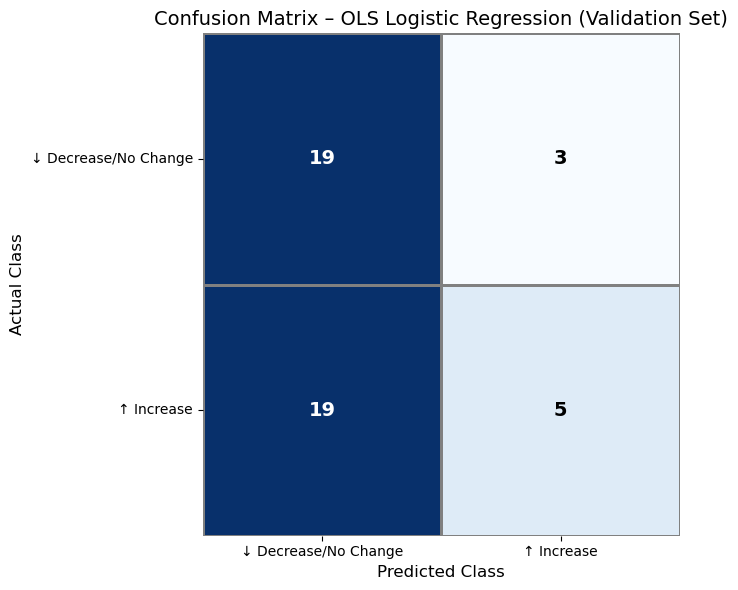

In [29]:
# Computing confusion matrix for OLS predictions
conf_matrix_ols = confusion_matrix(y_val_task3, y_pred_class_ols_task3, labels=[0, 1])

# Setting up labels
labels = ["↓ Decrease/No Change", "↑ Increase"]

# Plotting the heatmap
plt.figure(figsize=(7, 6))
ax = sns.heatmap(
    conf_matrix_ols,
    annot=False,
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    cbar=False,
    linewidths=1,
    linecolor="gray"
)

# Setting the color for the values
for i in range(conf_matrix_ols.shape[0]):
    for j in range(conf_matrix_ols.shape[1]):
        value = conf_matrix_ols[i, j]
        text_color = "white" if value > 10 else "black"
        ax.text(
            j + 0.5, i + 0.5, str(value),
            ha="center", va="center",
            color=text_color,
            fontsize=14,
            fontweight="bold"
        )

# Labels and title
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Actual Class", fontsize=12)
plt.title("Confusion Matrix – OLS Logistic Regression (Validation Set)", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Notes: 
- For actual decrease in homelessness, 19 are correctly classified and 3 misclassified.
- For actual increase in homelessness, 5 are correctly classified and 19 misclassified.
- accuracy: the model predicts 52% of the cases right.
- precision: of all the predicted increases in homelessness, 62% actually did.
- recall: of all the actual increases in homelessness, only 21% are caught. Many false negatives.
- F1-Score: is at 31%. There is a low balance between precision and recall.
- model is good at predicting a decrease/no change in homelessness but struggles to predict increases.
- I think model struggles because of the small dataset and class imbalance. The model leans towards predicting decreases more often.

#### 3.12.12 Analyzing the misclassified counties for the task 3 classifiers

##### 3.12.12.1 Creating prediction columns and adding misclassification flags

In [30]:
# Creating the prediction columns
val_ids_task3["actual"] = y_val_task3.reset_index(drop=True)
val_ids_task3["pred_rf"] = y_pred_class_rf_task3
val_ids_task3["pred_xgb"] = y_pred_class_xgb_task3
val_ids_task3["pred_ols"] = y_pred_class_ols_task3 

# Adding flag misclassifications
val_ids_task3["misclassified_rf"] = val_ids_task3["actual"] != val_ids_task3["pred_rf"]
val_ids_task3["misclassified_xgb"] = val_ids_task3["actual"] != val_ids_task3["pred_xgb"]
val_ids_task3["misclassified_ols"] = val_ids_task3["actual"] != val_ids_task3["pred_ols"] 

##### 3.12.9.2 Looking at the misclassified counties for Random Forest

In [36]:
misclassified_rf = val_ids_task3[val_ids_task3["misclassified_rf"]]
print("Random Forest - Misclassified Counties")
display(misclassified_rf[["CoC Number", "County", "actual", "pred_rf"]])

# How many counties were misclassified
print(f"Total misclassified counties (Random Forest): {len(misclassified_rf)}")

Random Forest - Misclassified Counties


CoC Number              County  actual  pred_rf
1      TX-500        bexar county       0        1
4      NC-502       durham county       1        0
7      MN-501       ramsey county       0        1
8      CA-601    san diego county       0        1
14     TX-600       dallas county       0        1
15     GA-503       clarke county       1        0
16     WA-502      spokane county       1        0
18     VA-600    arlington county       1        0
24     TX-600       dallas county       1        0
25     FL-600   miami-dade county       1        0
28     NV-500        clark county       1        0
29     NV-500        clark county       1        0
30     NV-501       washoe county       1        0
32     FL-600   miami-dade county       0        1
33     NC-500      forsyth county       1        0
36     FL-600   miami-dade county       1        0
37     CA-500  santa clara county       1        0
38     NC-507         wake county       0        1
39     WA-500         king county       1        0
40     CA-604         kern county       1        0
42     NC-513       orange county       1        0
44     GA-503       clarke county       0        1
45     TX-601      tarrant county       0        1

Total misclassified counties (Random Forest): 23


##### 3.12.9.3 Looking at the misclassified counties for XGBoost

In [35]:
misclassified_xgb = val_ids_task3[val_ids_task3["misclassified_xgb"]]
print("XGBoost - Misclassified Counties")
display(misclassified_xgb[["CoC Number", "County", "actual", "pred_xgb"]])

# How many counties were misclassified
print(f"Total misclassified counties (XGBoost): {len(misclassified_xgb)}")

XGBoost - Misclassified Counties


CoC Number              County  actual  pred_xgb
0      MN-501       ramsey county       0         1
1      TX-500        bexar county       0         1
4      NC-502       durham county       1         0
7      MN-501       ramsey county       0         1
8      CA-601    san diego county       0         1
15     GA-503       clarke county       1         0
16     WA-502      spokane county       1         0
17     CA-601    san diego county       1         0
18     VA-600    arlington county       1         0
24     TX-600       dallas county       1         0
25     FL-600   miami-dade county       1         0
28     NV-500        clark county       1         0
29     NV-500        clark county       1         0
30     NV-501       washoe county       1         0
32     FL-600   miami-dade county       0         1
33     NC-500      forsyth county       1         0
35     WA-500         king county       1         0
36     FL-600   miami-dade county       1         0
37     CA-500  santa clara county       1         0
38     NC-507         wake county       0         1
39     WA-500         king county       1         0
40     CA-604         kern county       1         0
42     NC-513       orange county       1         0
45     TX-601      tarrant county       0         1

Total misclassified counties (XGBoost): 24


##### 3.12.9.4 Looking at the misclassified counties for OLS Logisitc Regression

In [34]:
misclassified_ols = val_ids_task3[val_ids_task3["misclassified_ols"]]
print("OLS Logistic Regression - Misclassified Counties")
display(misclassified_ols[["CoC Number", "County", "actual", "pred_ols"]])

# How many counties were misclassified
print(f"Total misclassified counties (OLS): {len(misclassified_ols)}")

OLS Logistic Regression - Misclassified Counties


CoC Number              County  actual  pred_ols
0      MN-501       ramsey county       0         1
9      MN-501       ramsey county       1         0
15     GA-503       clarke county       1         0
16     WA-502      spokane county       1         0
17     CA-601    san diego county       1         0
18     VA-600    arlington county       1         0
21     CA-601    san diego county       1         0
24     TX-600       dallas county       1         0
25     FL-600   miami-dade county       1         0
26     OH-503     franklin county       1         0
28     NV-500        clark county       1         0
29     NV-500        clark county       1         0
30     NV-501       washoe county       1         0
32     FL-600   miami-dade county       0         1
33     NC-500      forsyth county       1         0
37     CA-500  santa clara county       1         0
39     WA-500         king county       1         0
40     CA-604         kern county       1         0
41     OR-501    multnomah county       1         0
42     NC-513       orange county       1         0
43     AZ-502     maricopa county       1         0
44     GA-503       clarke county       0         1

Total misclassified counties (OLS): 22


##### 3.12.9.5 Counties misclassified by all models

In [37]:
# Counties misclassified by all models
misclassified_all = val_ids_task3[
    val_ids_task3["misclassified_rf"] & val_ids_task3["misclassified_xgb"] & val_ids_task3["misclassified_ols"]
]

print("Misclassified by all models:")
display(misclassified_all[["CoC Number", "County", "actual", "pred_rf", "pred_xgb", "pred_ols"]])

# How many counties were misclassified
print(f"Total misclassified counties: {len(misclassified_all)}")

Misclassified by all models:


CoC Number              County  actual  pred_rf  pred_xgb  pred_ols
15     GA-503       clarke county       1        0         0         0
16     WA-502      spokane county       1        0         0         0
18     VA-600    arlington county       1        0         0         0
24     TX-600       dallas county       1        0         0         0
25     FL-600   miami-dade county       1        0         0         0
28     NV-500        clark county       1        0         0         0
29     NV-500        clark county       1        0         0         0
30     NV-501       washoe county       1        0         0         0
32     FL-600   miami-dade county       0        1         1         1
33     NC-500      forsyth county       1        0         0         0
37     CA-500  santa clara county       1        0         0         0
39     WA-500         king county       1        0         0         0
40     CA-604         kern county       1        0         0         0
42     NC-513       orange county       1        0         0         0

Total misclassified counties: 14


##### 3.12.9.6 Classifier comparison table

In [43]:
# Counting misclassified counties
num_misclassified_rf = val_ids_task3["misclassified_rf"].sum()
num_misclassified_xgb = val_ids_task3["misclassified_xgb"].sum()
num_misclassified_ols = val_ids_task3["misclassified_ols"].sum()

# Creating comparison table
classifier_results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "OLS Logistic Regression"],
    "Accuracy": [accuracy_rf, accuracy_xgb, accuracy_ols],
    "Precision": [precision_rf, precision_xgb, precision_ols],
    "Recall": [recall_rf, recall_xgb, recall_ols],
    "Misclassified Counties": [num_misclassified_rf, num_misclassified_xgb, num_misclassified_ols]
})

# Formating for readability
classifier_results = classifier_results.round(2)

# Display the table
print("Classifier Comparison Table")
display(classifier_results)

Classifier Comparison Table


Model  Accuracy  Precision  Recall  \
0            Random Forest      0.50       0.53    0.38   
1                  XGBoost      0.48       0.50    0.29   
2  OLS Logistic Regression      0.52       0.62    0.21   

   Misclassified Counties  
0                      23  
1                      24  
2                      22

##### 3.12.9.7 Charts looking at class distribution

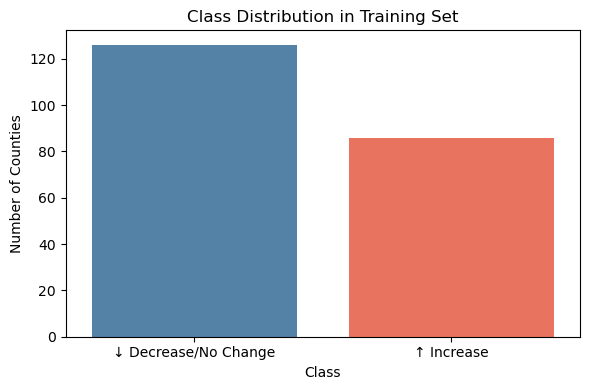

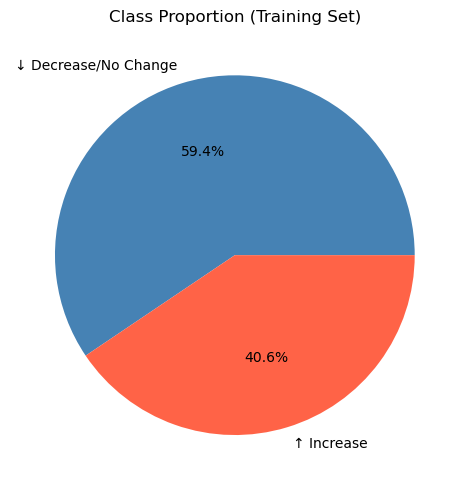

In [40]:
# Class counts and labels
class_counts = y_train_task3.value_counts().sort_index()
class_labels = ["↓ Decrease/No Change", "↑ Increase"]

# Creating a DataFrame for the class distribution
class_dist_df = pd.DataFrame({
    "Class": ["↓ Decrease/No Change", "↑ Increase"],
    "Count": y_train_task3.value_counts().sort_index().values
})

# My color palette
custom_palette = {
    "↓ Decrease/No Change": "steelblue",
    "↑ Increase": "tomato"
}

# Plot using custom colors
plt.figure(figsize=(6, 4))
sns.barplot(
    data=class_dist_df,
    x="Class",
    y="Count",
    hue="Class",
    palette=custom_palette,
    legend=False
)

plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Counties")
plt.xlabel("Class")
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_labels, autopct="%1.1f%%", colors=["steelblue", "tomato"])
plt.title("Class Proportion (Training Set)")
plt.tight_layout()
plt.show()

<a id="section-4"></a>
## Section 4 - Lagged Feature Engineering

<a id="section-4_1"></a>
### 4.1 Loading the full dataset into a dataframe

In [2]:
current_date = datetime.datetime.now().strftime("%m_%d_%Y")

# Loading the full dataset
file_path = "./data/homeless_dataset_full.csv"
df_homeless_full = pd.read_csv(file_path, encoding="utf-8")

# Displaying a sample to verify
df_homeless_full.sample(5, random_state=45)

CoC Number               County  Year  Overall Homeless  \
846     OK-501         tulsa county  2013              1008   
611     NJ-501        bergen county  2012               454   
924     PA-506         berks county  2010               513   
418     MD-503  anne arundel county  2011               382   
729     NV-500         clark county  2013              5952   

     Sheltered Total Homeless  Unsheltered Homeless  \
846                       886                   122   
611                       422                    32   
924                       500                    13   
418                       312                    70   
729                      2920                  3032   

     Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
846                            0                                0   
611                            0                                0   
924                            0                                0   
418                            0                                0   
729                            0                                0   

     Overall Homeless - Over 24  Overall Homeless - Female  \
846                           0                          0   
611                           0                          0   
924                           0                          0   
418                           0                          0   
729                           0                          0   

     Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
846                        0                                   0   
611                        0                                   0   
924                        0                                   0   
418                        0                                   0   
729                        0                                   0   

     Overall Homeless - White  \
846                         0   
611                         0   
924                         0   
418                         0   
729                         0   

     Overall Homeless - Black, African American, or African  \
846                                                  0        
611                                                  0        
924                                                  0        
418                                                  0        
729                                                  0        

     Overall Homeless - Asian or Asian American  \
846                                           0   
611                                           0   
924                                           0   
418                                           0   
729                                           0   

     Overall Homeless - American Indian, Alaska Native, or Indigenous  \
846                                                  0                  
611                                                  0                  
924                                                  0                  
418                                                  0                  
729                                                  0                  

     Overall Homeless - Native Hawaiian or Other Pacific Islander  \
846                                                  0              
611                                                  0              
924                                                  0              
418                                                  0              
729                                                  0              

     Overall Homeless - Multiple Races  \
846                                  0   
611                                  0   
924                                  0   
418                                  0   
729                                  0   

     Overall Homeless - Black or African American  Overall Homeless - Asian  \
846                       

<a id="section-4_2"></a>
### 4.2 Filtering for Major City and Largely Urban CoCs task3 model

In [3]:
# Filtering for Major City and Largely Urban CoC Categories
df_filtered_task3 = df_homeless_full[df_homeless_full["CoC Category"].isin(["Major City CoC", "Other Largely Urban CoC"])].copy()

# Displaying 5 random rows
df_filtered_task3.sample(5, random_state=45)

CoC Number           County  Year  Overall Homeless  \
324      GA-504  richmond county  2016               287   
808      OH-503  franklin county  2011              1418   
1097     WA-500      king county  2011              8972   
38       CA-502   alameda county  2012              4257   
61       CA-504    sonoma county  2017              2835   

      Sheltered Total Homeless  Unsheltered Homeless  \
324                        266                    21   
808                       1274                   144   
1097                      6480                  2492   
38                        2045                  2212   
61                         988                  1847   

      Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
324                            56                               15   
808                             0                                0   
1097                            0                                0   
38                              0                                0   
61                            297                              431   

      Overall Homeless - Over 24  Overall Homeless - Female  \
324                          216                        118   
808                            0                          0   
1097                           0                          0   
38                             0                          0   
61                          2107                        855   

      Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
324                       169                                   5   
808                         0                                   0   
1097                        0                                   0   
38                          0                                   0   
61                       1968                                 697   

      Overall Homeless - White  \
324                         80   
808                          0   
1097                         0   
38                           0   
61                        1990   

      Overall Homeless - Black, African American, or African  \
324                                                   0        
808                                                   0        
1097                                                  0        
38                                                    0        
61                                                    0        

      Overall Homeless - Asian or Asian American  \
324                                            0   
808                                            0   
1097                                           0   
38                                             0   
61                                             0   

      Overall Homeless - American Indian, Alaska Native, or Indigenous  \
324                                                   0                  
808                                                   0                  
1097                                                  0                  
38                                                    0                  
61                                                    0                  

      Overall Homeless - Native Hawaiian or Other Pacific Islander  \
324                                                   0              
808                                                   0              
1097                                                  0              
38                                                    0              
61                                                   28              

      Overall Homeless - Multiple Races  \
324                                   9   
808                                   0   
1097                                  0   
38                                    0   
61                                  396   

      Overall Homeless - Black or African American  Overall Home

<a id="section-4_3"></a>
### 4.3 Sorting by CoC and year

In [4]:
# Sorting by CoC Number and Year in preparation for percent change calculation
df_filtered_task3.sort_values(by=["CoC Number", "Year"], inplace=True)

# Displaying 5 rows
df_filtered_task3.head()

CoC Number         County  Year  Overall Homeless  Sheltered Total Homeless  \
0     AL-501  mobile county  2010               883                       482   
1     AL-501  mobile county  2011               718                       407   
2     AL-501  mobile county  2012               634                       324   
3     AL-501  mobile county  2013               493                       260   
4     AL-501  mobile county  2014               598                       461   

   Unsheltered Homeless  Overall Homeless - Under 18  \
0                   401                            0   
1                   311                            0   
2                   310                            0   
3                   233                            0   
4                   137                          126   

   Overall Homeless - Age 18 to 24  Overall Homeless - Over 24  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                               44                         428   

   Overall Homeless - Female  Overall Homeless - Male  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Overall Homeless - Hispanic/Latino  Overall Homeless - White  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   

   Overall Homeless - Black, African American, or African  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Overall Homeless - Asian or Asian American  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Overall Homeless - American Indian, Alaska Native, or Indigenous  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Overall Homeless - Multiple Races  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Overall Homeless - Black or African American  Overall Homeless - Asian  \
0                                             0                         0   
1                                             0                         0   
2                                             0                        

<a id="section-4_4"></a>
### 4.4 Calculating the percentage change in total_homeless_per_10k

In [5]:
# Calculating the percentage change in total_homeless_per_10k
df_filtered_task3["pct_change_total_homeless_per_10k"] = (df_filtered_task3.groupby("CoC Number")["total_homeless_per_10k"].pct_change())

# Displaying 5 rows
df_filtered_task3.head()

CoC Number         County  Year  Overall Homeless  Sheltered Total Homeless  \
0     AL-501  mobile county  2010               883                       482   
1     AL-501  mobile county  2011               718                       407   
2     AL-501  mobile county  2012               634                       324   
3     AL-501  mobile county  2013               493                       260   
4     AL-501  mobile county  2014               598                       461   

   Unsheltered Homeless  Overall Homeless - Under 18  \
0                   401                            0   
1                   311                            0   
2                   310                            0   
3                   233                            0   
4                   137                          126   

   Overall Homeless - Age 18 to 24  Overall Homeless - Over 24  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                               44                         428   

   Overall Homeless - Female  Overall Homeless - Male  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Overall Homeless - Hispanic/Latino  Overall Homeless - White  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   

   Overall Homeless - Black, African American, or African  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Overall Homeless - Asian or Asian American  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Overall Homeless - American Indian, Alaska Native, or Indigenous  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   Overall Homeless - Native Hawaiian or Other Pacific Islander  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   Overall Homeless - Multiple Races  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Overall Homeless - Black or African American  Overall Homeless - Asian  \
0                                             0                         0   
1                                             0                         0   
2                                             0                        

<a id="section-4_5"></a>
### 4.5 Choosing the columns to lag

In [6]:
# Homelessness related
homeless_lag = [
    "total_homeless_per_10k",
    "total_sheltered_homeless_per_10k",
    "unsheltered_homeless_per_10k"
]

# Housing market related
housing_lag = [
    "Median_House_Values_5_year",
    "Median_Rent_5_year",
    "Median_Gross_Rent_5_year",
    "Percentage_of_Households_with_Cost_Burden_5_year",
    "Rental_Vacancy_Rates_5_year",
    "Share_of_Single_Person_Households_5_year",
    "Share_of_Renter_Occupied_Units_5_year"
]

# Economic related
economic_lag = [
    "Unemployment Rate",
    "Median Household Income",
    "Poverty Rate",
    "Labor Force"
]

# The full list
columns_to_lag = (
    homeless_lag +
    housing_lag +
    economic_lag
)

<a id="section-4_6"></a>
### 4.6 Creating and inspecting the Lagged features

In [7]:
# Generating lagged features
for col in columns_to_lag:
    df_filtered_task3[f"{col}_lag1"] = df_filtered_task3.groupby("CoC Number")[col].shift(1)

# Inspecting a few of the lagged features
lagged_cols = [f"{col}_lag1" for col in columns_to_lag]
df_filtered_task3[["CoC Number", "Year"] + lagged_cols].sample(10, random_state=42)

CoC Number  Year  total_homeless_per_10k_lag1  \
810      OH-503  2013                    12.274564   
215      FL-502  2018                    26.782052   
212      FL-502  2015                    35.659125   
42       CA-502  2016                    25.156217   
309      GA-503  2010                          NaN   
1021     TX-500  2015                    15.233805   
566      NC-502  2012                    24.960574   
554      NC-500  2018                    11.606467   
1156     WI-503  2016                    11.839487   
25       AZ-502  2017                    13.013599   

      total_sheltered_homeless_per_10k_lag1  \
810                               10.261800   
215                               16.887458   
212                               23.320036   
42                                10.608702   
309                                     NaN   
1021                               9.131852   
566                               22.707686   
554                               10.735982   
1156                              10.521897   
25                                 8.233046   

      unsheltered_homeless_per_10k_lag1  Median_House_Values_5_year_lag1  \
810                            2.012765                         153600.0   
215                            9.894594                         167100.0   
212                           12.339089                         146500.0   
42                            14.547516                         543100.0   
309                                 NaN                              NaN   
1021                           6.101953                         126100.0   
566                            2.252889                         178400.0   
554                            0.870485                         151400.0   
1156                           1.317590                         230800.0   
25                             4.780553                         204900.0   

      Median_Rent_5_year_lag1  Median_Gross_Rent_5_year_lag1  \
810                     647.0                          974.0   
215                     851.0                          970.0   
212                     795.0                          964.0   
42                     1272.0                         1614.0   
309                       NaN                            NaN   
1021                    714.0                          928.0   
566                     686.0                          985.0   
554                     622.0                          842.0   
1156                    826.0                         1141.0   
25                      830.0                         1053.0   

      Percentage_of_Households_with_Cost_Burden_5_year_lag1  \
810                                            0.463468       
215                                            0.501958       
212                                            0.523034       
42                                             0.500036       
309                                                 NaN       
1021                                           0.456428       
566                                            0.484350       
554                                            0.472677       
1156                                           0.477300       
25                                             0.459883       

      Rental_Vacancy_Rates_5_year_lag1  \
810                                9.5   
215                               75.0   
212                               88.0   
42                                32.0   
309                                NaN   
1021                               7.6   
566                                9.2   
554                               10.2   
1156                               2.3   
25                                78.0   

      Share_of_Single_Person_Households_5_year_lag1  \
810                                            0.00   
215                                            0.37   
212                         

<a id="section-4_7"></a>
### 4.7 Dropping NaN values introduced by lagging

In [8]:
# Dropping NaN values
df_filtered_task3 = df_filtered_task3.dropna(subset=lagged_cols + ["pct_change_total_homeless_per_10k"]).reset_index(drop=True)

# Reporting any remaining missing values
total_missing = df_filtered_task3.isna().sum().sum()
print(f"Total remaining NaN values: {total_missing}")

# Taking a look at the dataframe
df_filtered_task3.sample(5, random_state=45)

Total remaining NaN values: 1364


CoC Number            County  Year  Overall Homeless  \
170     OR-501  multnomah county  2015              3801   
208     WA-500       king county  2017             11643   
117     NC-500    forsyth county  2016               544   
172     OR-501  multnomah county  2017              4177   
202     VA-600  arlington county  2017               232   

     Sheltered Total Homeless  Unsheltered Homeless  \
170                      1914                  1887   
208                      6158                  5485   
117                       506                    38   
172                      2509                  1668   
202                       199                    33   

     Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
170                          378                              315   
208                         1914                             1488   
117                           90                               34   
172                          385                              340   
202                           48                               18   

     Overall Homeless - Over 24  Overall Homeless - Female  \
170                        3108                       1351   
208                        8241                       4203   
117                         420                        171   
172                        3452                       1578   
202                         166                         90   

     Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
170                     2430                                 425   
208                     7211                                1598   
117                      373                                  22   
172                     2540                                 468   
202                      142                                  33   

     Overall Homeless - White  \
170                      2664   
208                      5253   
117                       172   
172                      2880   
202                        55   

     Overall Homeless - Black, African American, or African  \
170                                                  0        
208                                                  0        
117                                                  0        
172                                                  0        
202                                                  0        

     Overall Homeless - Asian or Asian American  \
170                                           0   
208                                           0   
117                                           0   
172                                           0   
202                                           0   

     Overall Homeless - American Indian, Alaska Native, or Indigenous  \
170                                                  0                  
208                                                  0                  
117                                                  0                  
172                                                  0                  
202                                                  0                  

     Overall Homeless - Native Hawaiian or Other Pacific Islander  \
170                                                 56              
208                                                259              
117                                                  0              
172                                                 71              
202                                                  0              

     Overall Homeless - Multiple Races  \
170                                256   
208                               1794   
117                                 18   
172                                374   
202                                 25   

     Overall Homeless - Black or African American  Overall Homeless - Asian  \
170                                         

#### 4.7.1 Checking for remaining missing values after dropping NaN introduced by lagging

In [9]:
# Checking for remaining missing values
missing_counts = df_filtered_task3.isna().sum()
missing_counts = missing_counts[missing_counts > 0]

if not missing_counts.empty:
    print("Remaining missing values found:")
    print(missing_counts)
else:
    print("No remaining missing values in df_filtered_task3")

Remaining missing values found:
Share_of_Overcrowded_Housing_Units_1_year                                               1
Estimate Total Some Other Race alone                                                  228
Estimate Total Two or More Races                                                      228
Share of Families Receiving Cash Assistance                                            16
HUD_Assisted_Total_Units                                                               25
Total Housing Units                                                                    25
Share of HUD-Assisted Units                                                            25
HUD_Subsidized_Total_Units                                                             38
pct_occupied                                                                           38
number_reported                                                                        38
pct_reported                                                        

#### 4.7.2 Confirming that the columns with missing values are numeric columns

In [10]:
# Columns that have missing values
cols_with_missing = [
    "Share_of_Overcrowded_Housing_Units_1_year",
    "Estimate Total Some Other Race alone",
    "Estimate Total Two or More Races",
    "Share of Families Receiving Cash Assistance",
    "HUD_Assisted_Total_Units",
    "Total Housing Units",
    "Share of HUD-Assisted Units",
    "HUD_Subsidized_Total_Units",
    "pct_occupied",
    "number_reported",
    "pct_reported",
    "Disabled workers",
    "Total",
    "Total Civilian Noninstitutionalized Population Estimate Population Age 16 and Over",
    "With a Disability Estimate Population Age 16 and Over",
    "Aged",
    "Blind and disabled",
    "SSI Participation Rate (Percent)",
    "SSDI Participation Rate (Percent)"
]

# Filtering only numeric columns
numeric_missing_cols = [col for col in cols_with_missing if pd.api.types.is_numeric_dtype(df_filtered_task3[col])]

# Printing result
if len(numeric_missing_cols) == len(cols_with_missing):
    print("All selected columns are numeric.")
else:
    non_numeric = set(cols_with_missing) - set(numeric_missing_cols)
    print("The following columns are NOT numeric:")
    for col in non_numeric:
        print(f" - {col}")

All selected columns are numeric.


#### 4.7.3 Filling missing values with the median for numeric columns

In [11]:
# Filling missing values with the median for numeric columns only
df_filtered_task3[numeric_missing_cols] = df_filtered_task3[numeric_missing_cols].fillna(
    df_filtered_task3[numeric_missing_cols].median()
)

#### 4.7.4 Checking that there are no missing values

In [12]:
# Sanity check
print("Remaining missing values after imputation:")
print(df_filtered_task3[numeric_missing_cols].isna().sum().sum())

Remaining missing values after imputation:
456


In [13]:
# Check all columns again
remaining_missing = df_filtered_task3.isna().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
print(remaining_missing.sort_values(ascending=False))

Estimate Total Some Other Race alone    228
Estimate Total Two or More Races        228
dtype: int64


#### 4.7.5 Dropping "Estimate Total Some Other Race alone" and "Estimate Total Two or More Races" columns which are not highly correlated with target

In [14]:
# Dropping the two columns
df_filtered_task3.drop(columns=[
    "Estimate Total Some Other Race alone",
    "Estimate Total Two or More Races"
], inplace=True)

In [15]:
# Sanity check
# Check for any remaining missing values
total_missing = df_filtered_task3.isna().sum().sum()

if total_missing == 0:
    print("No missing values remain in df_filtered_task3.")
else:
    print(f"Still {total_missing} missing values detected. Investigating further:")
    remaining = df_filtered_task3.isna().sum()
    print(remaining[remaining > 0].sort_values(ascending=False))

No missing values remain in df_filtered_task3.


<a id="section-4_8"></a>
### 4.8 Saving the lagged dataframe to CSV file

In [29]:
# Defining the output directory
output_dir = "./data/"
os.makedirs(output_dir, exist_ok=True)

# Get current date
current_date = datetime.datetime.now().strftime("%Y%m%d")

# Defining output file path
df_lagged_task3_file_path = os.path.join(output_dir, f"df_task3_with_lagged_features_{current_date}.csv")

# Saving the cleaned + lagged DataFrame
df_filtered_task3.to_csv(df_lagged_task3_file_path, index=False, encoding="utf-8")

# Print confirmation
print(f"Lagged Task 3 DataFrame saved to: {df_lagged_task3_file_path}")

Lagged Task 3 DataFrame saved to: ./data/df_task3_with_lagged_features_20250421.csv


<a id="section-4_9"></a>
### 4.9 Classification tests for lagged dataset

#### 4.9.1 Loading the lagged dataset

In [16]:
# Loading the task3 lagged dataset file
lagged_task3_file_path = "./data/df_task3_with_lagged_features_20250421.csv"
df_lagged_task3 = pd.read_csv(lagged_task3_file_path)

# Taking a quick look
print(f"Dataset shape: {df_lagged_task3.shape}")
df_lagged_task3.sample(5, random_state=42)

Dataset shape: (228, 134)


CoC Number            County  Year  Overall Homeless  \
215     WA-502    spokane county  2018              1245   
66      CA-611    ventura county  2013              1674   
9       AZ-501       pima county  2016              1765   
200     VA-600  arlington county  2015               239   
15      AZ-502   maricopa county  2016              5702   

     Sheltered Total Homeless  Unsheltered Homeless  \
215                       935                   310   
66                        600                  1074   
9                        1384                   381   
200                       200                    39   
15                       4056                  1646   

     Overall Homeless - Under 18  Overall Homeless - Age 18 to 24  \
215                          201                               99   
66                             0                                0   
9                            296                              167   
200                           49                               14   
15                          1412                              438   

     Overall Homeless - Over 24  Overall Homeless - Female  \
215                         945                        468   
66                            0                          0   
9                          1302                        577   
200                         176                         90   
15                         3852                       2283   

     Overall Homeless - Male  Overall Homeless - Hispanic/Latino  \
215                      774                                 104   
66                         0                                   0   
9                       1184                                 539   
200                      149                                  38   
15                      3412                                1421   

     Overall Homeless - White  \
215                       999   
66                          0   
9                        1269   
200                        69   
15                       3614   

     Overall Homeless - Black, African American, or African  \
215                                                  0        
66                                                   0        
9                                                    0        
200                                                  0        
15                                                   0        

     Overall Homeless - Asian or Asian American  \
215                                           0   
66                                            0   
9                                             0   
200                                           0   
15                                            0   

     Overall Homeless - American Indian, Alaska Native, or Indigenous  \
215                                                  0                  
66                                                   0                  
9                                                    0                  
200                                                  0                  
15                                                   0                  

     Overall Homeless - Native Hawaiian or Other Pacific Islander  \
215                                                 19              
66                                                   0              
9                                                   12              
200                                                  0              
15                                                  46              

     Overall Homeless - Multiple Races  \
215                                 63   
66                                   0   
9                                  135   
200                                  8   
15                                 193   

     Overall Homeless - Black or African American  Overall Homeless - Asian  \
215                                         

#### 4.9.2 Creating the binary target variable

In [17]:
# Creating the binary target column: 1 = Increase, 0 = Decrease or No Change
df_lagged_task3["target_class"] = (df_lagged_task3["pct_change_total_homeless_per_10k"] > 0).astype(int)

# Check class distribution
print(df_lagged_task3["target_class"].value_counts())

target_class
0    133
1     95
Name: count, dtype: int64


#### 4.9.3 Using only the lagged features

In [18]:
# Selecting only the columns with lagged features
selected_features_task3_lagged = [col for col in df_lagged_task3.columns if col.endswith("_lag1")]

print(f"Total lagged features selected: {len(selected_features_task3_lagged)}")

Total lagged features selected: 14


#### 4.9.4 Defining the X and y inputs and the ID columns

In [19]:
# Features and target
X_task3 = df_lagged_task3[selected_features_task3_lagged]
y_task3 = df_lagged_task3["target_class"]

# Keeping "CoC Number", "County", and "Year" for later evaluation
df_task3_ids = df_lagged_task3[["CoC Number", "County", "Year"]].reset_index(drop=True)

#### 4.9.5 Splitting the lagged data for task3 into training/validation/test for classification

In [20]:
# Resetting the index
X_task3 = X_task3.reset_index(drop=True)
y_task3 = y_task3.reset_index(drop=True)
df_task3_ids = df_task3_ids.reset_index(drop=True)

# Split: 70% train, 30% temp
X_train_task3_lagged_class, X_temp_task3_lagged_class, y_train_task3_lagged_class, y_temp_task3_lagged_class, ids_train_task3_lagged_class, ids_temp_task3_lagged_class = train_test_split(
    X_task3, y_task3, df_task3_ids, test_size=0.3, random_state=42
)

# Split temp into 15% val, 15% test
X_val_task3_lagged_class, X_test_task3_lagged_class, y_val_task3_lagged_class, y_test_task3_lagged_class, ids_val_task3_lagged_class, ids_test_task3_lagged_class = train_test_split(
    X_temp_task3_lagged_class, y_temp_task3_lagged_class, ids_temp_task3_lagged_class, test_size=0.5, random_state=42
)

# Confirm sizes
print(f"Training: {X_train_task3_lagged_class.shape[0]} rows")
print(f"Validation: {X_val_task3_lagged_class.shape[0]} rows")
print(f"Testing: {X_test_task3_lagged_class.shape[0]} rows")

Training: 159 rows
Validation: 34 rows
Testing: 35 rows


#### 4.9.6 Checking for NaNs in Training, Validation and Test for lagged classification

In [21]:
# Combining all splits into a dictionary
splits_to_check = {
    "X_train": X_train_task3_lagged_class,
    "X_val": X_val_task3_lagged_class,
    "X_test": X_test_task3_lagged_class,
    "y_train": y_train_task3_lagged_class,
    "y_val": y_val_task3_lagged_class,
    "y_test": y_test_task3_lagged_class,
}

# Checking each split
for name, df in splits_to_check.items():
    n_missing = df.isna().sum().sum()
    print(f"{name}: {n_missing} missing values")

X_train: 0 missing values
X_val: 0 missing values
X_test: 0 missing values
y_train: 0 missing values
y_val: 0 missing values
y_test: 0 missing values


#### 4.9.7 Initializing and fitting an logistic regression Classifier

##### 4.9.7.1 Standardizing the lagged features

In [22]:
# Initializing the scaler
scaler = StandardScaler()

# Fit on training set, transform all sets
X_train_scaled_lagged = scaler.fit_transform(X_train_task3_lagged_class)
X_val_scaled_lagged = scaler.transform(X_val_task3_lagged_class)
X_test_scaled_lagged = scaler.transform(X_test_task3_lagged_class)

##### 4.9.7.2 Fitting the logistic regression model

In [23]:
# Initializing and fitting the logistic regression with class balancing
model_logreg_lagged = LogisticRegression(
    class_weight="balanced",
    solver="liblinear",
    random_state=42
)

model_logreg_lagged.fit(X_train_scaled_lagged, y_train_task3_lagged_class)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

##### 4.9.7.3 Predicting and evaluating using the validation set

In [24]:
# Predicting
y_pred_logreg_lagged = model_logreg_lagged.predict(X_val_scaled_lagged)

# The metrics
accuracy = accuracy_score(y_val_task3_lagged_class, y_pred_logreg_lagged)
precision = precision_score(y_val_task3_lagged_class, y_pred_logreg_lagged)
recall = recall_score(y_val_task3_lagged_class, y_pred_logreg_lagged)

print(f"Logistic Regression (sklearn) Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Full classification report
print("\nClassification Report:")
print(classification_report(y_val_task3_lagged_class, y_pred_logreg_lagged))

Logistic Regression (sklearn) Accuracy: 0.59
Precision: 0.44
Recall: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.44      0.67      0.53        12

    accuracy                           0.59        34
   macro avg       0.60      0.61      0.58        34
weighted avg       0.64      0.59      0.60        34



##### 4.9.7.4 Feature importance with logistic regression model

In [25]:
# Mapping coefficients to feature names
feature_importances_logreg = pd.DataFrame({
    "Feature": X_train_task3_lagged_class.columns,
    "Coefficient": model_logreg_lagged.coef_[0],
    "Abs_Coefficient": np.abs(model_logreg_lagged.coef_[0])
}).sort_values(by="Abs_Coefficient", ascending=False)

print("\nFeature Importances (sklearn Logistic Regression - Lagged):")
display(feature_importances_logreg[["Feature", "Coefficient"]])


Feature Importances (sklearn Logistic Regression - Lagged):


Feature  Coefficient
4                             Median_Rent_5_year_lag1    -0.678916
3                     Median_House_Values_5_year_lag1     0.667502
11                       Median Household Income_lag1     0.634298
6   Percentage_of_Households_with_Cost_Burden_5_ye...     0.485528
7                    Rental_Vacancy_Rates_5_year_lag1    -0.434759
2                   unsheltered_homeless_per_10k_lag1    -0.262040
0                         total_homeless_per_10k_lag1    -0.237118
12                                  Poverty Rate_lag1     0.219745
13                                   Labor Force_lag1     0.215248
5                       Median_Gross_Rent_5_year_lag1    -0.205194
8       Share_of_Single_Person_Households_5_year_lag1     0.189976
10                             Unemployment Rate_lag1     0.081026
1               total_sheltered_homeless_per_10k_lag1    -0.067472
9          Share_of_Renter_Occupied_Units_5_year_lag1    -0.022371

##### 4.9.7.5 Plotting the confusion matrix for logistic regression model

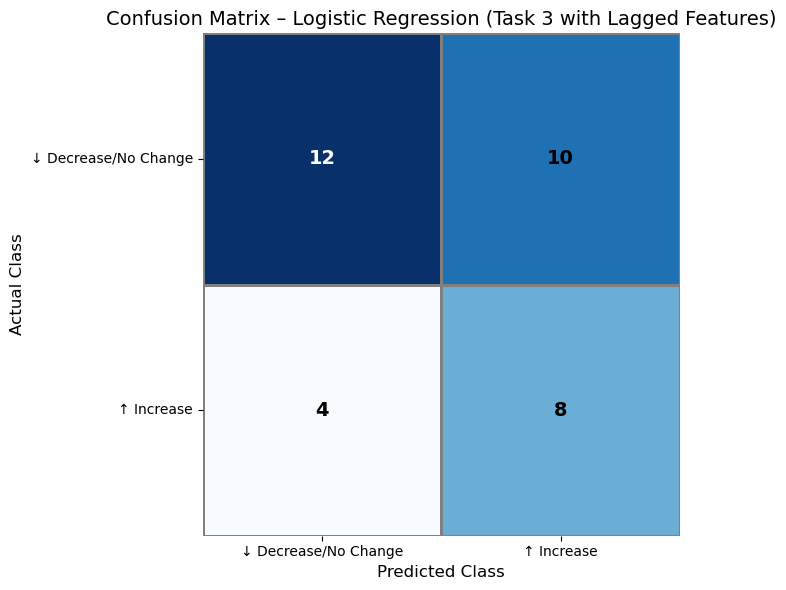

In [26]:
# Computing the confusion matrix
conf_matrix_logreg = confusion_matrix(y_val_task3_lagged_class, y_pred_logreg_lagged, labels=[0, 1])

# Label mapping
labels = ["↓ Decrease/No Change", "↑ Increase"]

# Creating the heatmap
plt.figure(figsize=(7, 6))
ax = sns.heatmap(
    conf_matrix_logreg,
    annot=False,
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
    cbar=False,
    linewidths=1,
    linecolor="gray"
)

# Setting the color for the values
for i in range(conf_matrix_logreg.shape[0]):
    for j in range(conf_matrix_logreg.shape[1]):
        value = conf_matrix_logreg[i, j]
        text_color = "white" if value > 10 else "black"
        ax.text(j + 0.5, i + 0.5, str(value),
                ha="center", va="center",
                color=text_color, fontsize=14, fontweight="bold")

# Labels and title
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("Actual Class", fontsize=12)
plt.title("Confusion Matrix – Logistic Regression (Task 3 with Lagged Features)", fontsize=14)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Notes: 
Logistic Regression Evaluation – Task 3 (Binary Classification)
- Accuracy: 59% of all test cases were correctly classified.
- Precision: 44% of predicted increases were actually increases. This means the model has a moderate false positive rate.
- Recall: 67% of actual increases in homelessness were correctly identified. This is relatively strong and aligns with goal to catch increases.
- F1 Score: 53%, showing a balance that leans more toward recall than precision.

Confusion Matrix Interpretation
- 12 counties correctly predicted as having no increase in homelessness.
- 10 counties that actually decreased were misclassified as increases.
- 8 counties correctly identified as having increased homelessness.
- 4 counties that increased were misclassified as decreases.

This model is more effective at catching increases in homelessness than avoiding false alarms.

<a id="section-5"></a>
## Section 5 - Appendix

In [22]:
# Adding constant and aligning target
X_train_ols_lagged = sm.add_constant(X_train_task3_lagged_class)
X_val_ols_lagged = sm.add_constant(X_val_task3_lagged_class)

y_train_ols_lagged = y_train_task3_lagged_class.loc[X_train_ols_lagged.index]
y_val_ols_lagged = y_val_task3_lagged_class.loc[X_val_ols_lagged.index]

# Fitting logistic regression model
model_ols_lagged_class = sm.Logit(y_train_ols_lagged, X_train_ols_lagged).fit(disp=False)

# Predicting probabilities and classify
y_pred_probs_ols_lagged = model_ols_lagged_class.predict(X_val_ols_lagged)
y_pred_class_ols_lagged = (y_pred_probs_ols_lagged >= 0.5).astype(int)

# Printing model summary
print(model_ols_lagged_class.summary())

# Feature importance
feature_importances_ols_lagged = pd.DataFrame({
    "Feature": X_train_ols_lagged.columns,
    "Coefficient": model_ols_lagged_class.params,
    "Abs_Coefficient": model_ols_lagged_class.params.abs()
}).sort_values(by="Abs_Coefficient", ascending=False)

# Displaying top features
print("\nFeature Importances (OLS Logistic Regression - Task 3 with Lagged Features):")
display(feature_importances_ols_lagged[["Feature", "Coefficient"]])

                           Logit Regression Results                           
Dep. Variable:           target_class   No. Observations:                  159
Model:                          Logit   Df Residuals:                      144
Method:                           MLE   Df Model:                           14
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                 0.08469
Time:                        18:16:33   Log-Likelihood:                -99.835
converged:                      False   LL-Null:                       -109.07
Covariance Type:            nonrobust   LLR p-value:                    0.1860
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -8.6355      5.476     -1.577      0.115     -19.368       2.097
to

d:\anaconda3\envs\class210\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Feature  \
Percentage_of_Households_with_Cost_Burden_5_yea...  Percentage_of_Households_with_Cost_Burden_5_ye...   
const                                                                                           const   
total_homeless_per_10k_lag1                                               total_homeless_per_10k_lag1   
total_sheltered_homeless_per_10k_lag1                           total_sheltered_homeless_per_10k_lag1   
unsheltered_homeless_per_10k_lag1                                   unsheltered_homeless_per_10k_lag1   
Share_of_Single_Person_Households_5_year_lag1           Share_of_Single_Person_Households_5_year_lag1   
Share_of_Renter_Occupied_Units_5_year_lag1                 Share_of_Renter_Occupied_Units_5_year_lag1   
Unemployment Rate_lag1                                                         Unemployment Rate_lag1   
Poverty Rate_lag1                                                                   Poverty Rate_lag1   
Rental_Vacancy_Rates_5_year_lag1                                     Rental_Vacancy_Rates_5_year_lag1   
Median_Rent_5_year_lag1                                                       Median_Rent_5_year_lag1   
Median_Gross_Rent_5_year_lag1                                           Median_Gross_Rent_5_year_lag1   
Median Household Income_lag1                                             Median Household Income_lag1   
Median_House_Values_5_year_lag1                                       Median_House_Values_5_year_lag1   
Labor Force_lag1                                                                     Labor Force_lag1   

                                                     Coefficient  
Percentage_of_Households_with_Cost_Burden_5_yea...  1.500500e+01  
const                                              -8.635498e+00  
total_homeless_per_10k_lag1                        -3.389694e+00  
total_sheltered_homeless_per_10k_lag1               3.362708e+00  
unsheltered_homeless_per_10k_lag1                   3.340588e+00  
Share_of_Single_Person_Households_5_year_lag1       2.007269e+00  
Share_of_Renter_Occupied_Units_5_year_lag1          1.816102e+00  
Unemployment Rate_lag1                              7.340683e-02  
Poverty Rate_lag1                                   2.272726e-02  
Rental_Vacancy_Rates_5_year_lag1                   -1.007360e-02  
Median_Rent_5_year_lag1                            -5.045556e-03  
Median_Gross_Rent_5_year_lag1                      -1.121108e-03  
Median Household Income_lag1                        7.086083e-05  
Median_House_Values_5_year_lag1                     7.084059e-06  
Labor Force_lag1                                    2.555998e-07

Note: I was unable to fix the convergence issue using statsmodels.Logit. 
- I attempted scaling and collinearity pruning and the convergence is still failing.
- statsmodels.Logit is sensitive to collinearity, scale and imbalance
- will now try sklearn Logisitic Regression